# Term Deposit Marketing - Project

# Background and Problem Statement

Acme, a small startup is focusing mainly on providing machine learning solutions in the European banking market. 
They work on a variety of problems including fraud detection, sentiment classification and customer intention prediction and classification.

They are interested in developing a robust machine learning system that leverages information coming from call center data.

Ultimately, they are looking to improve the success rate for calls made to customers for any product that their clients offer. 

To achieve this goal they are working on designing a machine learning product that offers high success outcomes while offering interpretability for their clients to make informed decisions.


# Project Objectives


The goal of the project is to predict if the customer will subscribe (yes/no) to a term deposit (variable y).

The success metrics that will be used for this project will be Accuracy. The objective will be to find a solution that gives an accuracy of 81% or above by evaluating with 5-fold cross validation and reporting the average performance score.

We are also interested in finding customers who are more likely to buy the investment product and determine the segment(s) of customers the client should prioritise.

We will use the insights and the results from the machine learning algorithms to determine what makes the customers buy term deposits and identify the feature that the company should be focusing more on.


# Libraries Imported

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
import scikitplot as skplt
from matplotlib.colors import ListedColormap 

from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import SVC

from sklearn.naive_bayes import GaussianNB
from sklearn.inspection import permutation_importance

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.model_selection import RepeatedStratifiedKFold



## The Data

The project was carried out using the data from the direct marketing efforts of a European banking institution. 
The marketing campaign involves making a phone call to a customer, often multiple times to ensure a product subscription, in this case a term deposit. Term deposits are usually short-term deposits with maturities ranging from one month to a few years. 

The customer must understand when buying a term deposit that they can withdraw their funds only after the term ends. All customer information that might reveal personal information is removed due to privacy concerns.

The data consists of 40,000 rows and 14 columns. One column is the target column that indiactes whether a customer has the client subscribed to a term deposit or not and the other 13 columns represents client data and infromation captured in the marketing campaigns. Refer to the data dictionary for more details on the information for each column.



In [2]:
# Load the data 
term_deposit = pd.read_csv(r'C:\Users\verph\OneDrive\Documents\AP - Projects\term-deposit-marketing-2020.csv')

In [3]:
term_deposit.shape

(40000, 14)

In [4]:
# View first 5 rows of the data - ie. the head of the data.
term_deposit.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign   y  
0  unknown    5   may       261         1  no  
1  unknown    5   may       151         1  no  
2  unknown    5   may        76         1  no  
3  unknown    5   may        92         1  no  
4  unknown    5   may       198         1  no

In [5]:
#Check for column data types
term_deposit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


In [6]:
# Check for missing values
term_deposit.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
y            0
dtype: int64

The results above shows that there are no missing values.

In [7]:
# Check the frequency distribution of the variables.
term_deposit.describe(include = 'all').T

count unique          top   freq     mean      std   min  25%  50%  \
age        40000    NaN          NaN    NaN  40.5446  9.64178    19   33   39   
job        40000     12  blue-collar   9383      NaN      NaN   NaN  NaN  NaN   
marital    40000      3      married  24386      NaN      NaN   NaN  NaN  NaN   
education  40000      4    secondary  20993      NaN      NaN   NaN  NaN  NaN   
default    40000      2           no  39191      NaN      NaN   NaN  NaN  NaN   
balance    40000    NaN          NaN    NaN  1274.28  2903.77 -8019   54  407   
housing    40000      2          yes  24031      NaN      NaN   NaN  NaN  NaN   
loan       40000      2           no  33070      NaN      NaN   NaN  NaN  NaN   
contact    40000      3     cellular  24914      NaN      NaN   NaN  NaN  NaN   
day        40000    NaN          NaN    NaN  16.0172  8.27813     1    8   17   
month      40000     11          may  13532      NaN      NaN   NaN  NaN  NaN   
duration   40000    NaN          NaN    NaN  254.824  259.366     0  100  175   
campaign   40000    NaN          NaN    NaN  2.88218  3.23905     1    1    2   
y          40000      2           no  37104      NaN      NaN   NaN  NaN  NaN   

            75%     max  
age          48      95  
job         NaN     NaN  
marital     NaN     NaN  
education   NaN     NaN  
default     NaN     NaN  
balance    1319  102127  
housing     NaN     NaN  
loan        NaN     NaN  
contact     NaN     NaN  
day          21      31  
month       NaN     NaN  
duration    313    4918  
campaign      3      63  
y           NaN     NaN

A review of the data set revealed that the data is quite clean. There are no missing values and the data consists of both categorical and continuous variables. The target variable y is a binary classification variable.


In [8]:
#Check unique values of age variable.
#Several ages, indicating that binning of the ages will be required to obtain meaningful visualisations.
term_deposit['age'].unique()

array([58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 57, 51, 45, 60, 56, 32,
       25, 40, 39, 52, 46, 36, 49, 59, 37, 50, 54, 55, 48, 24, 38, 31, 30,
       27, 34, 23, 26, 61, 22, 21, 20, 66, 62, 83, 75, 67, 70, 65, 68, 64,
       69, 72, 71, 19, 76, 85, 63, 90, 82, 73, 74, 78, 80, 94, 79, 77, 86,
       95, 81], dtype=int64)

In [9]:
#Check unique values of job variable.
#13 unique values, indicating that the visualisations should be meaningful using these values. No binning should be required.
term_deposit['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [10]:
#Check unique values of marital variable.
#Three unique values, visaulisations should be meaningful, no binning required.
term_deposit['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [11]:
#Check unique values of education variable.
#Four unique values, visaulisations should be meaningful, no binning required.
term_deposit['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [12]:
#Check unique values of balance variable.
#Several balances, indicating that binning of the balances will be required to obtain meaningful visualisations.
term_deposit['balance'].unique()

array([  2143,     29,      2, ...,   7222,   3402, 102127], dtype=int64)

In [13]:
#Check unique values of contact variable.
#Three unique values, visaulisations should be meaningful, no binning required.
term_deposit['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [14]:
#Check unique values of month variable.
#Eleven unique values, visaulisations should be meaningful, no binning required.
term_deposit['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr'], dtype=object)

In [15]:
#Check unique values of duration variable.
#Several durations, indicating that binning will be required to obtain meaningful visualisations.
term_deposit['duration'].unique()

array([ 261,  151,   76, ..., 1880, 1460, 2219], dtype=int64)

In [16]:
# As there are several ages to improve the visualisation, 
# age will be put into categories to improve the interpretation of the results

#Age ranges from 19 to 95. To have a more meaningful visualisation, this will be put into age categories / groups.
# Add a column - Age Group

term_deposit['ageGroup'] = pd.cut(x=term_deposit['age'], bins=[10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
                          labels=['10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-100'])
term_deposit.head()


age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign   y ageGroup  
0  unknown    5   may       261         1  no    50-59  
1  unknown    5   may       151         1  no    40-49  
2  unknown    5   may        76         1  no    30-39  
3  unknown    5   may        92         1  no    40-49  
4  unknown    5   may       198         1  no    30-39

In [17]:
# As there are several balances, to improve the visualisation, 
# balance will be put into categories to improve the interpretation of the results

# Balances ranges from -8019 to 102127. To have a more meaningful visualisation, this will be put into age categories / groups.
# Add a column - BalanceGroups

start = -10000
end = 105000
step = 5000

bins = list(range(start, end+1, step))
label = [f"{bins[i]}-{bins[i+1]-1}" for i in range(len(bins)-1)]

term_deposit['balanceGroup'] = pd.cut(x=term_deposit['balance'], bins=bins, labels=label)
term_deposit.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign   y ageGroup balanceGroup  
0  unknown    5   may       261         1  no    50-59       0-4999  
1  unknown    5   may       151         1  no    40-49       0-4999  
2  unknown    5   may        76         1  no    30-39       0-4999  
3  unknown    5   may        92         1  no    40-49       0-4999  
4  unknown    5   may       198         1  no    30-39       0-4999

In [18]:
# As there are several durations to improve the visualisation, 
# duration will be put into categories to improve the interpretation of the results

#Duration ranges from 0 to 4918. To have a more meaningful visualisation, this will be put into age categories / groups.
# Add a column - Duration Group

start = 0
end = 5000
step = 500

bins = list(range(start, end+1, step))
label = [f"{bins[i]}-{bins[i+1]-1}" for i in range(len(bins)-1)]


term_deposit['durationGroup'] = pd.cut(x=term_deposit['duration'], bins=bins, labels=label)
term_deposit.head()


age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign   y ageGroup balanceGroup  \
0  unknown    5   may       261         1  no    50-59       0-4999   
1  unknown    5   may       151         1  no    40-49       0-4999   
2  unknown    5   may        76         1  no    30-39       0-4999   
3  unknown    5   may        92         1  no    40-49       0-4999   
4  unknown    5   may       198         1  no    30-39       0-4999   

  durationGroup  
0         0-499  
1         0-499  
2         0-499  
3         0-499  
4         0-499

# Data Dictionary

Age - The age of the customer based on their date of birth. This ranges from 19 - 95 as shown in the frequency table (numeric).

Job - The job/profession of the customer. There are 12 different job categories with the most frequent one being 'blue-collar' (categorical).

Martial - The customers situation with regard to whether one is single, married or divorced (categorical).

Education - The highest education level achieved by the customer. This consists of four levels ie. teritary, secondary, primary or unknown (categorical).

Default - This indicates whether a customer has credit in default or not. 0 - No default, 1 - default (binary).

Balance - Average yearly balance of term deposit in euros (numeric).

Housing - This indicates whether a customer has a housing loan or not. 0 - No housing loan, 1 - housing loan (binary).

Loan - This indicates whether a customer has a personal loan or not. 0 - No personal loan, 1 - personal loan (binary).

Contact - This indicates the customers contact communication type. This consists of 3 categories unknown, cellular and telephone (categorical).

Day - The last contact day of the month (numeric).

Month - The last contact month of the year (categorical).

Duration - The duration of the last contact in seconds (numeric).

Campaign - The number of contacts performed during this campaign and for this client (numeric, includes last contact).

y - This indicates whether a customer subscribed to a term deposit or not. 0 - No term deposit, 1 - term deposit (binary).
For this problem set y is the target variable.




In [19]:
#Convert y to binary variables
term_deposit['y'] = term_deposit['y'].replace('yes', 1)
term_deposit['y'] = term_deposit['y'].replace('no', 0)


In [20]:
#Baseline : 0 - No term deposit, 1- term deposit
term_deposit.y.value_counts(normalize=True)

0    0.9276
1    0.0724
Name: y, dtype: float64

The dataset is an imbalanced dataset with only 7.24% of the customers opting for a term deposit. This will need to be considered in the modelling process.


# Visualizing the Data

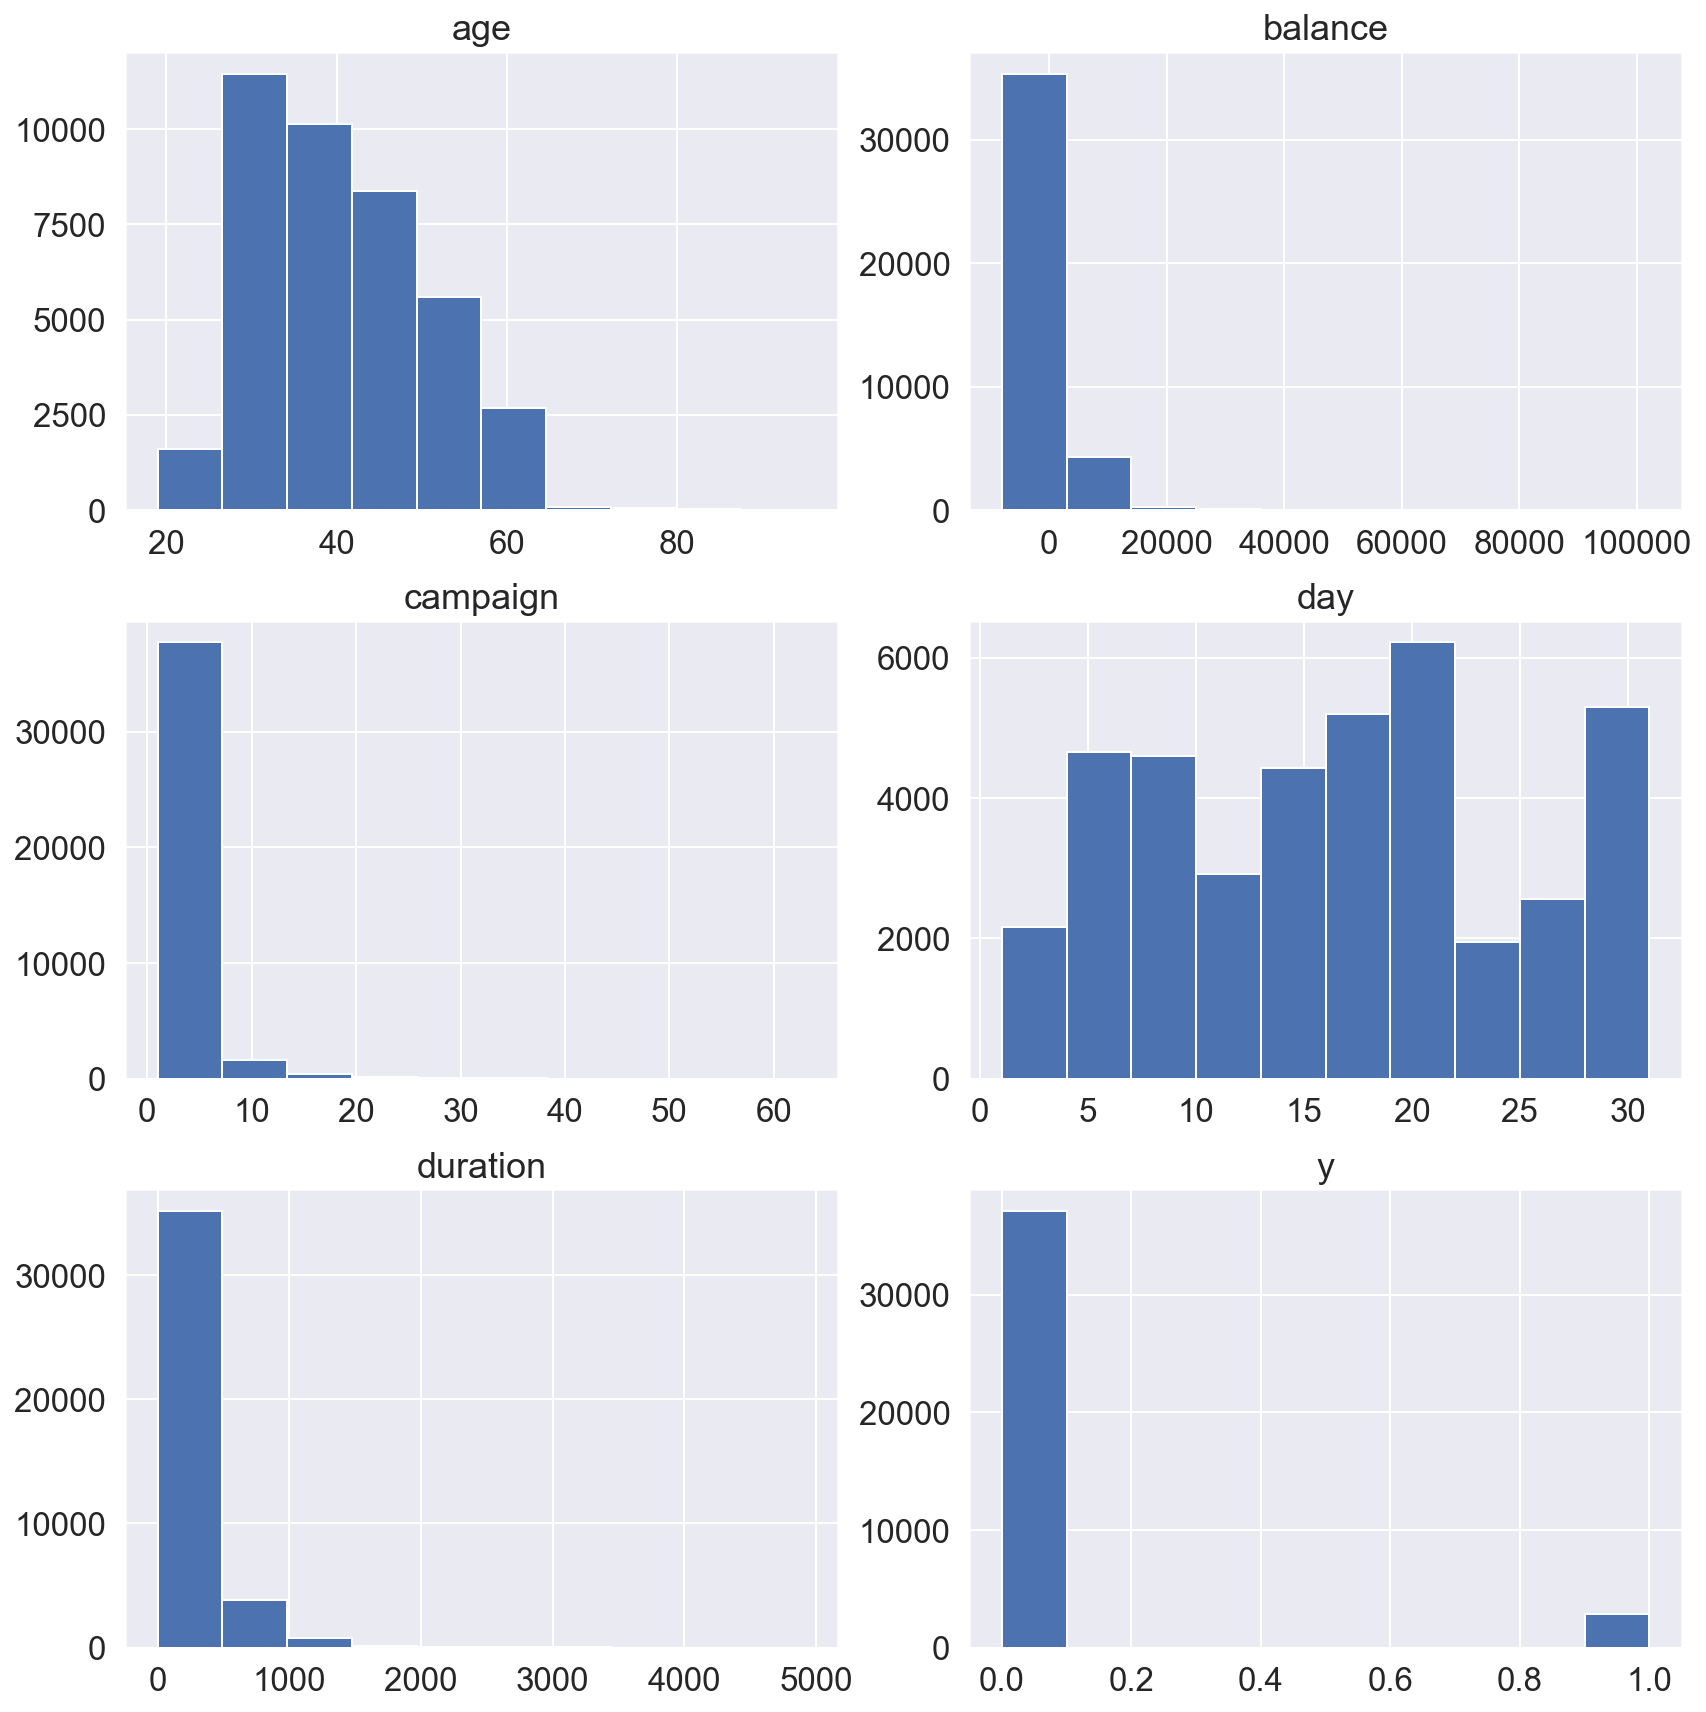

In [21]:
# Visualising the continuous or numeric variables
term_deposit.hist(figsize= (12,12))
plt.tight_layout()
plt.show()

In [22]:
term_deposit.describe().T

count         mean          std     min    25%    50%     75%  \
age       40000.0    40.544600     9.641776    19.0   33.0   39.0    48.0   
balance   40000.0  1274.277550  2903.769716 -8019.0   54.0  407.0  1319.0   
day       40000.0    16.017225     8.278127     1.0    8.0   17.0    21.0   
duration  40000.0   254.824300   259.366498     0.0  100.0  175.0   313.0   
campaign  40000.0     2.882175     3.239051     1.0    1.0    2.0     3.0   
y         40000.0     0.072400     0.259152     0.0    0.0    0.0     0.0   

               max  
age           95.0  
balance   102127.0  
day           31.0  
duration    4918.0  
campaign      63.0  
y              1.0

Class 0: 37104
Class 1: 2896
Proportion: 12.81 : 1


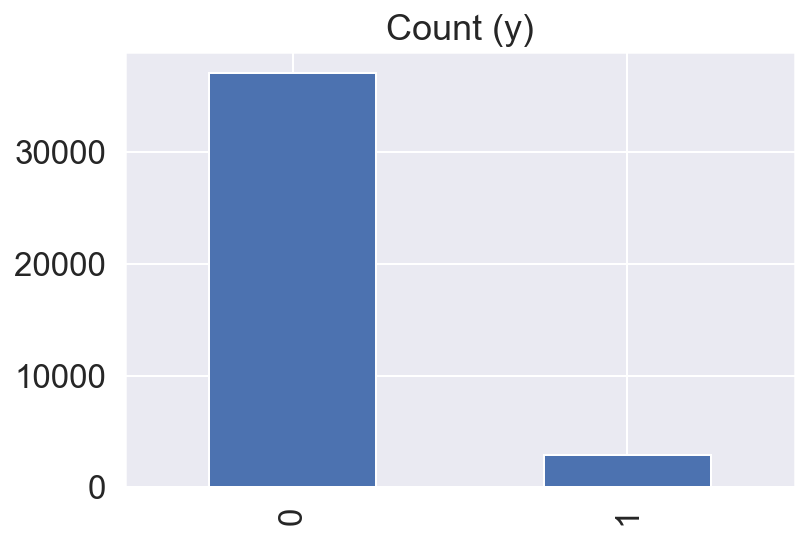

In [23]:
summary = term_deposit.y.value_counts()
print('Class 0:', summary[0])
print('Class 1:', summary[1])
print('Proportion:', round(summary[0] / summary[1], 2), ': 1')

summary.plot(kind='bar', title='Count (y)');

In [24]:
deposit = term_deposit.loc[term_deposit['balance'] < 0]

In [25]:
deposit.describe().T

count        mean         std     min    25%    50%    75%     max
age       3731.0   39.528545    9.057897    20.0   32.0   38.0   46.0    63.0
balance   3731.0 -319.280890  369.754826 -8019.0 -423.0 -231.0  -94.0    -1.0
day       3731.0   16.474404    8.576549     1.0    9.0   16.0   24.0    31.0
duration  3731.0  252.705441  250.868287     4.0  105.0  176.0  305.0  3253.0
campaign  3731.0    2.937818    3.487072     1.0    1.0    2.0    3.0    43.0
y         3731.0    0.052801    0.223666     0.0    0.0    0.0    0.0     1.0

Class 0: 3534
Class 1: 197
Proportion: 17.94 : 1


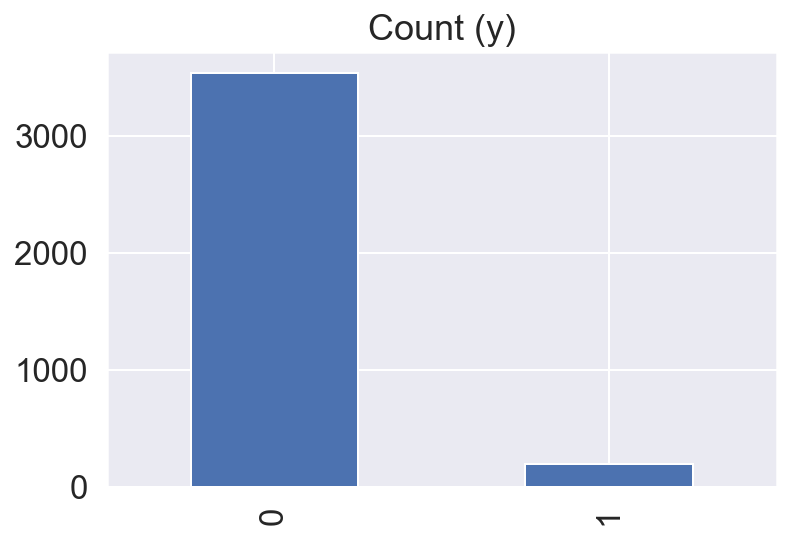

In [26]:
target = deposit.y.value_counts()
print('Class 0:', target[0])
print('Class 1:', target[1])
print('Proportion:', round(target[0] / target[1], 2), ': 1')

target.plot(kind='bar', title='Count (y)');

# Histograms - Discussions of visualizations


From the visualisations above, we can see that- 

Age  - This is slightly positively skewed as the mean 40 and median 39 with the ages range from 19 to 95. 

Deposit balance is postitively skewed with a mean of 1274 and a median of 407. Deposit balances range from -8019 to 102127. The negative deposit balances are unusual and need to be invetgated further it is unlikely that the finacial institution would over pay on the deposits held. This could potentially indicate that interest was not properly accounted for. 
From the analysis done above, we see that the total number of data in the imbalanced class is 2896 with 197 showing negative balances. As this valve is low we will delete all balances with negative values which will reduce the data set to (40000-3731) 36,269 rows. This is done below.

Campaign - This is positively skewed with mean of 2.88 and median of 2.The number of contacts to generate the deposit responserange from 1 to 63 contacts. This appears reasonable.

Day - This is slightly negatively skewed with mean of 16 and median of 17.The contact day to generate the deposit response range from 1 to 31 in keeping with the calendar days for each month. This appears reasonable.


Duration - This is right skewed with mean of 254 and median of 175. The duration of the last contact in seconds range from 0 to 4918. This appears reasonable.

y - This is the response variable which is binary is nature and has only two responses 1 and 0. The graph shows that the majority of the dataset has response 0 and the minority 1. 



The code below was used to remove the negative values from 'balances', in keeping with the details obtained and determined in the section above on deposit balances.

In [27]:
#Remove negative values in 'balances'. 3731 rows as shown above.
term_deposit = term_deposit[term_deposit['balance'] >= 0]

In [28]:
term_deposit.describe().T

count         mean          std   min    25%    50%     75%  \
age       36269.0    40.649122     9.693924  19.0   33.0   39.0    48.0   
balance   36269.0  1438.207257  2999.519682   0.0  134.0  507.0  1480.0   
day       36269.0    15.970195     8.245500   1.0    8.0   17.0    21.0   
duration  36269.0   255.042268   260.227347   0.0   99.0  175.0   314.0   
campaign  36269.0     2.876451     3.212448   1.0    1.0    2.0     3.0   
y         36269.0     0.074416     0.262451   0.0    0.0    0.0     0.0   

               max  
age           95.0  
balance   102127.0  
day           31.0  
duration    4918.0  
campaign      63.0  
y              1.0

# Boxplots of Independent variables

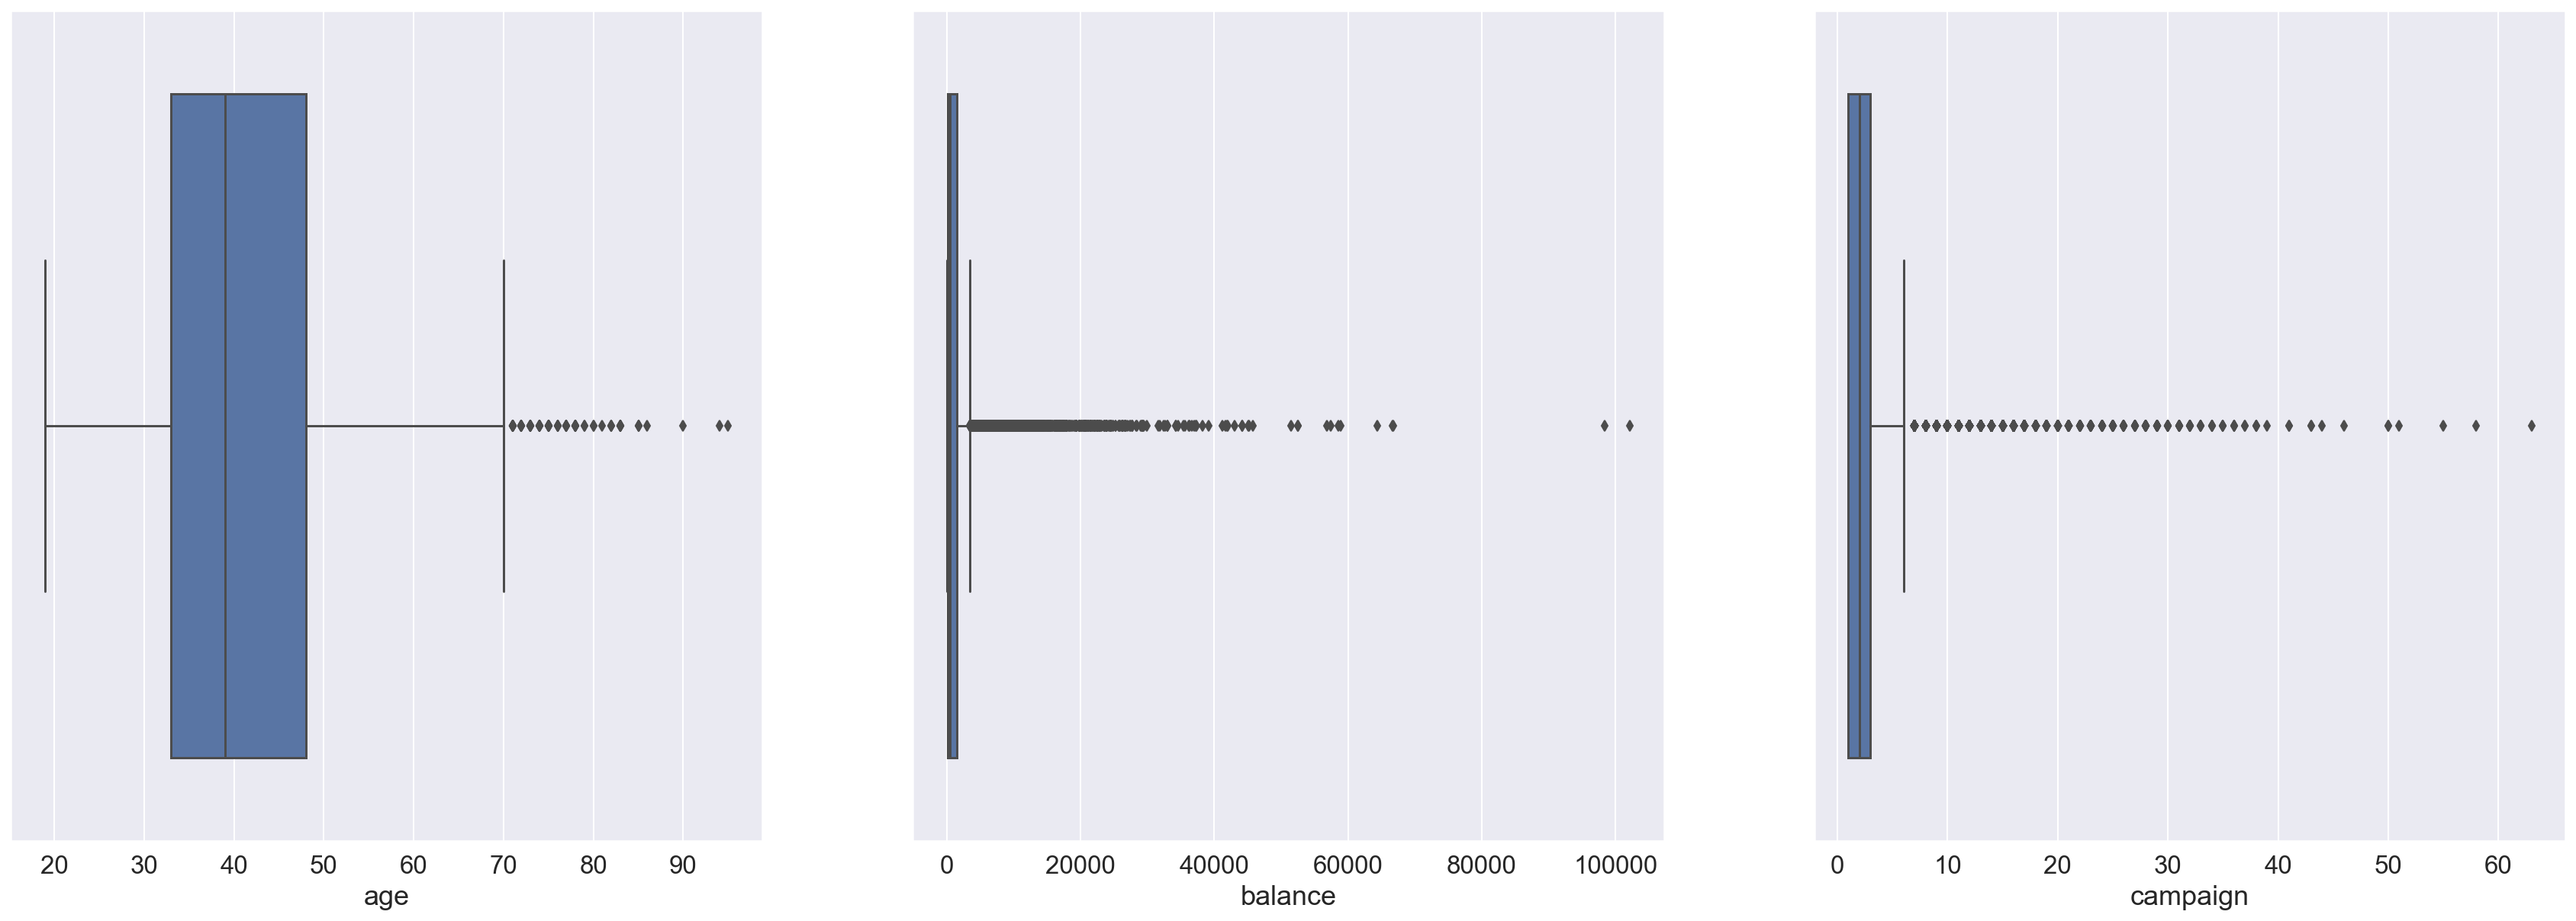

In [29]:
fig, ax = plt.subplots(ncols=3, figsize=(30, 10))

sns.boxplot(x = 'age', data = term_deposit, ax=ax[0])

sns.boxplot(x = 'balance', data = term_deposit, ax=ax[1])

sns.boxplot(x = 'campaign', data = term_deposit, ax=ax[2])

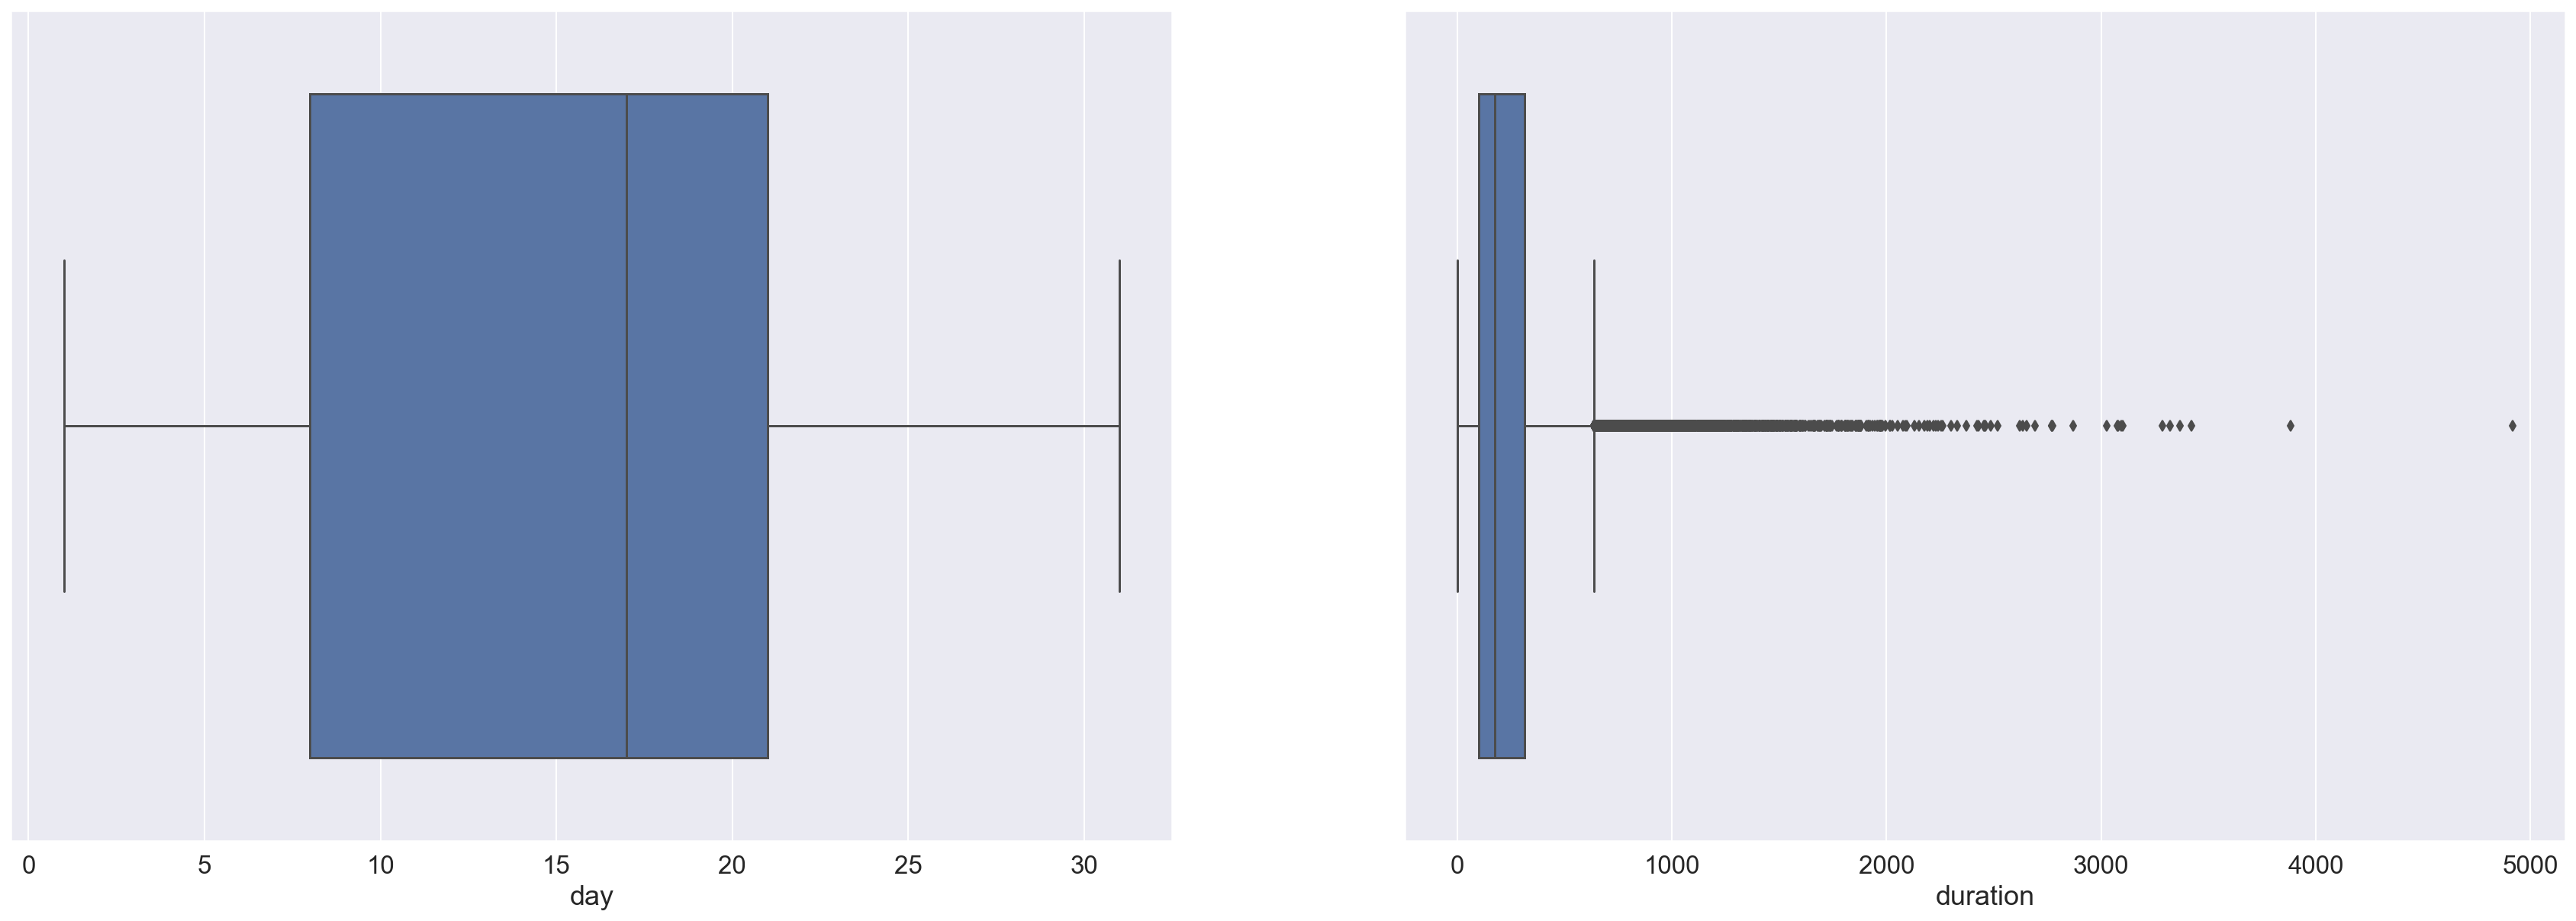

In [30]:
fig, ax = plt.subplots(ncols=2, figsize=(30, 10))

sns.boxplot(x = 'day', data = term_deposit, ax=ax[0])

sns.boxplot(x = 'duration', data = term_deposit, ax=ax[1])

# Box Plots - Discussion of visualizations

The box plots shows that:

The variables age, balance, campaign and duration all have outliers that fall above the value  Q3 + 1.5 * IQR where Q3 is the third quartile / 75th percentile and IQR is the interquartile range (25th to 75th percentile).

No treatment for outliers will be carried out in this solution.



# Heat Map showing correlation of Variables

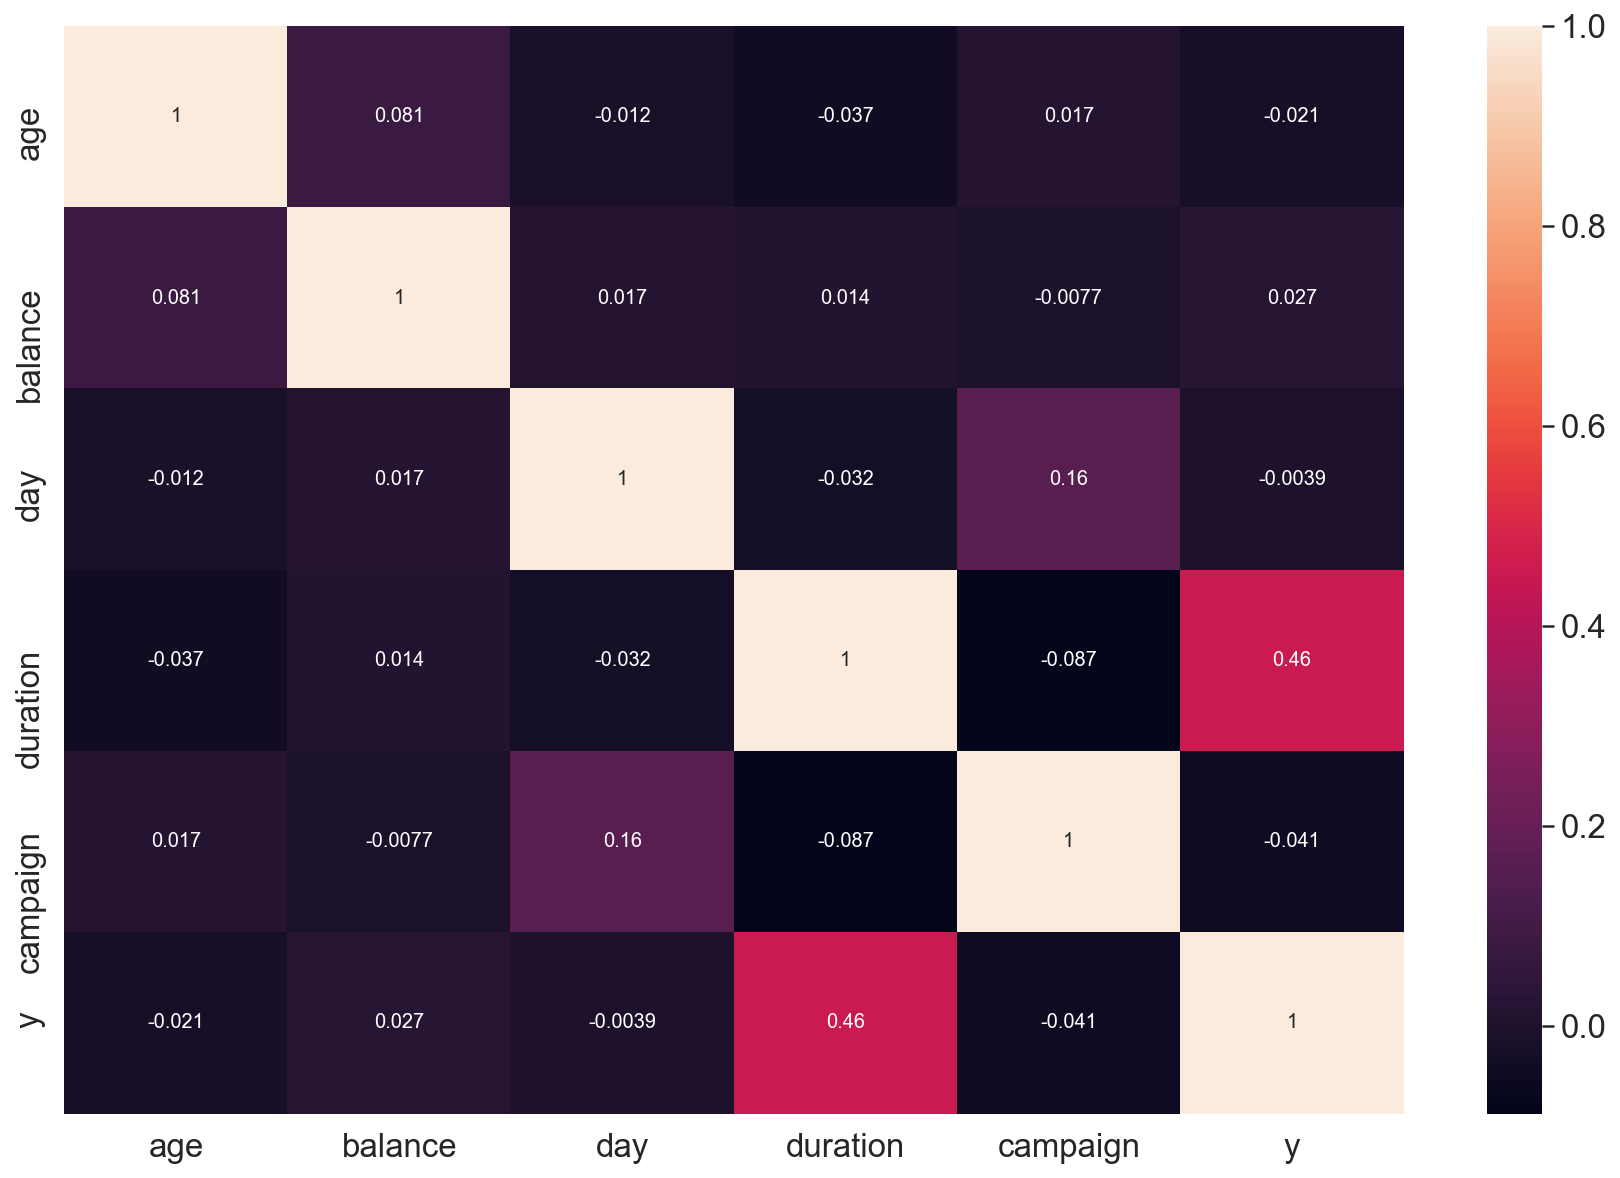

In [31]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(term_deposit.corr(), annot =True, ax=ax)
ax.set_ylim([term_deposit.corr().shape[1],0])
plt.show()

# HeatMap - Discussion of visualizations

The heat map above shows us the degree of correlation between the variables. Correlation ranges from -1 to +1. Values closer to zero means there is no linear trend between the two variables. The closer to 1 the correlation is, the more positively correlated the variables are; that is, as one increases so does the other. The closer the correlation is to 1 the stronger the relationship between the variables. Correlations closer to -1 also shows strong relationships between variables, but a negative one. In this case as one variable increases the other decreases.

The heat map above shows that:

The strongest correlations are between the target variable y and the predictor varaibles duration and campaign.  


The predictor varible duration shows the highest correlation of 0.46 and the variable campaign a correlation of 0.16.

The correlations less than 0.35 are considered to represenst low or weak correlations and the correlations 0.36 to 0.67 are moderate correlations. In the above, we can only see instances of low and moderate correlations between variables in the dataset.



# Pairplot of Variables

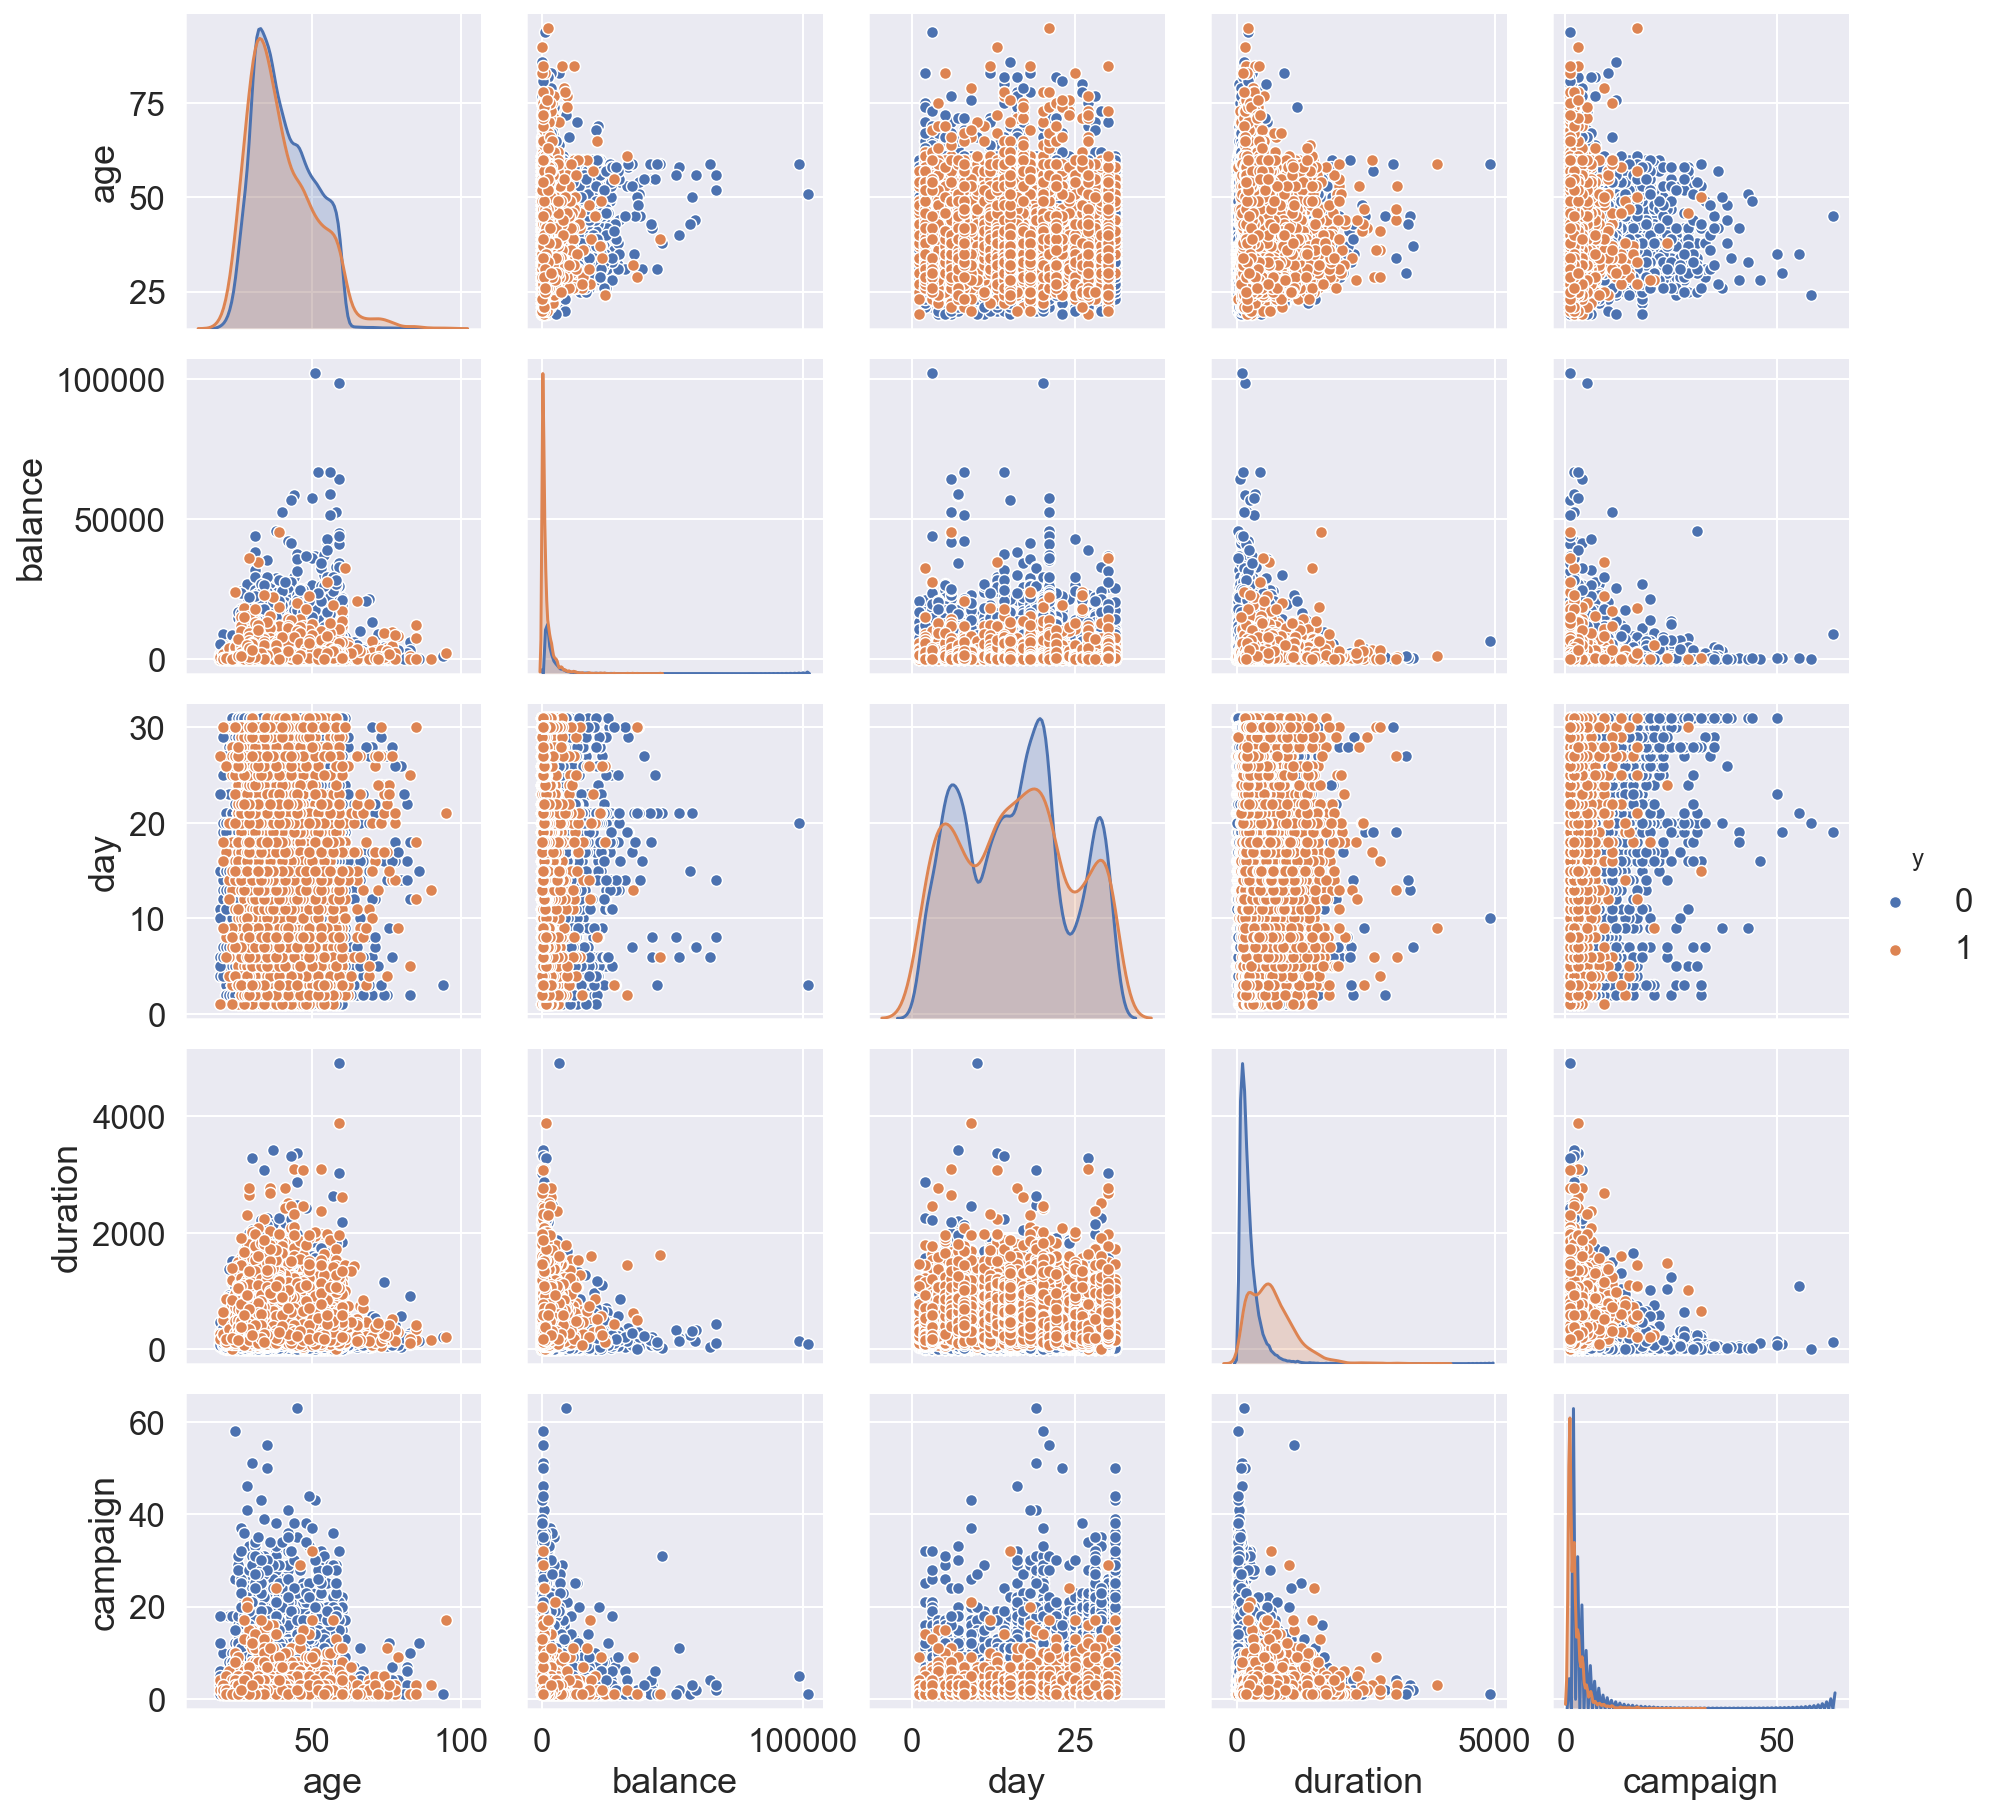

In [32]:
sns.pairplot(term_deposit, hue='y')
plt.show()

# PairPlots - Discussions of Visualizations

The pair plots shows both the histograms of the variables and the scatterplots. The histograms are already discussed above. The scatterplots does not show any clear patterns or trends in the dispersion of the data.







# Count Plots of dependent vs independent variables

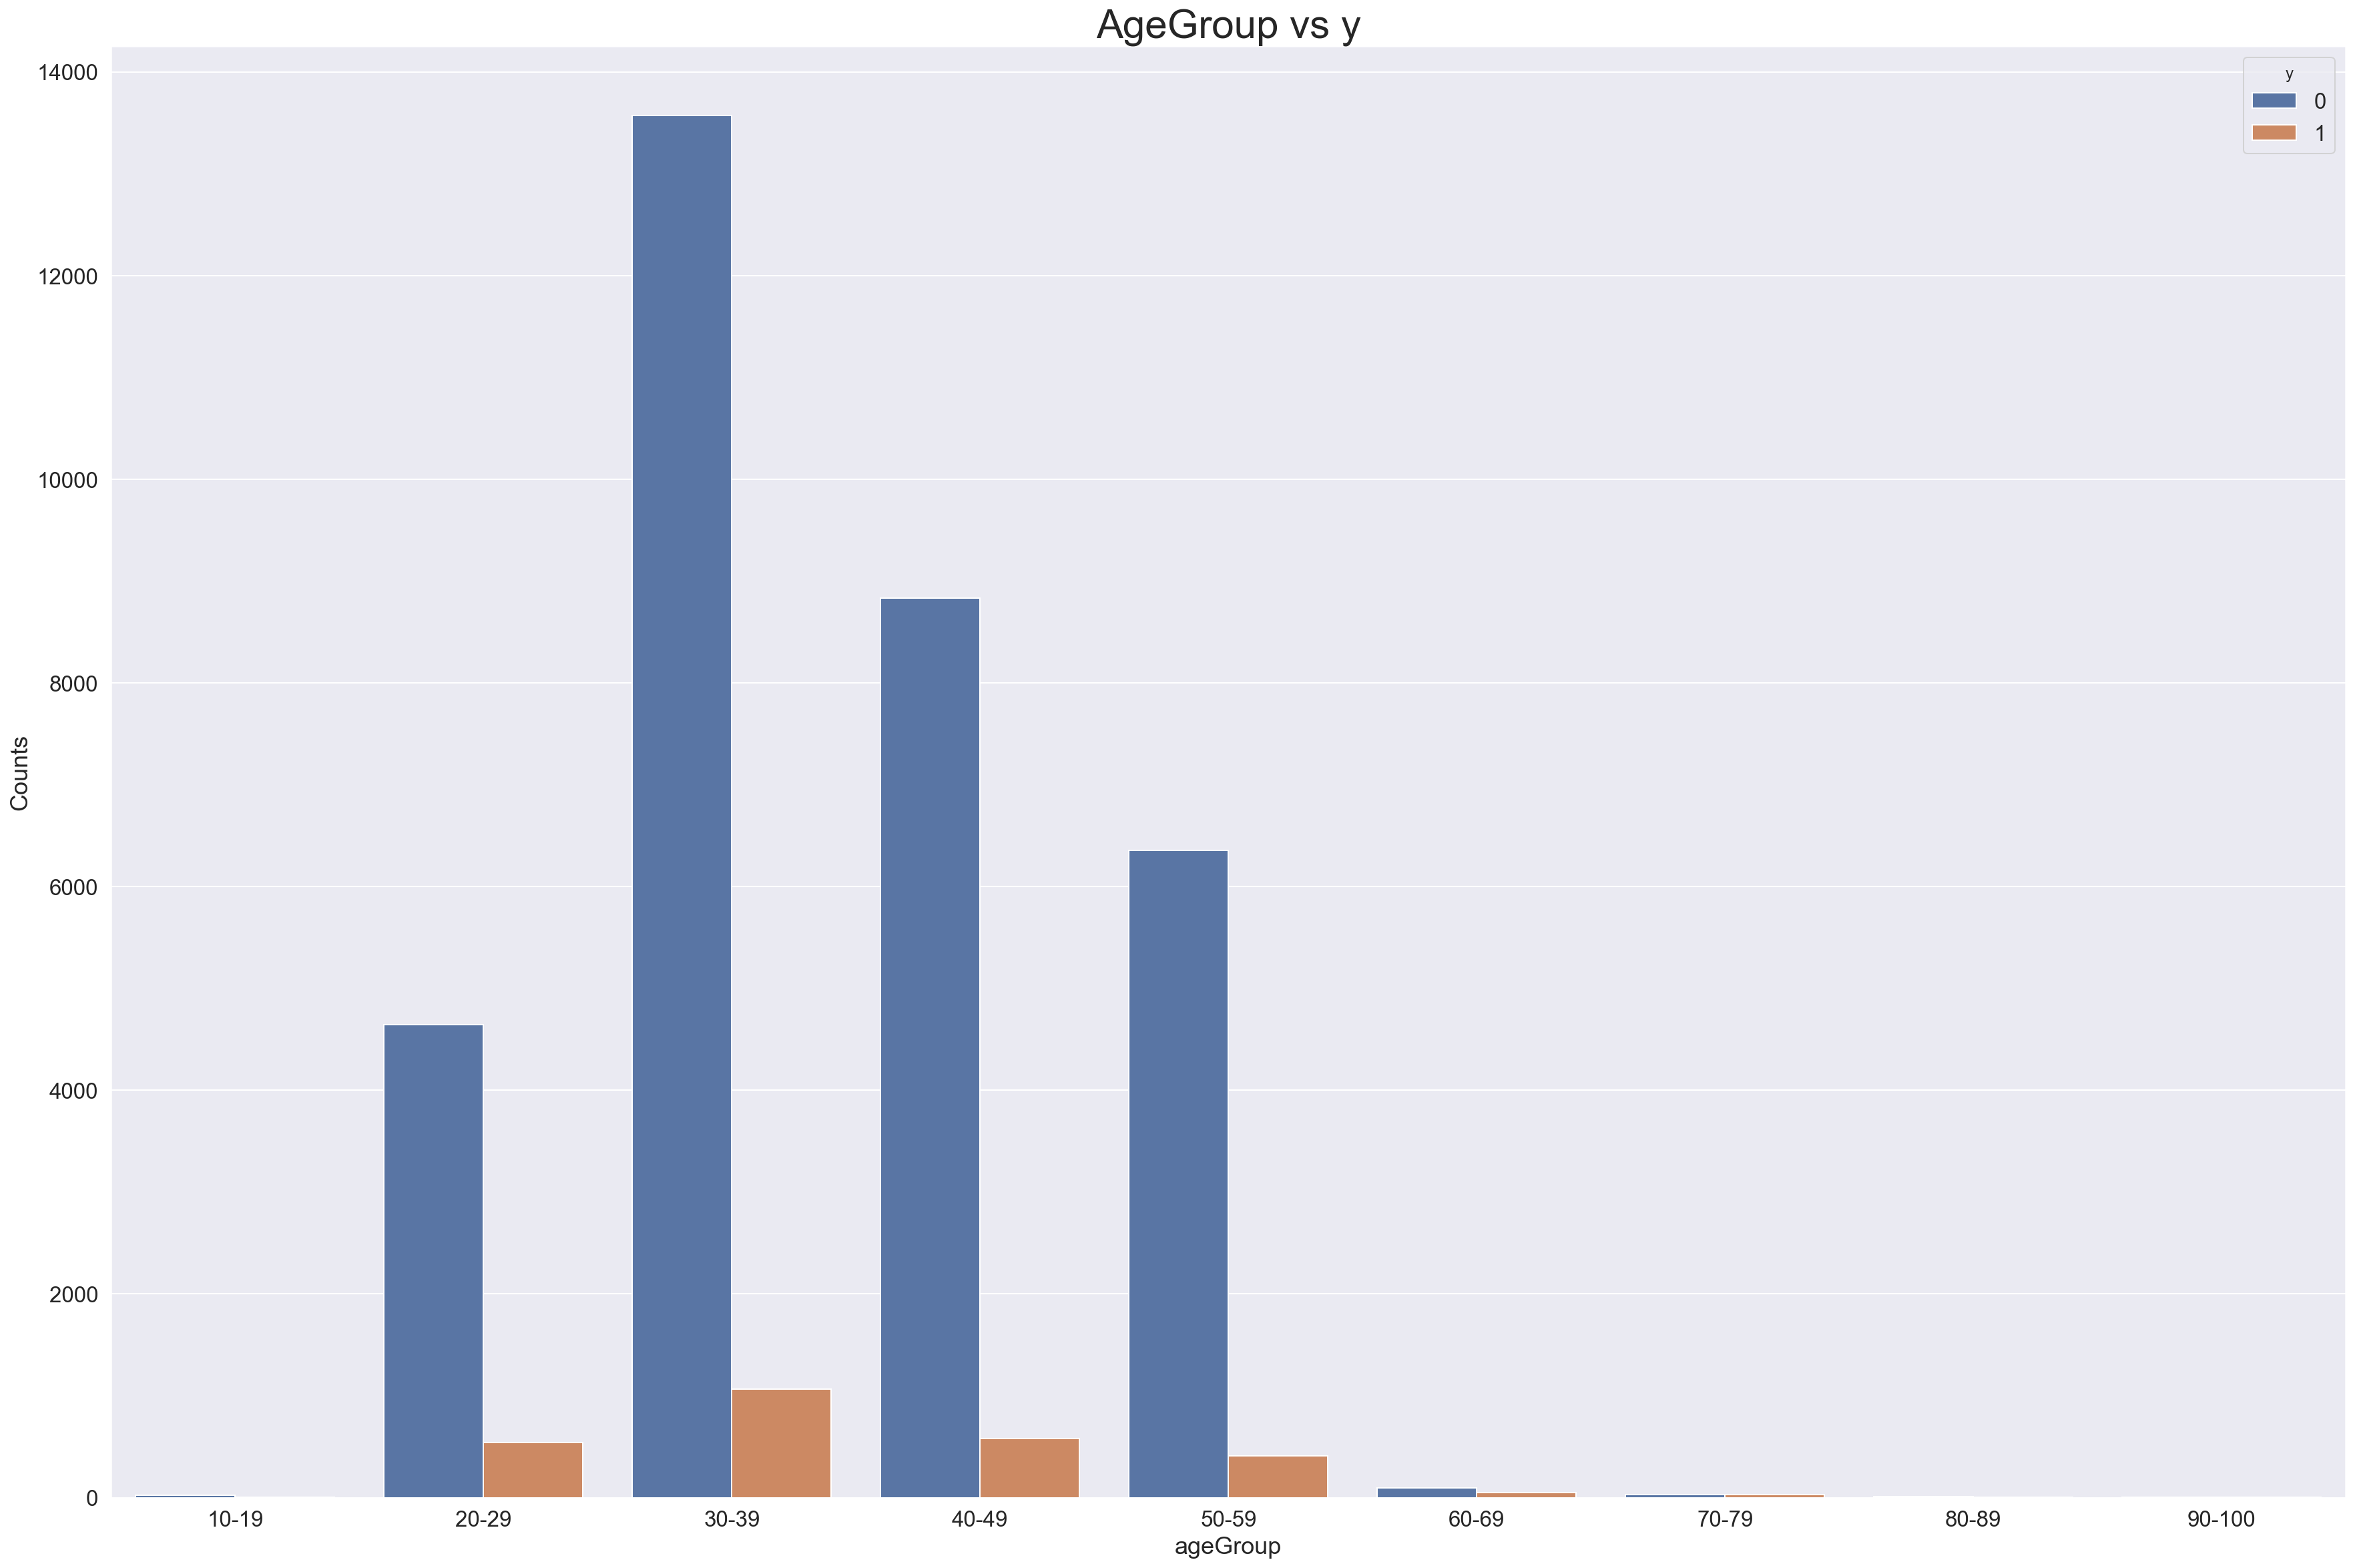

In [33]:
#Create plots for other variables vs term deposit variable - Job.
fig, ax = plt.subplots(ncols=1, figsize=(30, 20))

sns.countplot(x = 'ageGroup', hue ='y', data = term_deposit, ax=ax)
ax.set_xlabel('ageGroup')
ax.set_ylabel('Counts')
ax.set_title('AgeGroup vs y',fontsize =30)


plt.show()

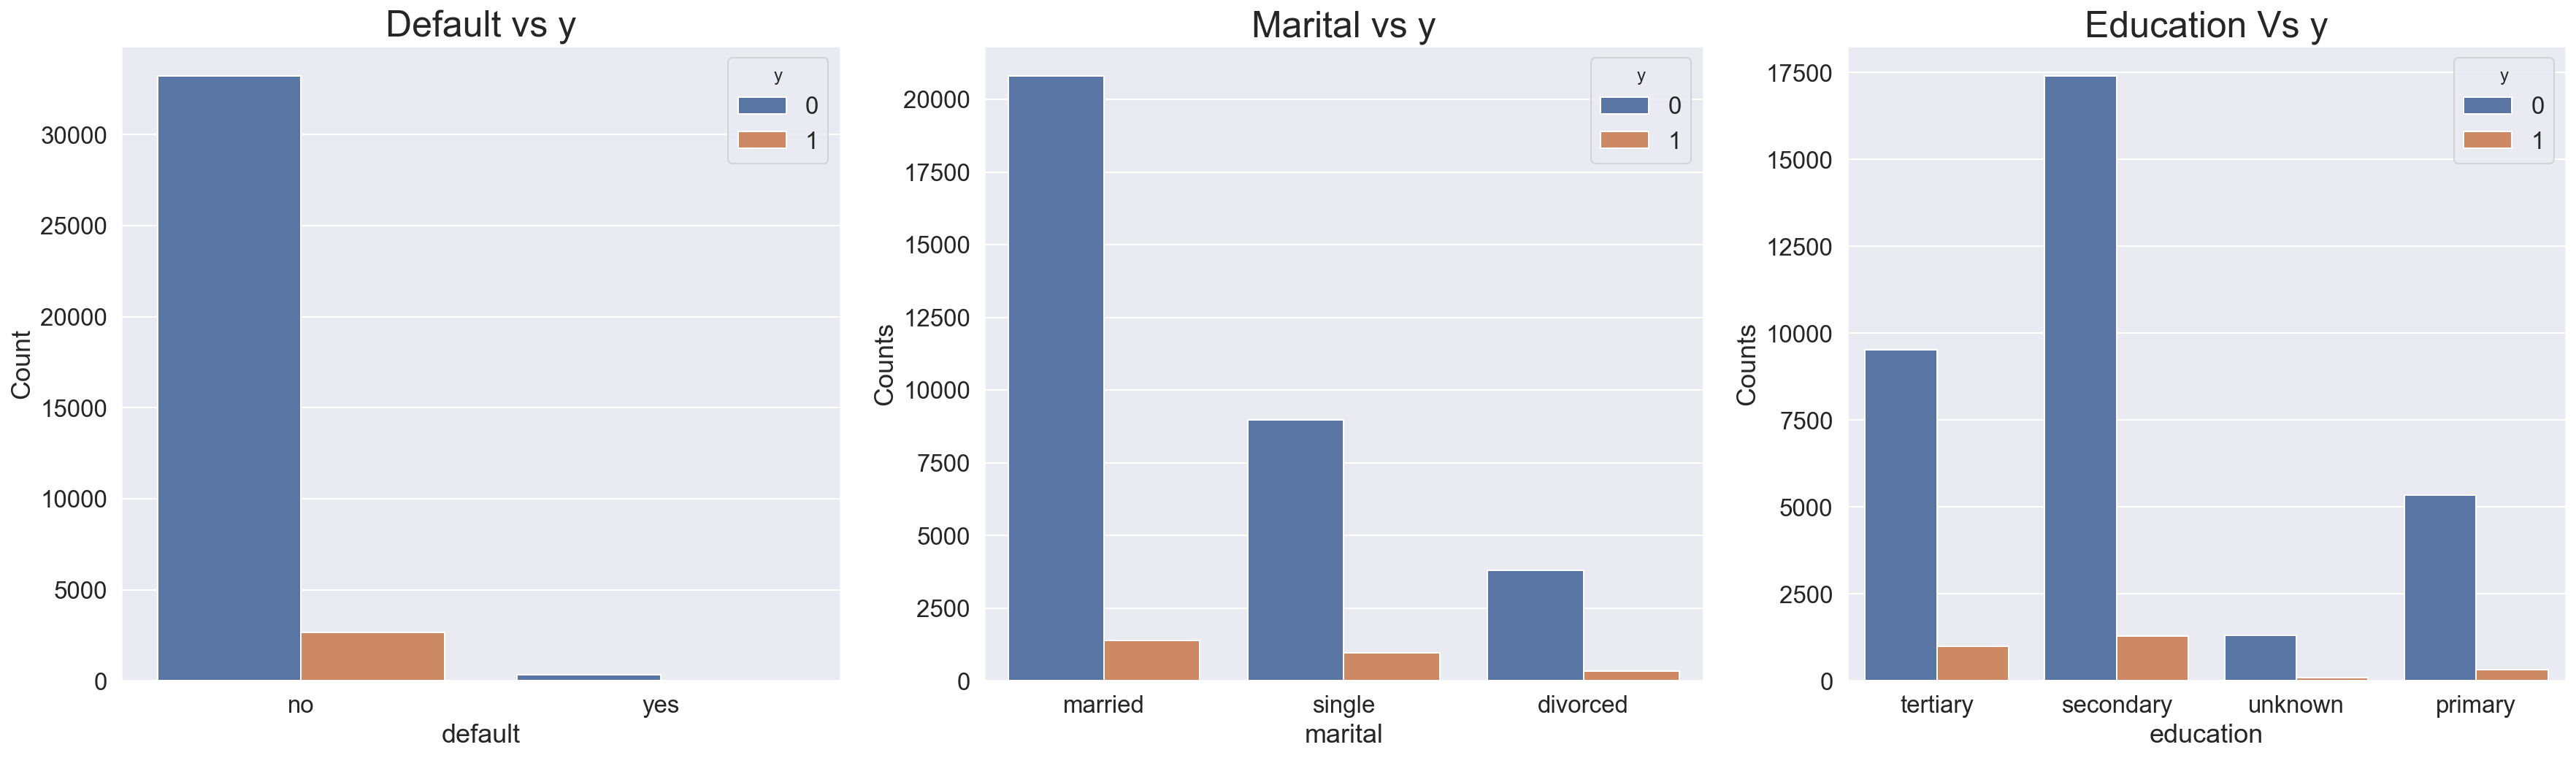

In [34]:
#Create plots for other variables vs term deposit variables.

fig, ax = plt.subplots(ncols=3, figsize=(30, 8))

sns.countplot(x = 'default', hue ='y', data = term_deposit, ax=ax[0])
ax[0].set_xlabel('default')
ax[0].set_ylabel('Count')
ax[0].set_title('Default vs y',fontsize =25)

sns.countplot(x = 'marital', hue ='y', data = term_deposit, ax=ax[1])
ax[1].set_xlabel('marital')
ax[1].set_ylabel('Counts')
ax[1].set_title('Marital vs y',fontsize =25)

sns.countplot(x = 'education', hue ='y', data = term_deposit, ax=ax[2])
ax[2].set_xlabel('education')
ax[2].set_ylabel('Counts')
ax[2].set_title('Education Vs y',fontsize =25)


plt.show()

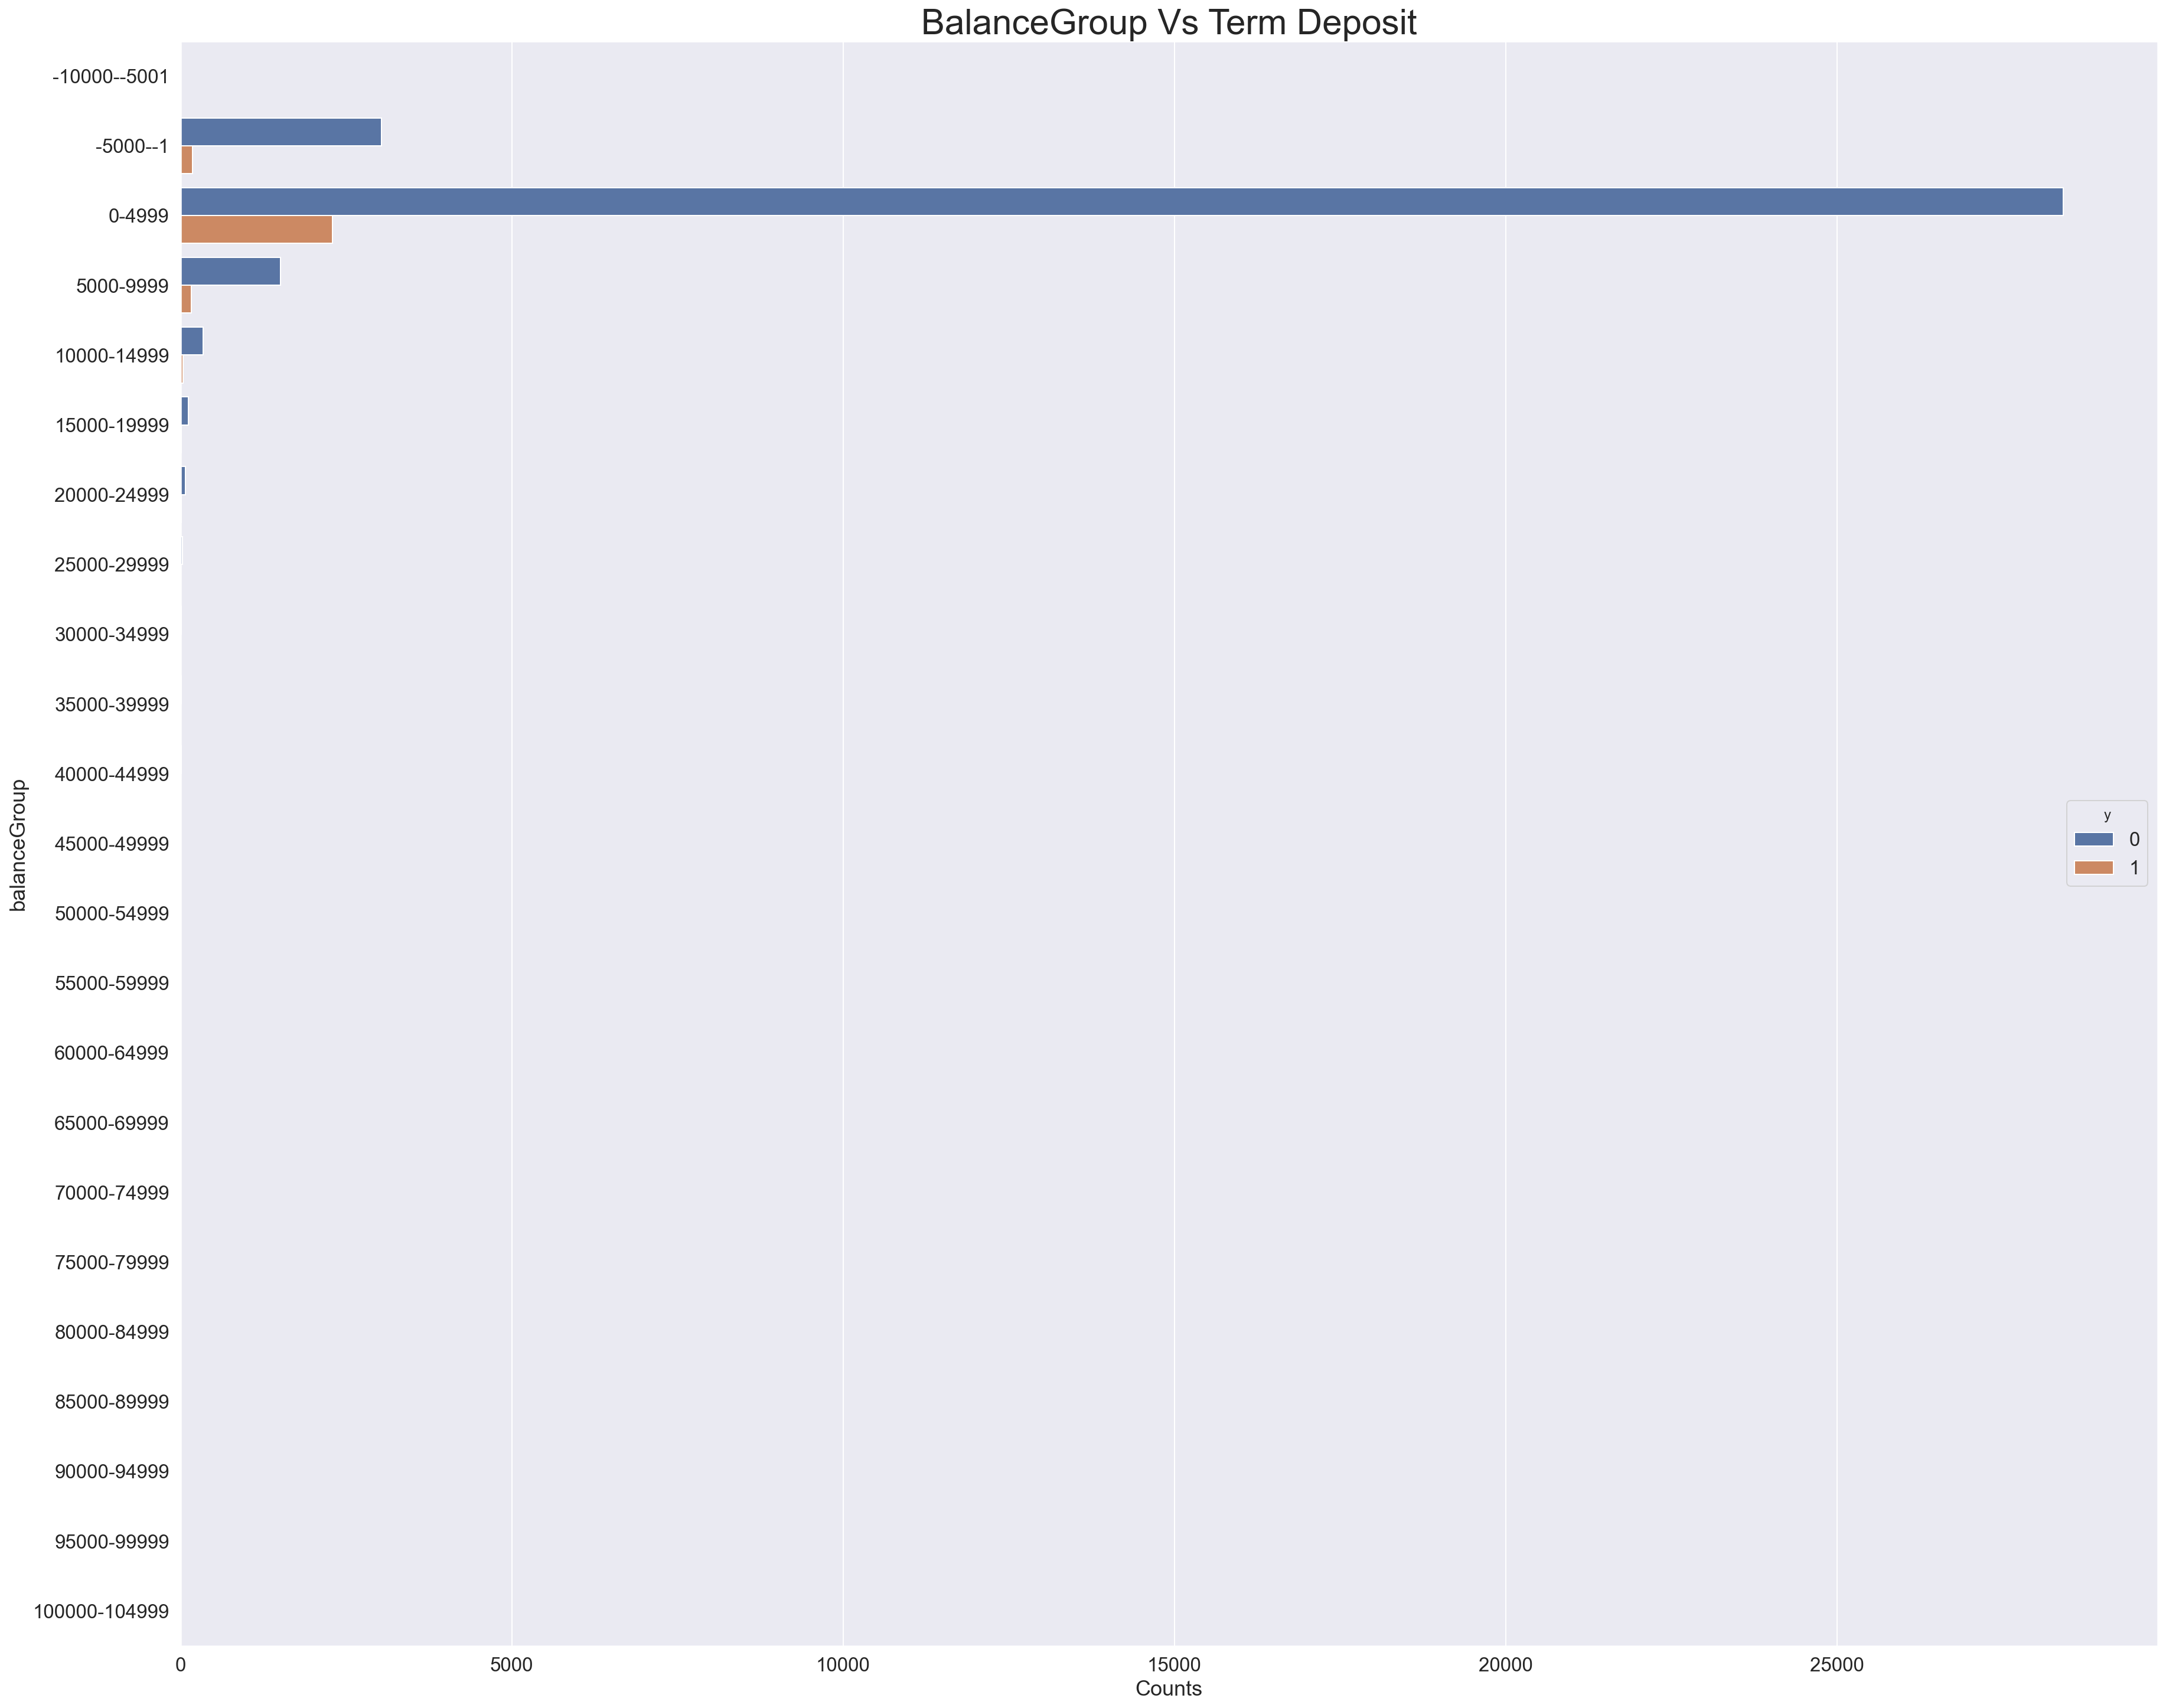

In [35]:
#Create plots for other variables vs term deposit variable - Job.
fig, ax = plt.subplots(ncols=1, figsize=(30, 25))

sns.countplot(y = 'balanceGroup', hue ='y', data = term_deposit, ax=ax)
ax.set_xlabel('Counts')
ax.set_ylabel('balanceGroup')
ax.set_title('BalanceGroup Vs Term Deposit',fontsize =30)


plt.show()

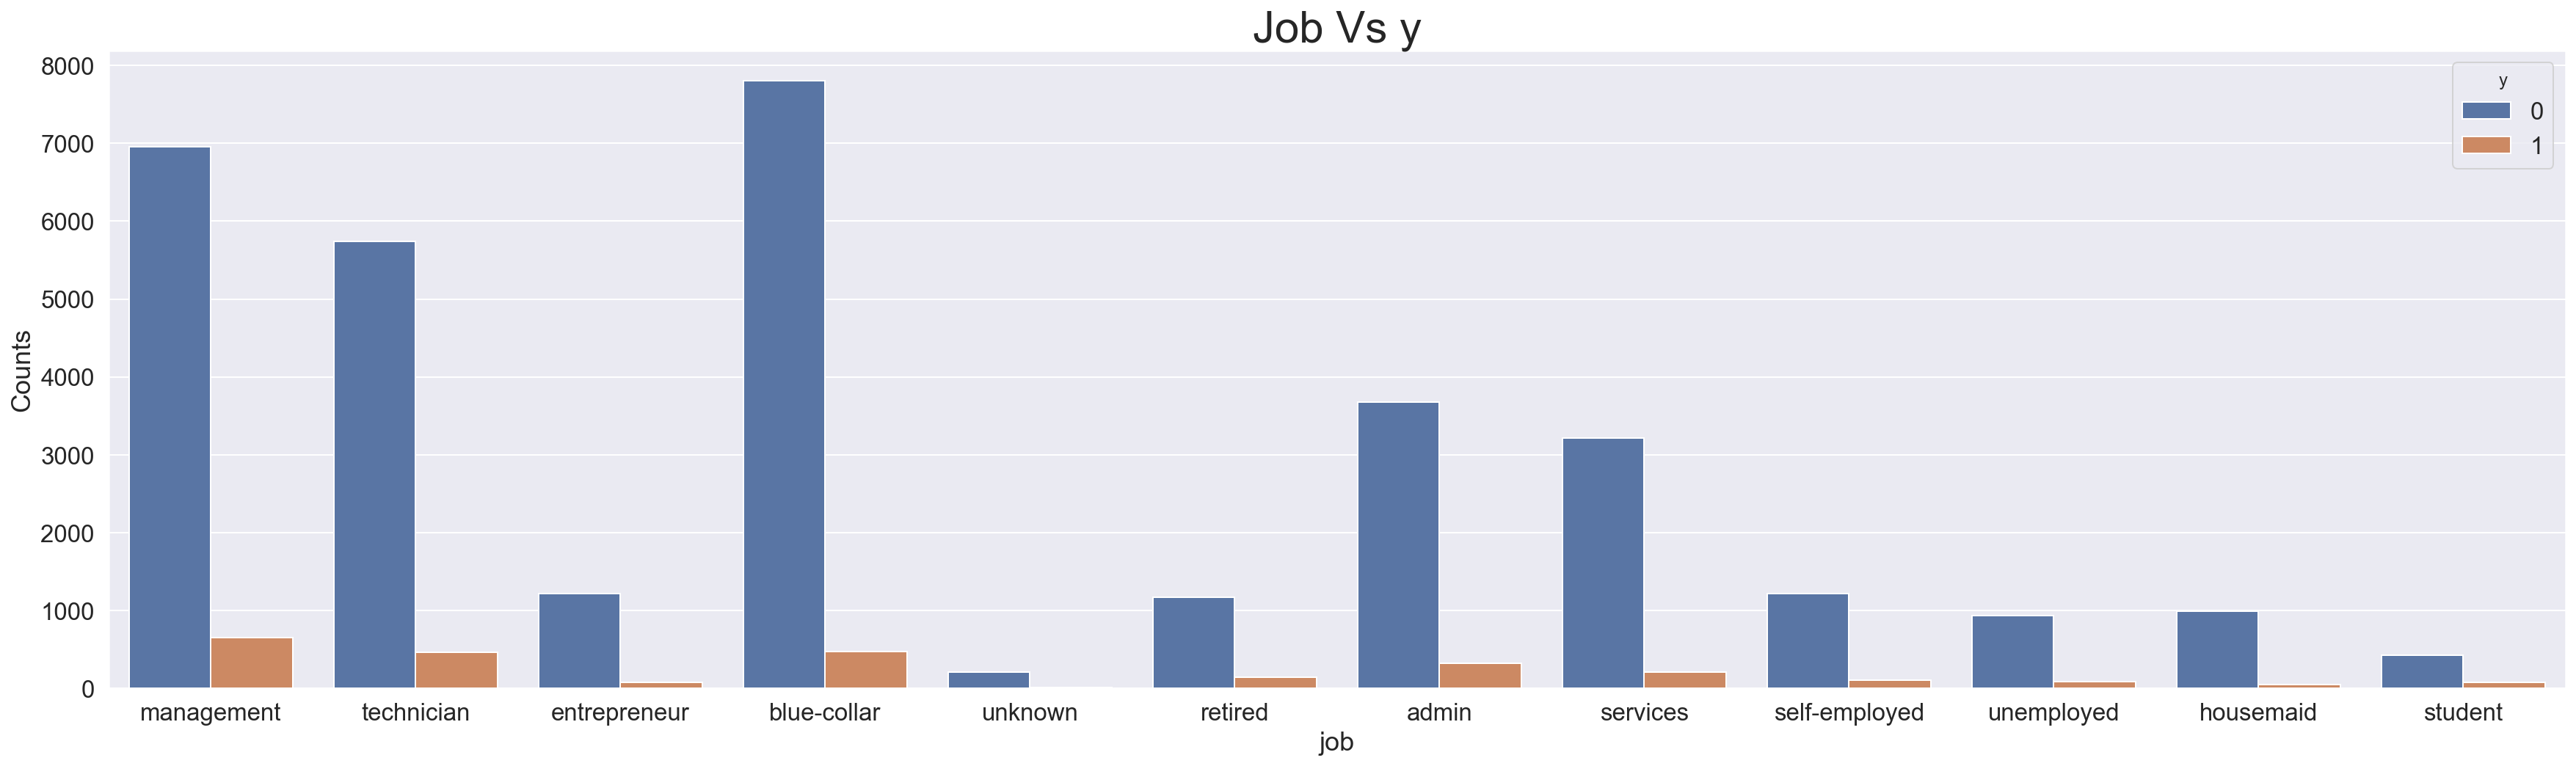

In [36]:
#Create plots for other variables vs term deposit variable - Job.

fig, ax = plt.subplots(ncols=1, figsize=(30, 8))

sns.countplot(x = 'job', hue ='y', data = term_deposit, ax=ax)
ax.set_xlabel('job')
ax.set_ylabel('Counts')
ax.set_title('Job Vs y',fontsize =30)


plt.show()

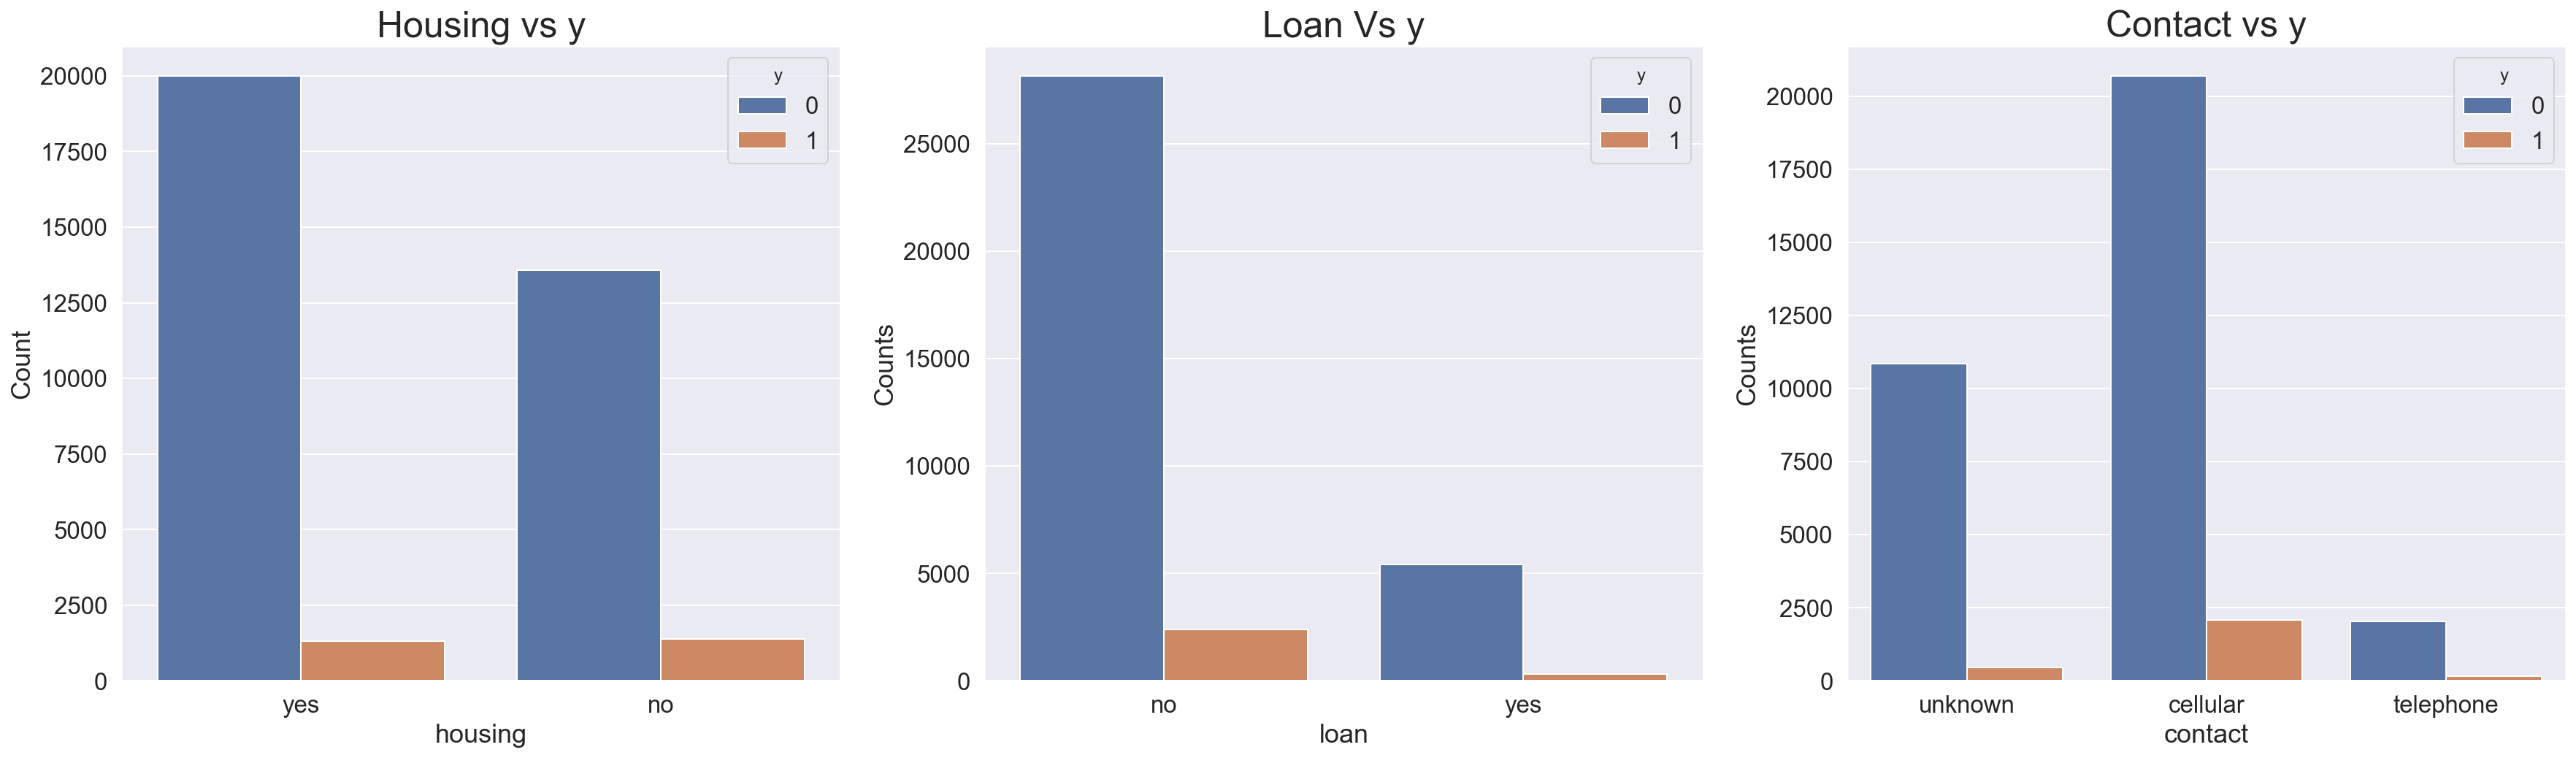

In [37]:
#Create plots for other variables vs term deposit variables.

fig, ax = plt.subplots(ncols=3, figsize=(30, 8))

sns.countplot(x = 'housing', hue ='y', data = term_deposit, ax=ax[0])
ax[0].set_xlabel('housing')
ax[0].set_ylabel('Count')
ax[0].set_title('Housing vs y',fontsize =25)

sns.countplot(x = 'loan', hue ='y', data = term_deposit, ax=ax[1])
ax[1].set_xlabel('loan')
ax[1].set_ylabel('Counts')
ax[1].set_title('Loan Vs y',fontsize =25)

sns.countplot(x = 'contact', hue ='y', data = term_deposit, ax=ax[2])
ax[2].set_xlabel('contact')
ax[2].set_ylabel('Counts')
ax[2].set_title('Contact vs y',fontsize =25)

plt.show()

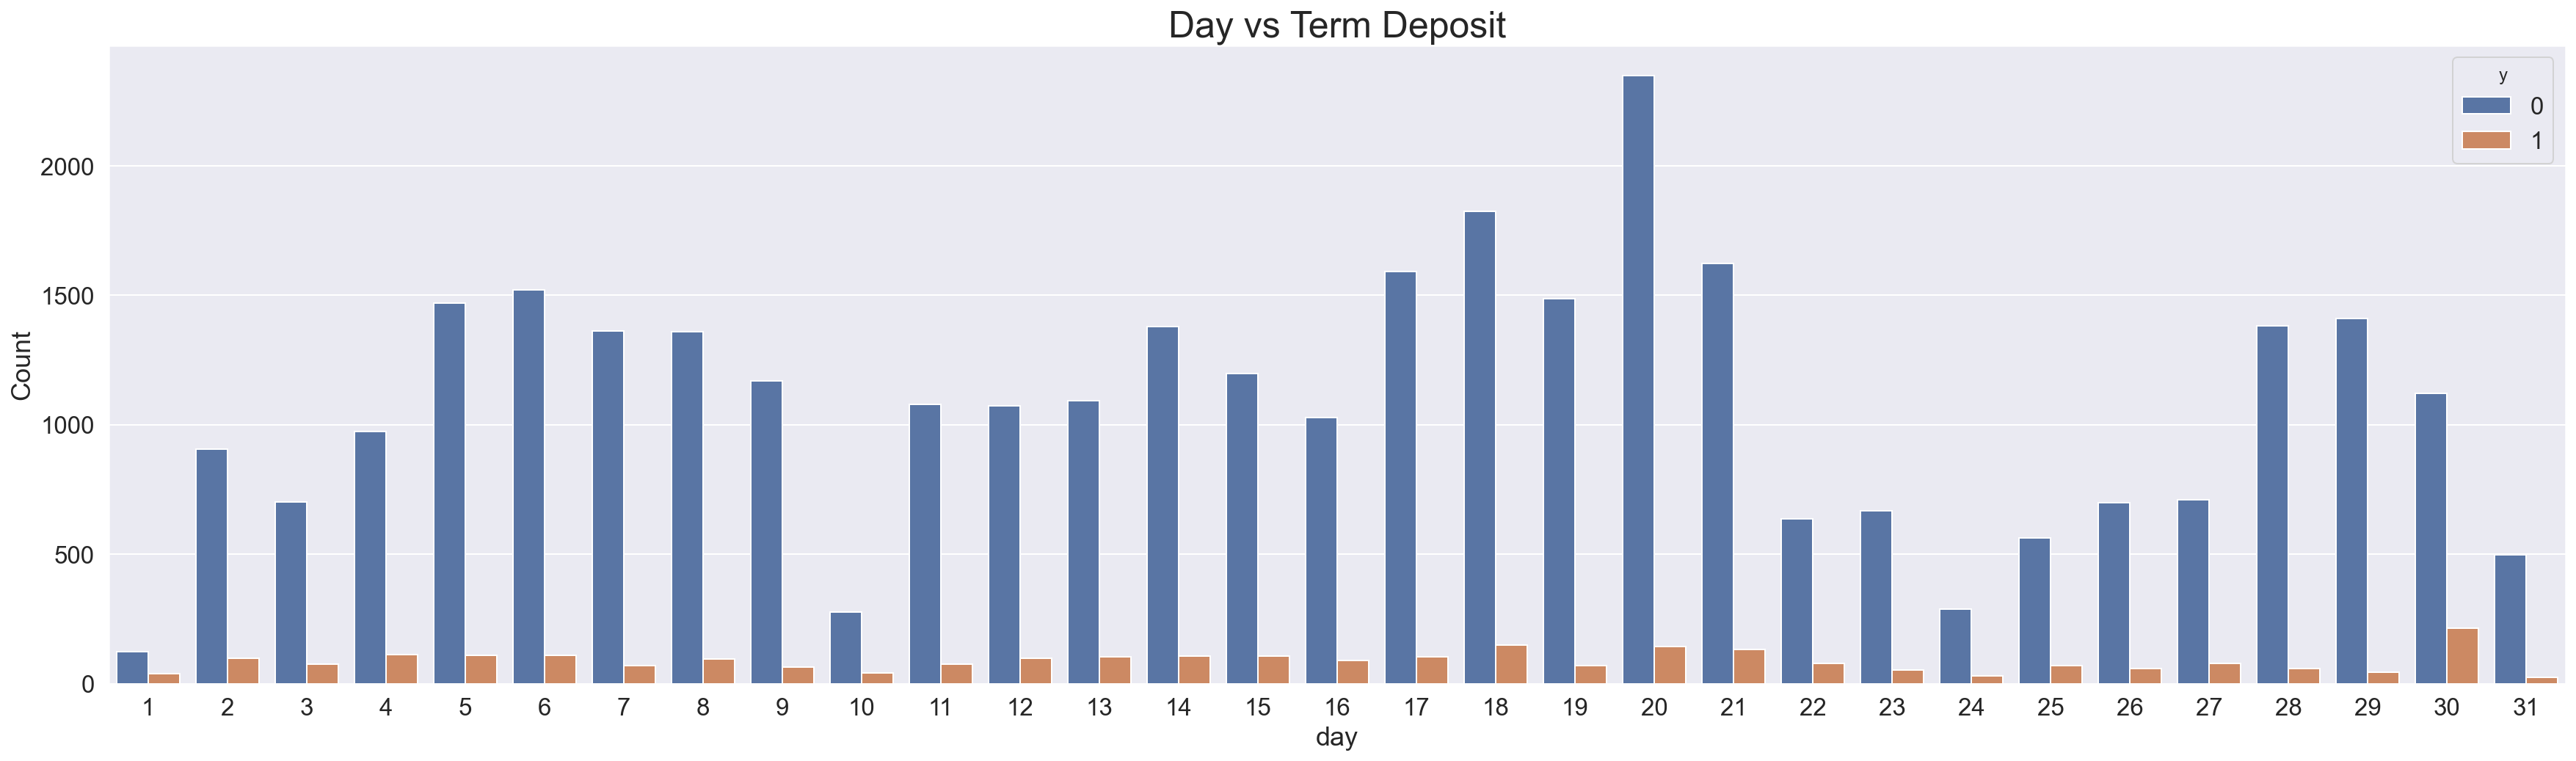

In [38]:
#Create plots for other variables vs term deposit variables.

fig, ax = plt.subplots(ncols=1, figsize=(30, 8))

sns.countplot(x = 'day', hue ='y', data = term_deposit, ax=ax)
ax.set_xlabel('day')
ax.set_ylabel('Count')
ax.set_title('Day vs Term Deposit',fontsize =25)

plt.show()

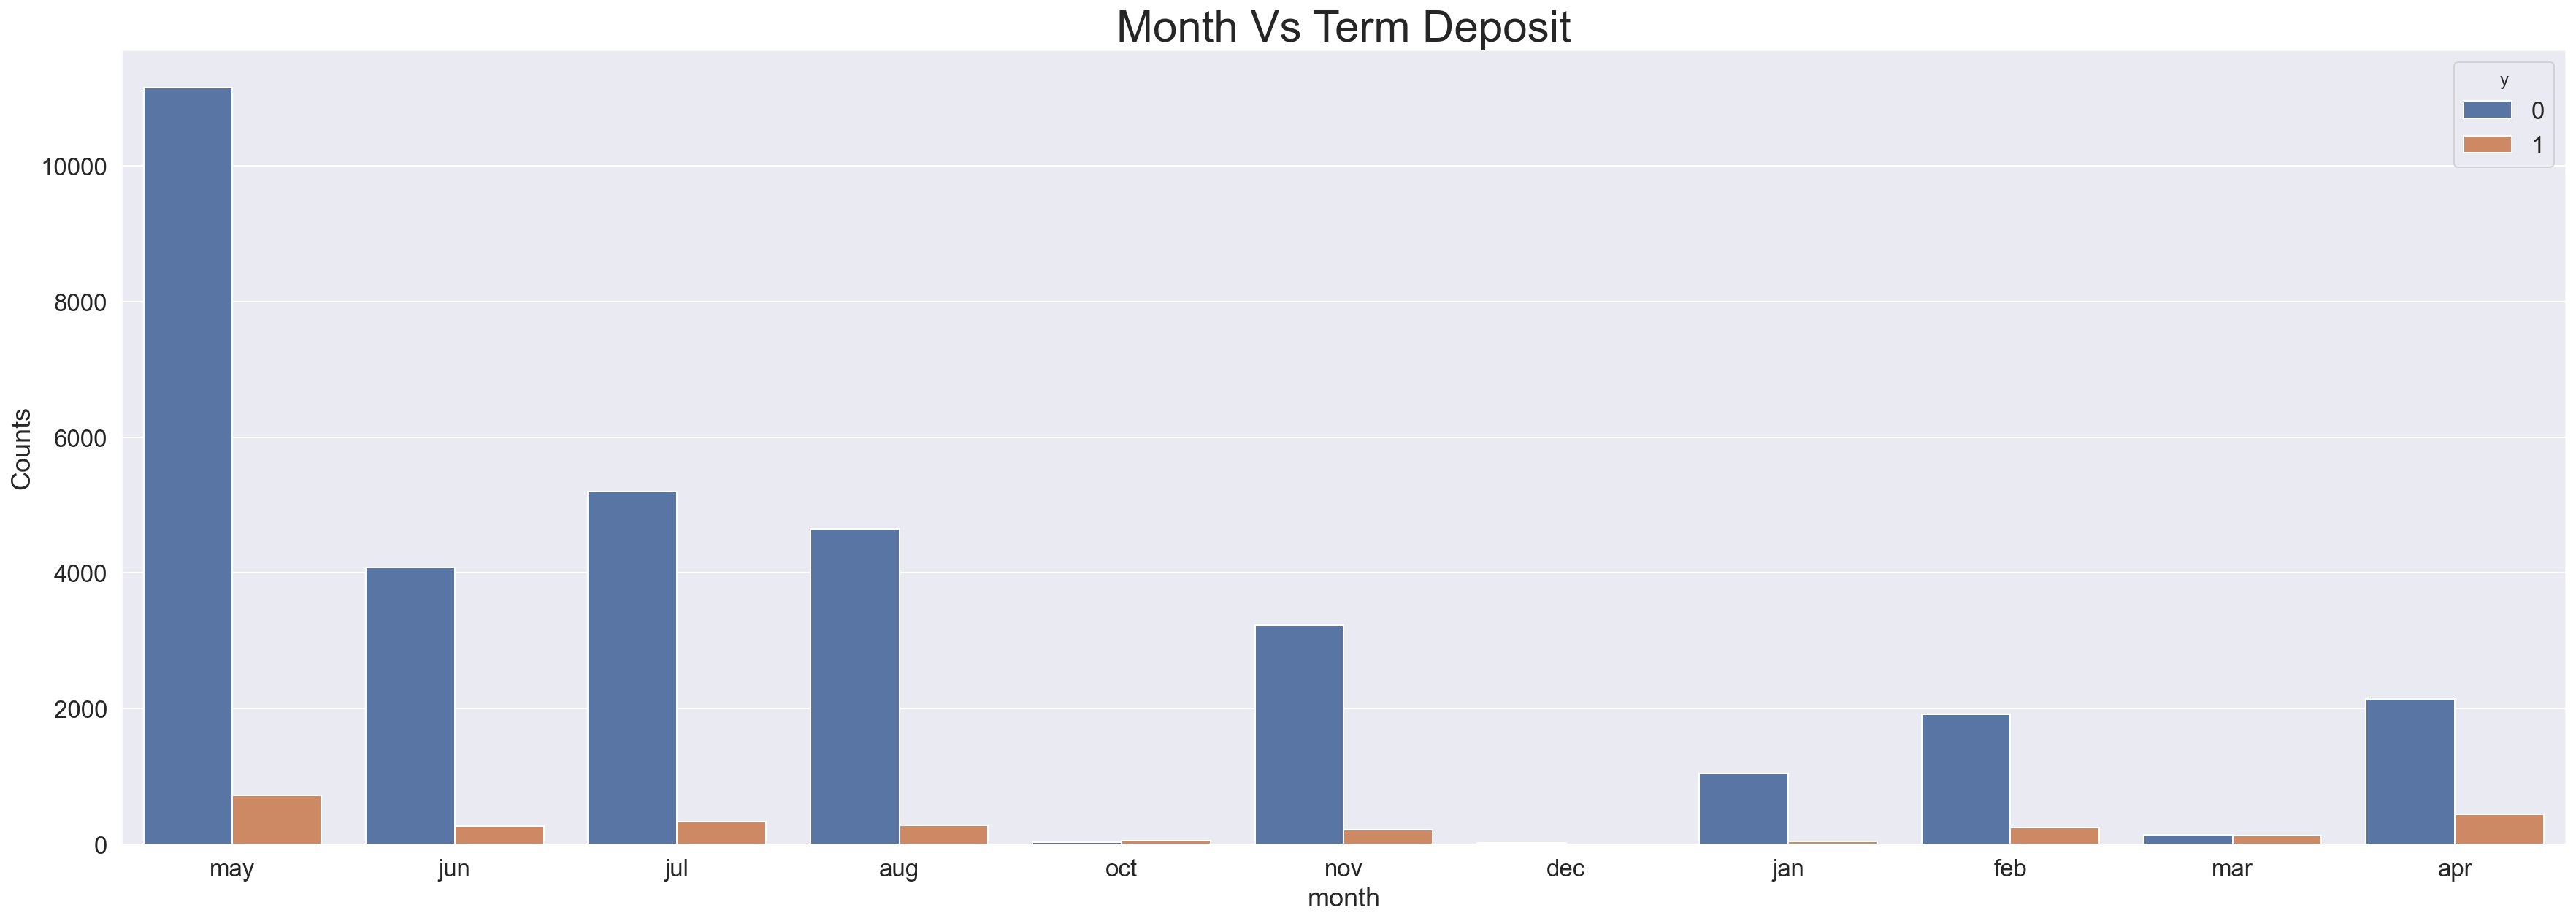

In [39]:
#Create plots for other variables vs term deposit variable.

fig, ax = plt.subplots(ncols=1, figsize=(30, 10))

sns.countplot(x = 'month', hue ='y', data = term_deposit, ax=ax)
ax.set_xlabel('month')
ax.set_ylabel('Counts')
ax.set_title('Month Vs Term Deposit',fontsize =30)


plt.show()

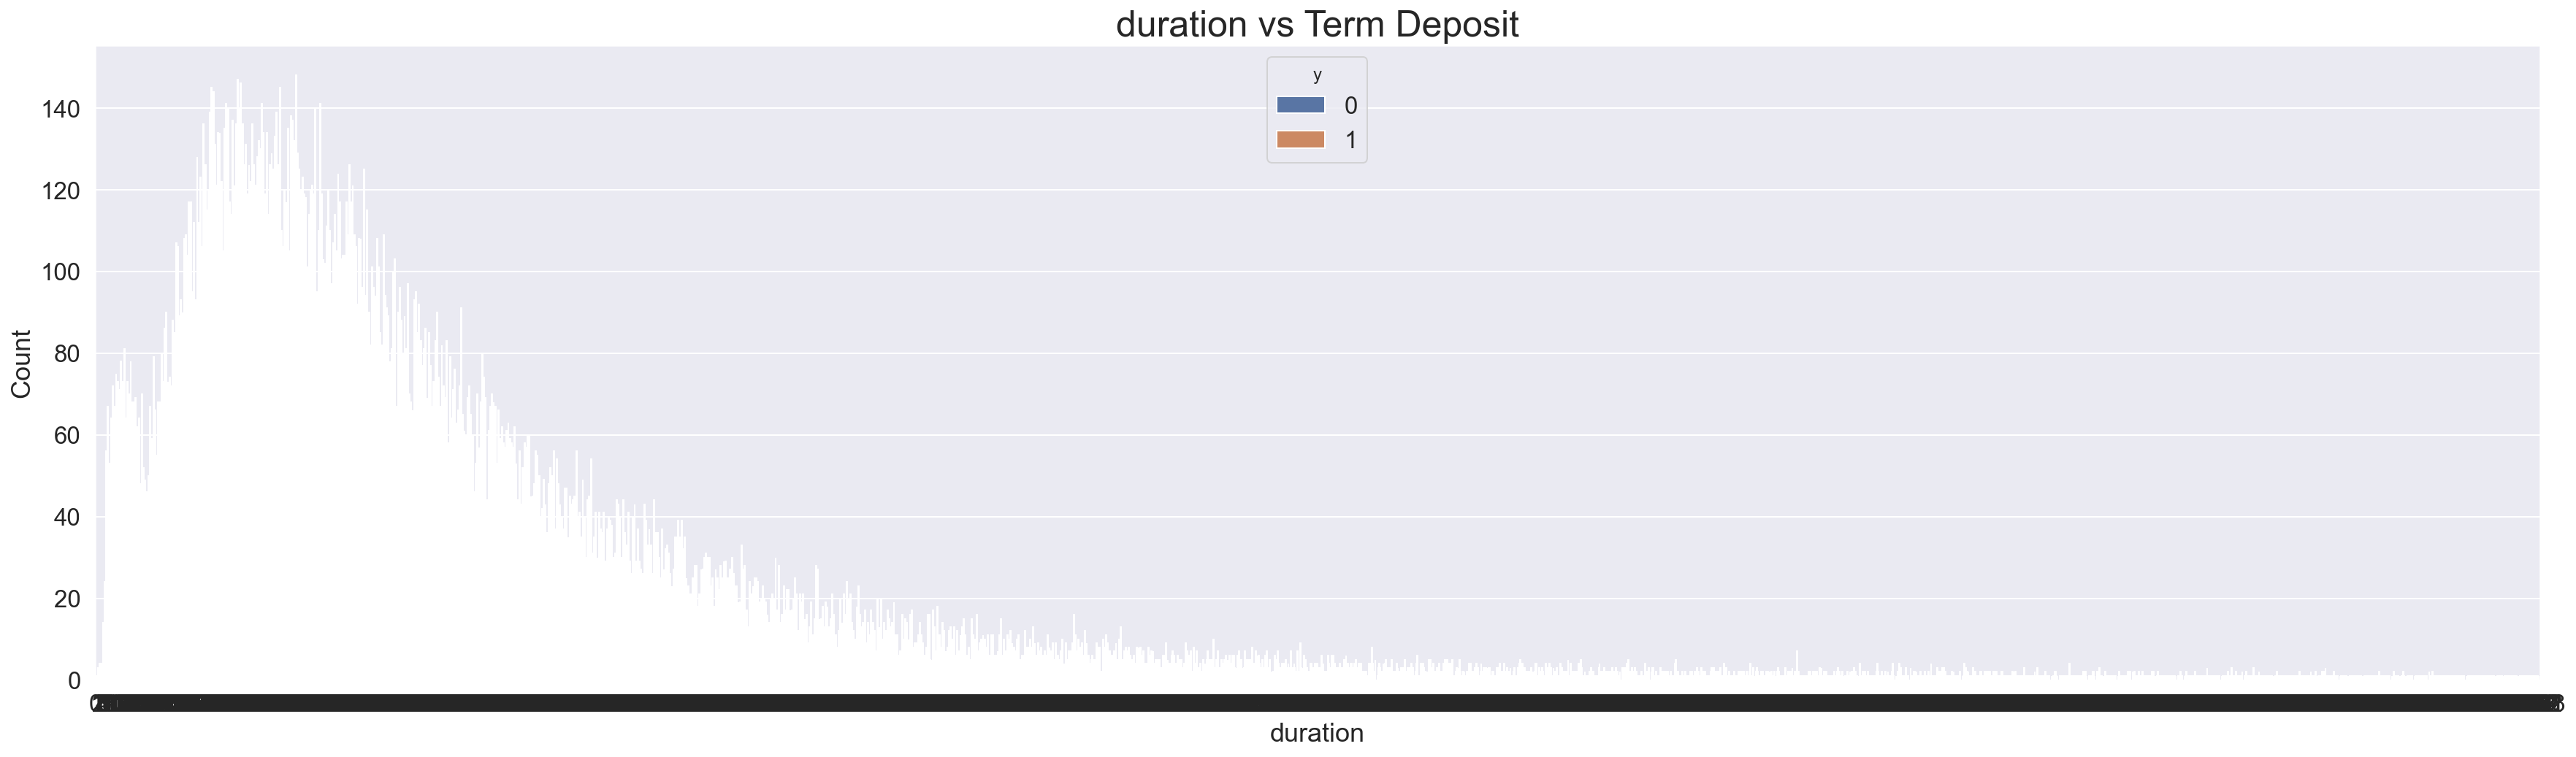

In [40]:
#Create plots for other variables vs term deposit variables.

fig, ax = plt.subplots(ncols=1, figsize=(30, 8))

sns.countplot(x = 'duration', hue ='y', data = term_deposit, ax=ax)
ax.set_xlabel('duration')
ax.set_ylabel('Count')
ax.set_title('duration vs Term Deposit',fontsize =25)

plt.show()

As we are unable to interpret the plot shown above, duration will be binned and the categories plotted to provide a more meaningful visualisation.

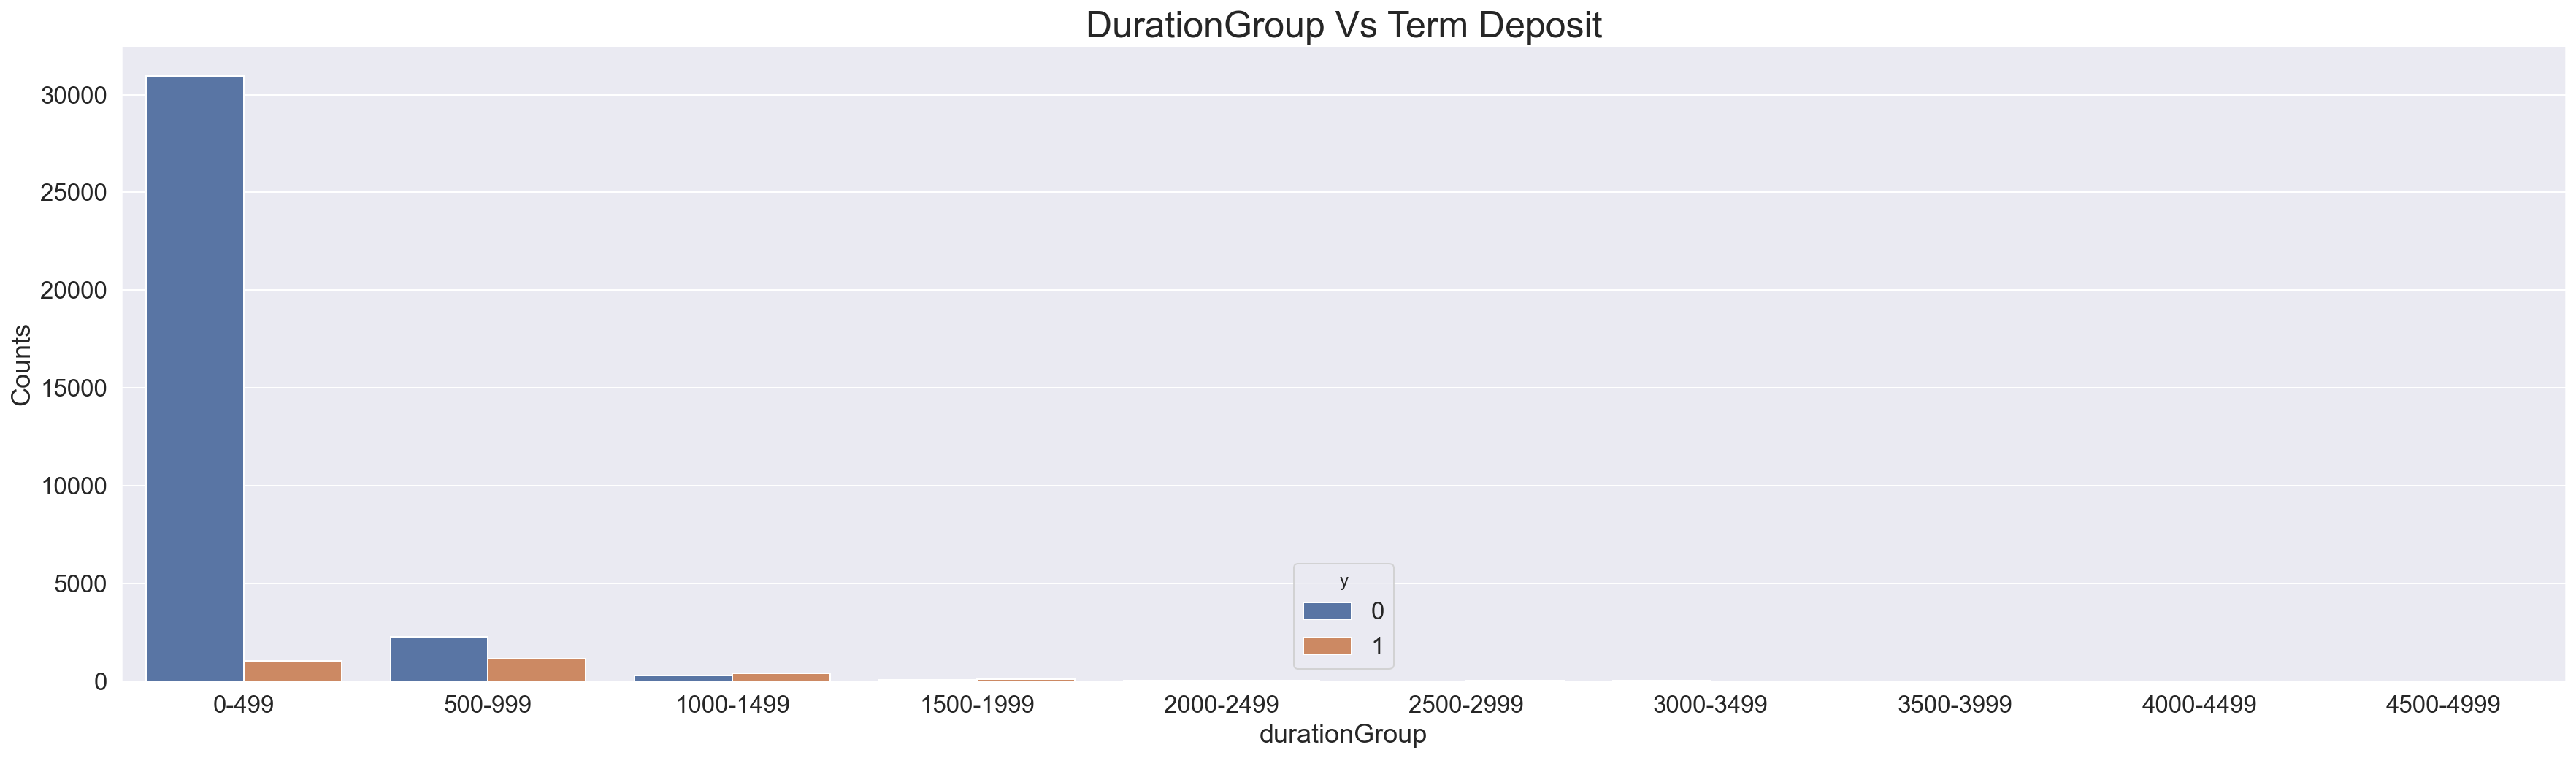

In [41]:
#Create plots for other variables vs term deposit variables.

fig, ax = plt.subplots(ncols=1, figsize=(30, 8))

sns.countplot(x = 'durationGroup', hue ='y', data = term_deposit, ax=ax)
ax.set_xlabel('durationGroup')
ax.set_ylabel('Counts')
ax.set_title('DurationGroup Vs Term Deposit',fontsize =25)

plt.show()

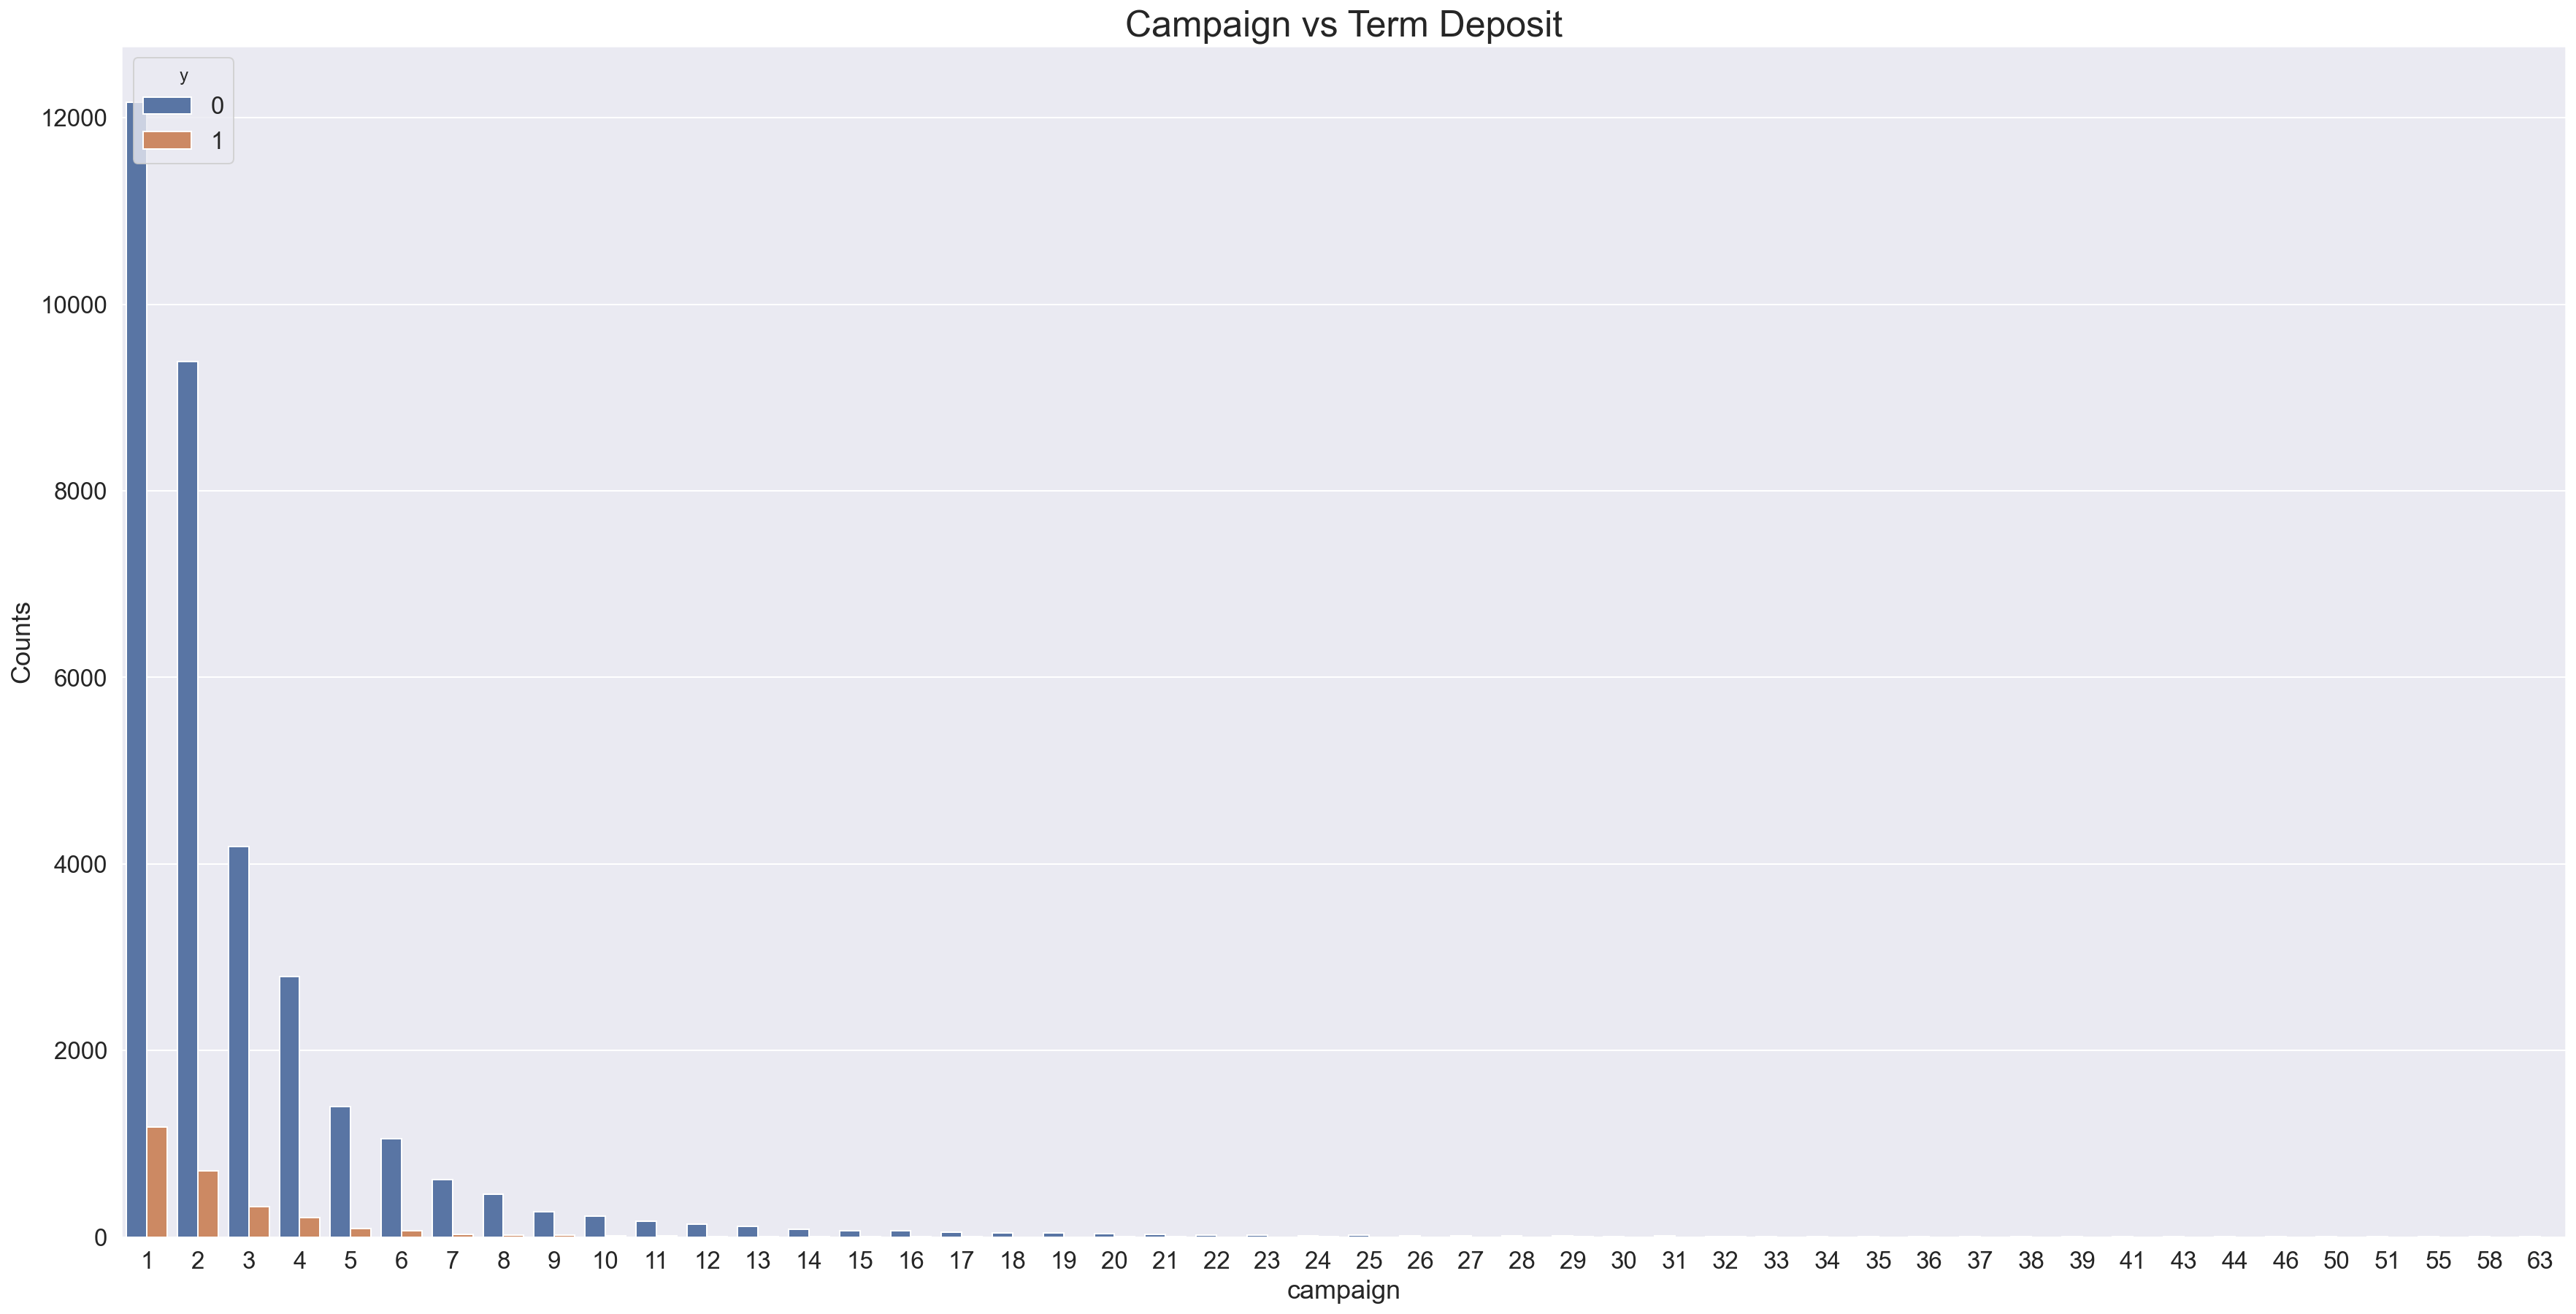

In [42]:
#Create plots for other variables vs term deposit variables.

fig, ax = plt.subplots(ncols=1, figsize=(30, 15))

sns.countplot(x = 'campaign', hue ='y', data = term_deposit, ax=ax)
ax.set_xlabel('campaign')
ax.set_ylabel('Counts')
ax.set_title('Campaign vs Term Deposit',fontsize =25)

plt.show()

In [43]:
term_deposit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36269 entries, 0 to 39999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   age            36269 non-null  int64   
 1   job            36269 non-null  object  
 2   marital        36269 non-null  object  
 3   education      36269 non-null  object  
 4   default        36269 non-null  object  
 5   balance        36269 non-null  int64   
 6   housing        36269 non-null  object  
 7   loan           36269 non-null  object  
 8   contact        36269 non-null  object  
 9   day            36269 non-null  int64   
 10  month          36269 non-null  object  
 11  duration       36269 non-null  int64   
 12  campaign       36269 non-null  int64   
 13  y              36269 non-null  int64   
 14  ageGroup       36269 non-null  category
 15  balanceGroup   36269 non-null  category
 16  durationGroup  36266 non-null  category
dtypes: category(3), int64(6), objec

In [44]:
term_deposit.describe(include = 'all').T

count unique          top   freq       mean       std  min  \
age            36269    NaN          NaN    NaN    40.6491   9.69392   19   
job            36269     12  blue-collar   8280        NaN       NaN  NaN   
marital        36269      3      married  22195        NaN       NaN  NaN   
education      36269      4    secondary  18699        NaN       NaN  NaN   
default        36269      2           no  35899        NaN       NaN  NaN   
balance        36269    NaN          NaN    NaN    1438.21   2999.52    0   
housing        36269      2          yes  21311        NaN       NaN  NaN   
loan           36269      2           no  30544        NaN       NaN  NaN   
contact        36269      3     cellular  22776        NaN       NaN  NaN   
day            36269    NaN          NaN    NaN    15.9702    8.2455    1   
month          36269     11          may  11870        NaN       NaN  NaN   
duration       36269    NaN          NaN    NaN    255.042   260.227    0   
campaign       36269    NaN          NaN    NaN    2.87645   3.21245    1   
y              36269    NaN          NaN    NaN  0.0744162  0.262451    0   
ageGroup       36269      9        30-39  14641        NaN       NaN  NaN   
balanceGroup   36269     17       0-4999  30715        NaN       NaN  NaN   
durationGroup  36266      9        0-499  31972        NaN       NaN  NaN   

               25%  50%   75%     max  
age             33   39    48      95  
job            NaN  NaN   NaN     NaN  
marital        NaN  NaN   NaN     NaN  
education      NaN  NaN   NaN     NaN  
default        NaN  NaN   NaN     NaN  
balance        134  507  1480  102127  
housing        NaN  NaN   NaN     NaN  
loan           NaN  NaN   NaN     NaN  
contact        NaN  NaN   NaN     NaN  
day              8   17    21      31  
month          NaN  NaN   NaN     NaN  
duration        99  175   314    4918  
campaign         1    2     3      63  
y                0    0     0       1  
ageGroup       NaN  NaN   NaN     NaN  
balanceGroup   NaN  NaN   NaN     NaN  
durationGroup  NaN  NaN   NaN     NaN

# Count Plots - Discussions of Visualizations

In the count plots we are visualising the predictor varibles with the target variable y. We can see from the plots that:

* Age vs y - The majority of term deposit holders fall in the ages 20 - 59 with the greatest number in being 30 -39. 

* Job vs y - The job category with the highest number of term deposit holders is that of 'management'.

* Default vs y - This shows that the term deposit holders are not customers  who have credit in default.

* Marital vs y - Term deposit holders fall in the categories - married, single and divorced with the majority of deposit holders being married.

* Education vs y - The majority of term deposit holders were educated to secondary level and above.

* Balance vs y - The majority of deposit holders had a balance of between 0 and 5000.

* Housing vs y - The term deposit holders with housing loan and those without housing loan appear to be the same. Based on this it would be reasonable to deduce that housing loan has no impact on whether a customer will have a term deposit or not.

* Loan vs y - The majority of term deposit holders do not have personal loans.

* Contact vs y - The majority of term deposit holders have a cell number for contact.

* Day vs y - The majority of term deposits are taken out on the 30th day of a month.

* Month vs y - The months April to August have the largest number of term deposit with the single best month being May.

* Duration vs y - The duration of the last contact in seconds for the majority of term deposit holders fall between 1 and 999.

* Campaign vs y - The number of contacts performed during a campaign and for a term deposit holder ranged from 1 to 4 with 1 contact being necessary for the majority of term deposit holders.





In [45]:
# Drop groups that were derived for visualisation purposes
term_deposit.drop(columns=['ageGroup', 'balanceGroup', 'durationGroup'], inplace=True)

In [46]:
term_deposit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36269 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        36269 non-null  int64 
 1   job        36269 non-null  object
 2   marital    36269 non-null  object
 3   education  36269 non-null  object
 4   default    36269 non-null  object
 5   balance    36269 non-null  int64 
 6   housing    36269 non-null  object
 7   loan       36269 non-null  object
 8   contact    36269 non-null  object
 9   day        36269 non-null  int64 
 10  month      36269 non-null  object
 11  duration   36269 non-null  int64 
 12  campaign   36269 non-null  int64 
 13  y          36269 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 5.4+ MB


In [47]:
#Baseline : 0 - No term deposit, 1- term deposit
term_deposit.y.value_counts(normalize=True)

0    0.925584
1    0.074416
Name: y, dtype: float64

Class 0: 33570
Class 1: 2699
Proportion: 12.44 : 1


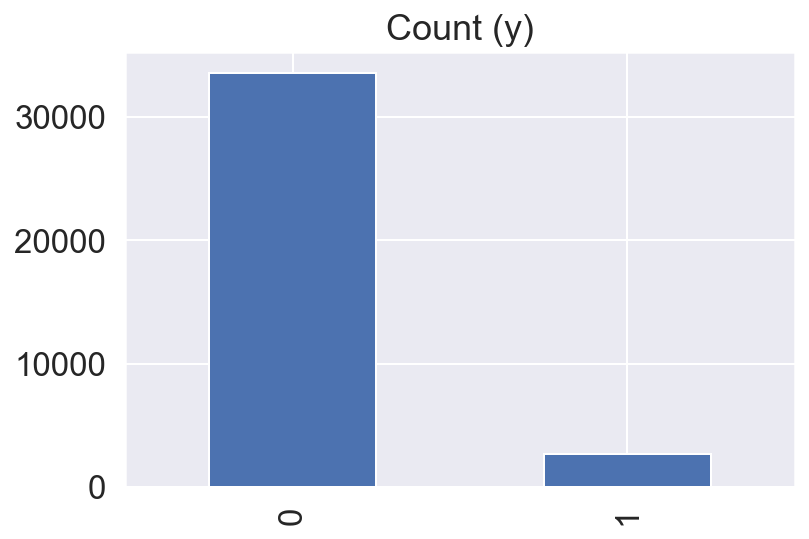

In [48]:
target_count =term_deposit.y.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (y)');

# Project Analysis

The target variable for this project is y ie. term deposit. The dataset shows that customers with no term deposit customers is 93% vs term deposit customers of 7%. 

We can see from above that this is an Imbalanced classification problem as the distribution of examples across the classes is not equal and the proportion of the classes is 12.44 : 1.

The baseline for the target variable has been assessed as follows: Baseline -

0 - No term deposit - 0.9256 1 - term deposit - 0.7442 The data will be split in train and test dataset in a 70:30 split and classification models will be used to predict whether a customer will subscribe to a term deposit or not.


Imbalanced classifications poses a challenge for predictive modeling as most of the machine learning algorithms used for classification were designed around the assumption of an equal number of examples for each class.

A classification problem may be a little skewed, such as if there is a slight imbalance or alternatively, the classification problem may have a severe imbalance. 

This results in models that have poor predictive performance, specifically for the minority class. This is a problem because typically, the minority class is more important and therefore the problem is more sensitive to classification errors for the minority class than the majority class.

The common mistakes that are made when working on imbalanced classification problems are as follows:
* 1. Classification accuracy is used to estimate performance, but in this case accuracy is dangerously misleading. 
* 2. Standard models are fitted on raw data, resulting in poor performance.
* 3. Standard machine learning algorithms are used to evaluate the models, but these algorithms treat all classification errors as the same.

For imbalalnced datasets, using simpler metrics like accuracy can be misleading. In a dataset with highly unbalanced classes, if the classifier always "predicts" the most common class without performing any analysis of the features, it will still have a high accuracy rate, which is obviously illusory.

The problem is a classification problem as the target variable is a binary classifier. Based on this we will use Machine learning classifers to predict the customers who will subscribe for term deposits and assess the accuracy of the models.

The following classifiers will be used in the project:

* Logistic regression Classifier,
* Naive Bayes Classifier (Gaussian)
* Decision Tree Classifier,
* Adaboost Classifier,
* GradientBoosting Clasifier and
* Random Forest Classifier.

The models will be assessed using accuracy as the metric, where the model that achieves an accuracy score of 81% or greater will be determined as the best performing model.





# Splitting data between Target variable - y and predictor variables

In [49]:
#Get X and y data 
#Dummifying the predictor variables identified as classification variables.

df = term_deposit.copy()
y = df.pop('y')
X = df
X = pd.get_dummies(X, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 
                               'month',], drop_first=True)

In [50]:
X.head()

age  balance  day  duration  campaign  job_blue-collar  job_entrepreneur  \
0   58     2143    5       261         1                0                 0   
1   44       29    5       151         1                0                 0   
2   33        2    5        76         1                0                 1   
3   47     1506    5        92         1                1                 0   
4   33        1    5       198         1                0                 0   

   job_housemaid  job_management  job_retired  ...  month_aug  month_dec  \
0              0               1            0  ...          0          0   
1              0               0            0  ...          0          0   
2              0               0            0  ...          0          0   
3              0               0            0  ...          0          0   
4              0               0            0  ...          0          0   

   month_feb  month_jan  month_jul  month_jun  month_mar  month_may  \
0          0          0          0          0          0          1   
1          0          0          0          0          0          1   
2          0          0          0          0          0          1   
3          0          0          0          0          0          1   
4          0          0          0          0          0          1   

   month_nov  month_oct  
0          0          0  
1          0          0  
2          0          0  
3          0          0  
4          0          0  

[5 rows x 36 columns]

In [51]:
X.shape

(36269, 36)

In [52]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [53]:
y.shape

(36269,)

# Splitting Data into test and train

In [54]:
# split data between test and training data , standardising the data 

X_train, X_test, y_train, y_test = train_test_split(X, y,
                        stratify=y, test_size=0.3, random_state=42)
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)
X_train.head()

age   balance       day  duration  campaign  job_blue-collar  \
0  0.658650 -0.471686  0.484433 -0.614277 -0.580677        -0.545366   
1 -0.896191 -0.465816  0.363512 -0.908127 -0.580677        -0.545366   
2 -0.688879 -0.469403  1.451804  0.116482 -0.273381        -0.545366   
3 -0.999848 -0.245015 -1.571230  0.228609 -0.580677        -0.545366   
4 -0.481567 -0.309266  1.572726 -0.401622 -0.580677        -0.545366   

   job_entrepreneur  job_housemaid  job_management  job_retired  ...  \
0         -0.194454       -0.17121       -0.517264     -0.19027  ...   
1         -0.194454       -0.17121       -0.517264     -0.19027  ...   
2         -0.194454       -0.17121       -0.517264     -0.19027  ...   
3         -0.194454       -0.17121       -0.517264     -0.19027  ...   
4         -0.194454       -0.17121       -0.517264     -0.19027  ...   

   month_aug  month_dec  month_feb  month_jan  month_jul  month_jun  \
0  -0.395364  -0.015375   -0.25315  -0.177092  -0.424604  -0.372397   
1  -0.395364  -0.015375   -0.25315  -0.177092  -0.424604  -0.372397   
2  -0.395364  -0.015375   -0.25315  -0.177092  -0.424604  -0.372397   
3  -0.395364  -0.015375   -0.25315  -0.177092  -0.424604  -0.372397   
4  -0.395364  -0.015375   -0.25315   5.646770  -0.424604  -0.372397   

   month_mar  month_may  month_nov  month_oct  
0   -0.08379  -0.694319  -0.323411  -0.045304  
1   -0.08379  -0.694319   3.092043  -0.045304  
2   -0.08379   1.440261  -0.323411  -0.045304  
3   -0.08379  -0.694319  -0.323411  -0.045304  
4   -0.08379  -0.694319  -0.323411  -0.045304  

[5 rows x 36 columns]

In [55]:
y_train.value_counts()

0    23499
1     1889
Name: y, dtype: int64

# Logistic Regression Model

In [56]:
model = LogisticRegression(max_iter=100000)

In [57]:
# setup the grid search

params = {'C': np.logspace(-4, 2, 10),
          'solver': ['liblinear'],
          'penalty': ['l2'],
          'fit_intercept': [True, False]}

gs = GridSearchCV(estimator=model,
                  param_grid=params,
                  cv=5,
                  scoring='accuracy',
                  return_train_score=True,
                  n_jobs=-2)

gs.fit(X_train, y_train)

# extract the grid search results

print('Best Parameters:')
print(gs.best_params_)
print('Best estimator C:')
print(gs.best_estimator_.C)
print('Best estimator mean cross validated training score:')
print(gs.best_score_)
print('Best estimator score on the full training set:')
print(gs.score(X_train, y_train))
print('Best estimator score on the test set:')
print(gs.score(X_test, y_test))


Best Parameters:
{'C': 0.046415888336127774, 'fit_intercept': True, 'penalty': 'l2', 'solver': 'liblinear'}
Best estimator C:
0.046415888336127774
Best estimator mean cross validated training score:
0.933748101218393
Best estimator score on the full training set:
0.9336694501339216
Best estimator score on the test set:
0.931899641577061


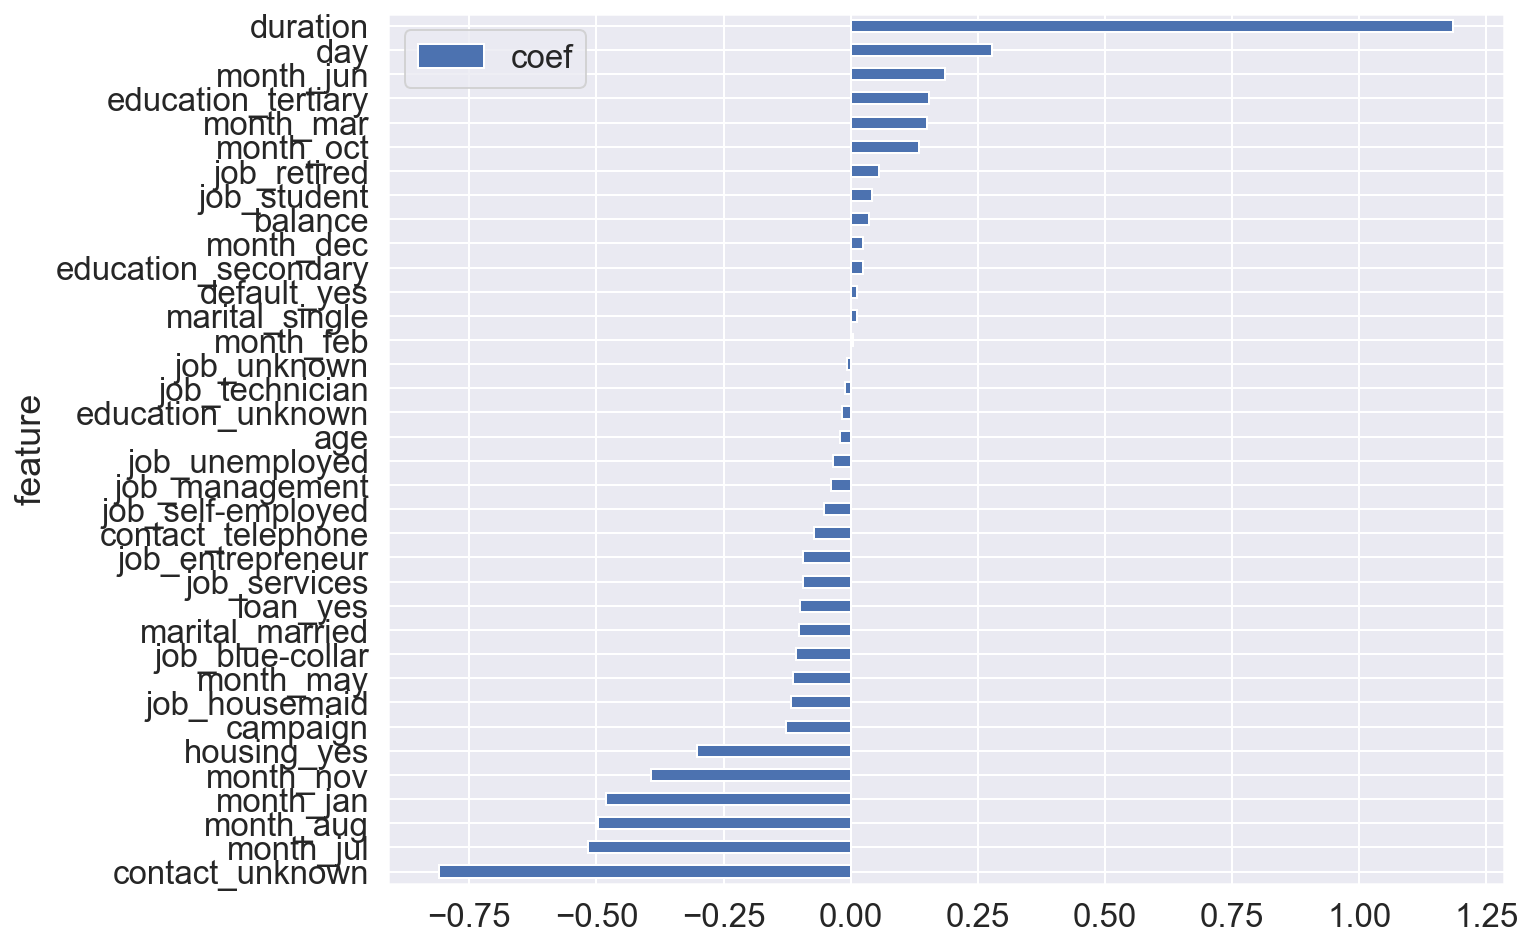

In [58]:
pd.DataFrame(list(zip(X.columns, gs.best_estimator_.coef_[0])), columns=['feature', 'coef']
            ).sort_values(by='coef'
                         ).plot(kind='barh', x='feature', y='coef', figsize=(10, 8))
plt.show()

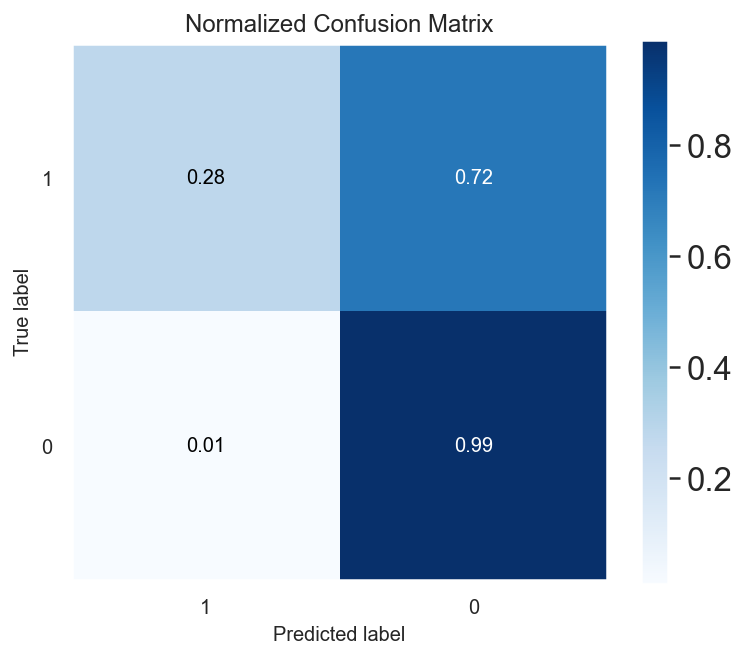

In [59]:
# Compute predictions and plot confusion matrix for training set
predictions_train = gs.predict(X_train)

skplt.metrics.plot_confusion_matrix(y_train, predictions_train, labels=[1, 0], figsize=(6,5), normalize='all')
plt.show()

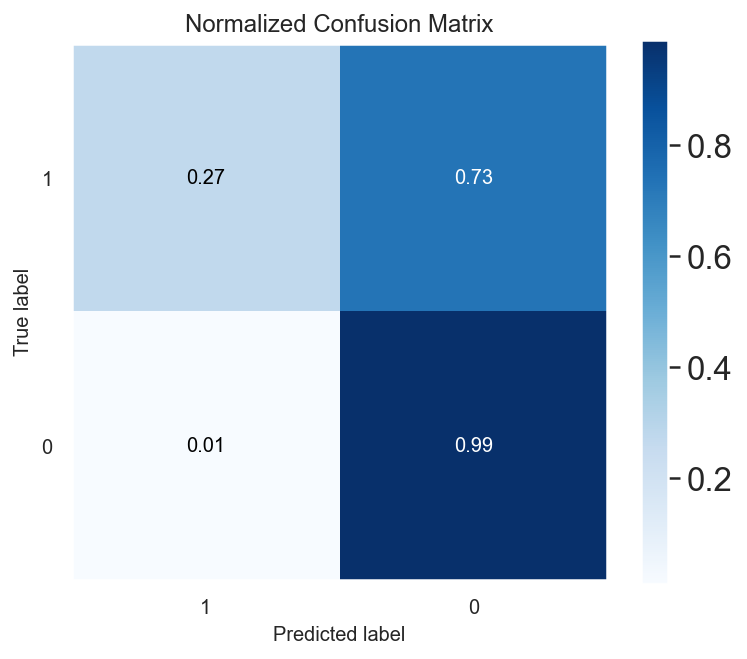

In [60]:
# Compute predictions and plot confusion matrix for test set
predictions_test = gs.predict(X_test)

skplt.metrics.plot_confusion_matrix(y_test, predictions_test, labels=[1, 0], figsize=(6,5), normalize='all')
plt.show()

In [61]:
print(classification_report(y_train, predictions_train))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     23499
           1       0.62      0.28      0.38      1889

    accuracy                           0.93     25388
   macro avg       0.78      0.63      0.67     25388
weighted avg       0.92      0.93      0.92     25388



In [62]:
print(classification_report(y_test, predictions_test))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     10071
           1       0.59      0.27      0.37       810

    accuracy                           0.93     10881
   macro avg       0.77      0.63      0.67     10881
weighted avg       0.92      0.93      0.92     10881



# Naive Bayes Model

In [63]:
naiveB = GaussianNB() 

In [64]:
# fit model

naiveB.fit(X_train, y_train)

print(naiveB.score(X_train, y_train))
print(cross_val_score(naiveB, X_train, y_train, cv=5).mean())
print(naiveB.score(X_test, y_test))

0.9130691665353711
0.7688781966072231
0.9137946879882364


In [65]:
imps = permutation_importance(naiveB, X_test, y_test)
importances = imps.importances_mean
std = imps.importances_std
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_test.shape[1]):
    print("%d. %s (%f)" % (f + 1, X_test.columns[indices[f]], importances[indices[f]]))


Feature ranking:
1. duration (0.029409)
2. month_mar (0.006654)
3. month_oct (0.002739)
4. job_student (0.002610)
5. job_retired (0.002316)
6. month_jan (0.001728)
7. campaign (0.000662)
8. month_nov (0.000607)
9. balance (0.000331)
10. education_unknown (0.000294)
11. job_housemaid (0.000221)
12. contact_telephone (0.000221)
13. month_jul (0.000184)
14. month_jun (0.000074)
15. loan_yes (0.000055)
16. job_technician (0.000055)
17. default_yes (0.000018)
18. month_dec (-0.000055)
19. marital_single (-0.000074)
20. education_tertiary (-0.000074)
21. job_entrepreneur (-0.000129)
22. contact_unknown (-0.000129)
23. job_self-employed (-0.000147)
24. job_unknown (-0.000239)
25. marital_married (-0.000257)
26. education_secondary (-0.000276)
27. job_services (-0.000331)
28. age (-0.000368)
29. day (-0.000386)
30. job_management (-0.000423)
31. job_blue-collar (-0.000496)
32. housing_yes (-0.000515)
33. month_aug (-0.000551)
34. month_may (-0.000919)
35. job_unemployed (-0.001820)
36. month_f

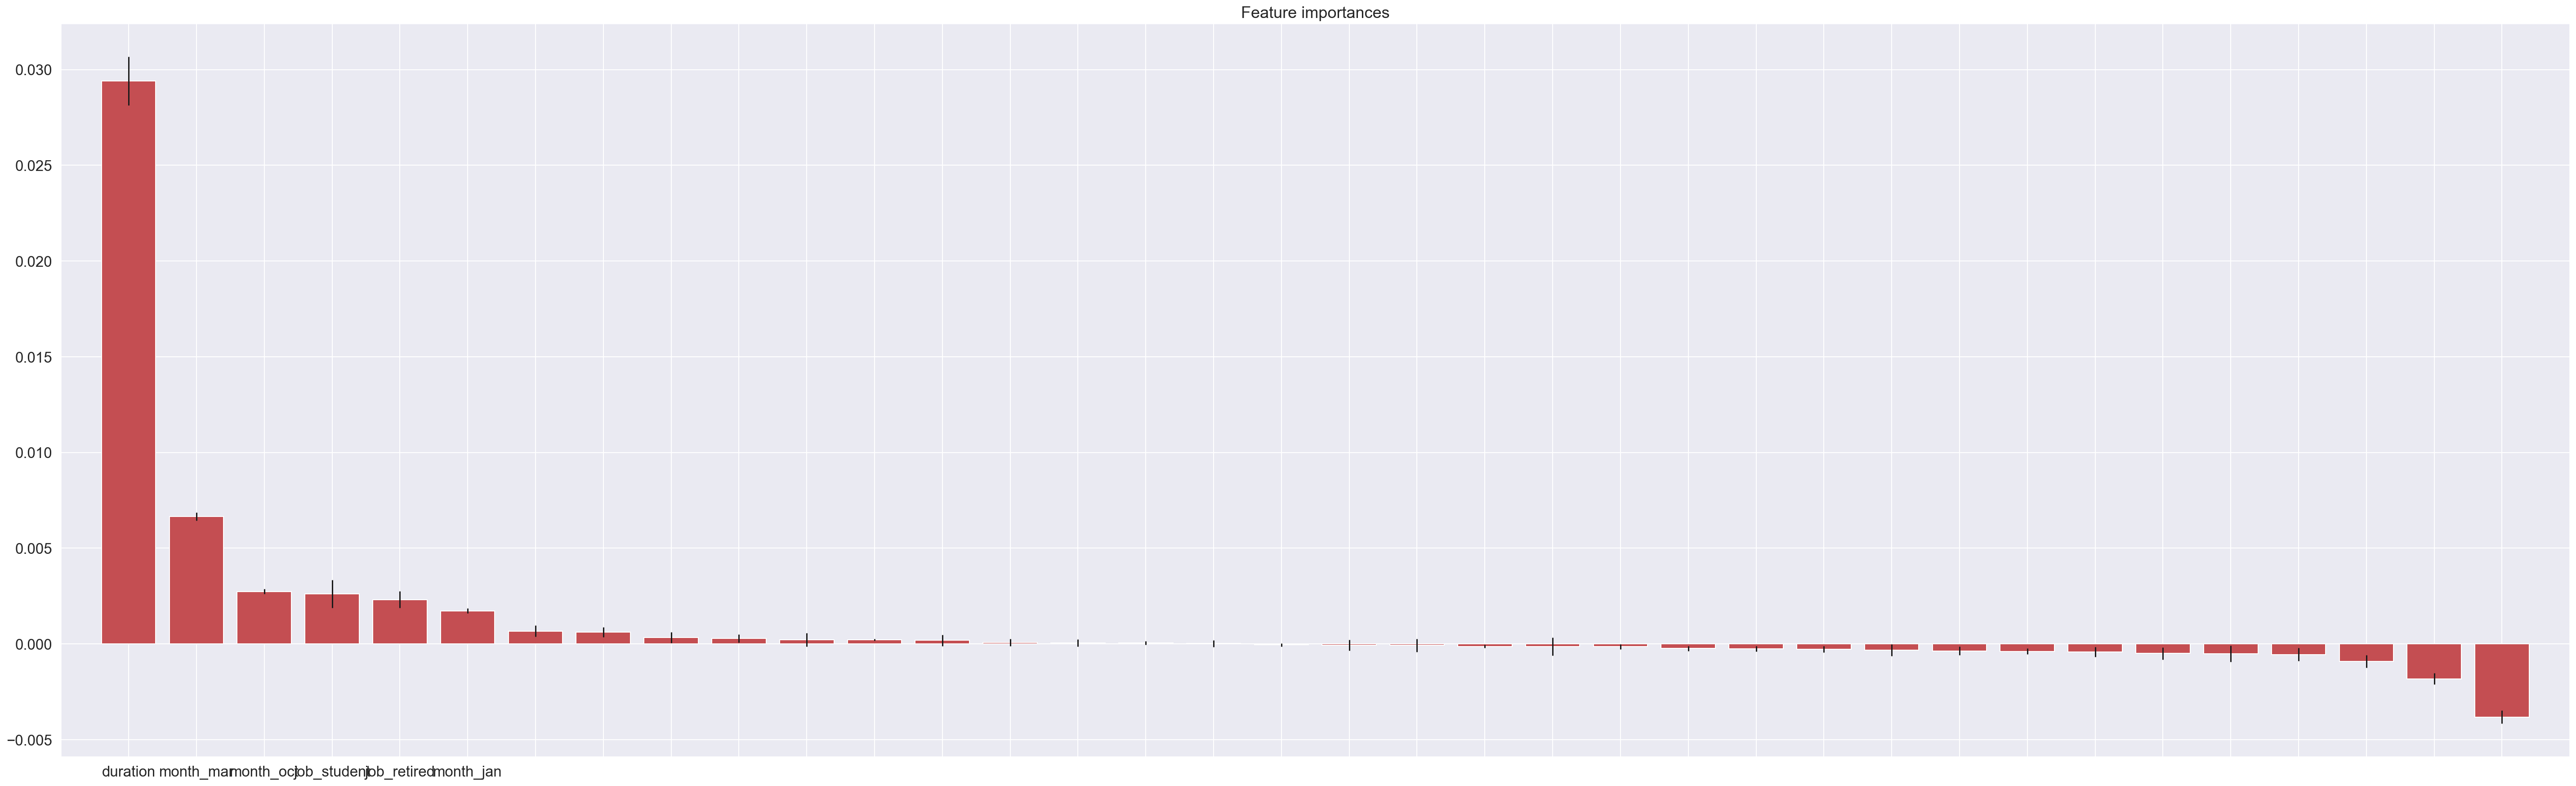

In [66]:
plt.figure(figsize=(50, 15))
plt.title("Feature importances")
plt.bar(range(X_test.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X_test.shape[1]), [X_test.columns[indices[i]] for i in range(6)])
plt.xlim([-1, X_test.shape[1]])
plt.show()

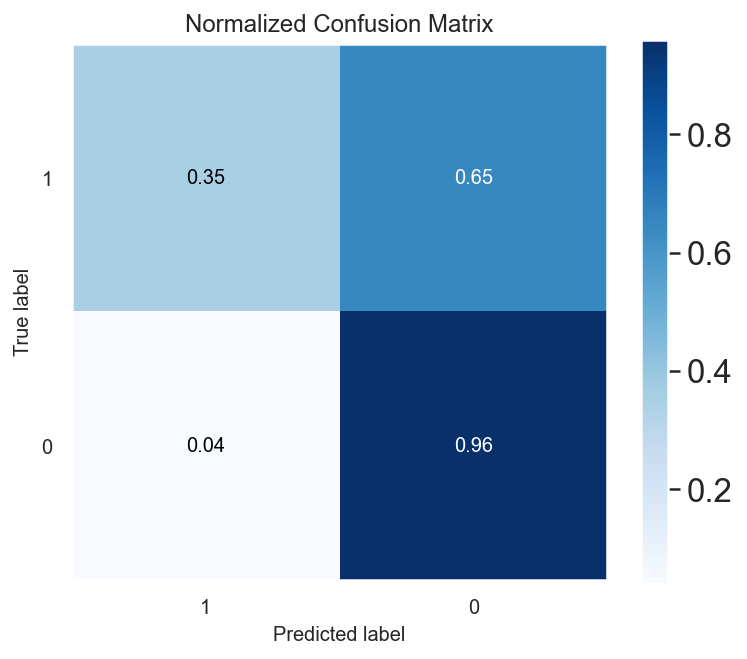

In [67]:
# Compute predictions and plot confusion matrix for training set
predictionsnb_train = naiveB.predict(X_train)

skplt.metrics.plot_confusion_matrix(y_train, predictionsnb_train, labels=[1, 0], figsize=(6,5), normalize='all')
plt.show()

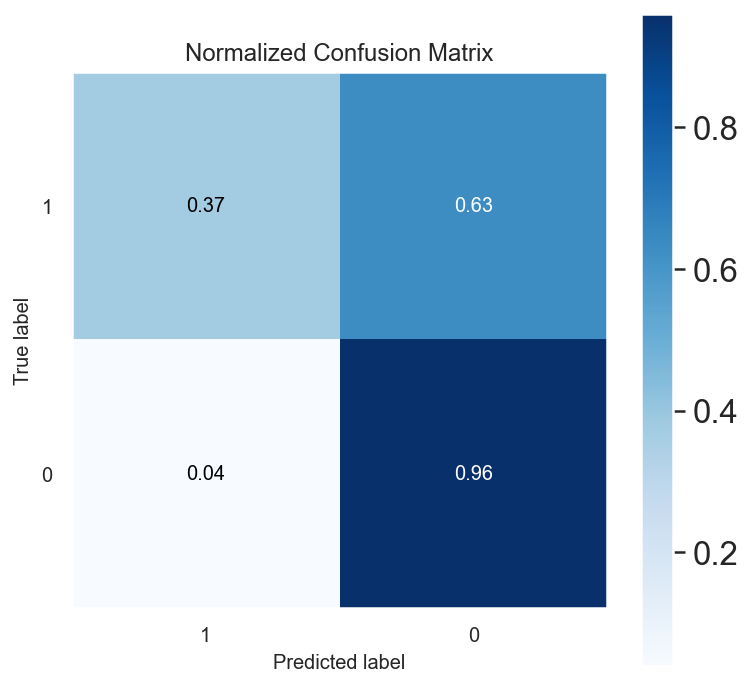

In [68]:
# Compute predictions and plot confusion matrix for test set
predictionsnb_test = naiveB.predict(X_test)

skplt.metrics.plot_confusion_matrix(y_test, predictionsnb_test, labels=[1, 0], figsize=(6,6), normalize='all')
plt.show()

In [69]:
print(classification_report(y_train, predictionsnb_train))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95     23499
           1       0.40      0.35      0.37      1889

    accuracy                           0.91     25388
   macro avg       0.68      0.65      0.66     25388
weighted avg       0.91      0.91      0.91     25388



In [70]:
print(classification_report(y_test, predictionsnb_test))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95     10071
           1       0.41      0.37      0.39       810

    accuracy                           0.91     10881
   macro avg       0.68      0.66      0.67     10881
weighted avg       0.91      0.91      0.91     10881



# Decision Tree Classifier

In [71]:
DTree = DecisionTreeClassifier()

# gridsearch params
dtc_params = {
              'max_depth': list(range(1, 13))+[None],
              'max_features': [None, 1, 2, 3],
              'min_samples_split': [2, 3, 4, 5, 10, 15, 20, 25, 30, 40, 50],
              'ccp_alpha': [0, 0.001, 0.005, 0.01]
             }

# set the gridsearch
dtc_gs = GridSearchCV(DTree, dtc_params, cv=5, verbose=1, n_jobs=-2)

# use the gridearch model to fit the data
dtc_gs.fit(X_train, y_train)
dtc_best = dtc_gs.best_estimator_
print("Best Params:", dtc_gs.best_params_)
print("Best Score:", dtc_gs.best_score_)
print("Training Score:",dtc_gs.score(X_train, y_train))
print("Test Score:", dtc_gs.score(X_test, y_test))

Fitting 5 folds for each of 2288 candidates, totalling 11440 fits
Best Params: {'ccp_alpha': 0, 'max_depth': 4, 'max_features': None, 'min_samples_split': 50}
Best Score: 0.9322513714166158
Training Score: 0.9348117220734206
Test Score: 0.9329105780718684


In [72]:
fi = pd.DataFrame({
    'feature': X.columns,
    'importance': dtc_best.feature_importances_
})

fi.sort_values('importance', ascending=False, inplace=True)
fi

feature  importance
3              duration    0.857369
32            month_mar    0.053082
0                   age    0.035944
35            month_oct    0.025754
25      contact_unknown    0.011220
16      marital_married    0.007265
2                   day    0.004809
19   education_tertiary    0.004558
4              campaign    0.000000
27            month_dec    0.000000
23             loan_yes    0.000000
24    contact_telephone    0.000000
26            month_aug    0.000000
28            month_feb    0.000000
21          default_yes    0.000000
29            month_jan    0.000000
30            month_jul    0.000000
31            month_jun    0.000000
33            month_may    0.000000
34            month_nov    0.000000
22          housing_yes    0.000000
20    education_unknown    0.000000
5       job_blue-collar    0.000000
1               balance    0.000000
17       marital_single    0.000000
15          job_unknown    0.000000
14       job_unemployed    0.000000
13       job_technician    0.000000
12          job_student    0.000000
11         job_services    0.000000
10    job_self-employed    0.000000
9           job_retired    0.000000
8        job_management    0.000000
7         job_housemaid    0.000000
6      job_entrepreneur    0.000000
18  education_secondary    0.000000

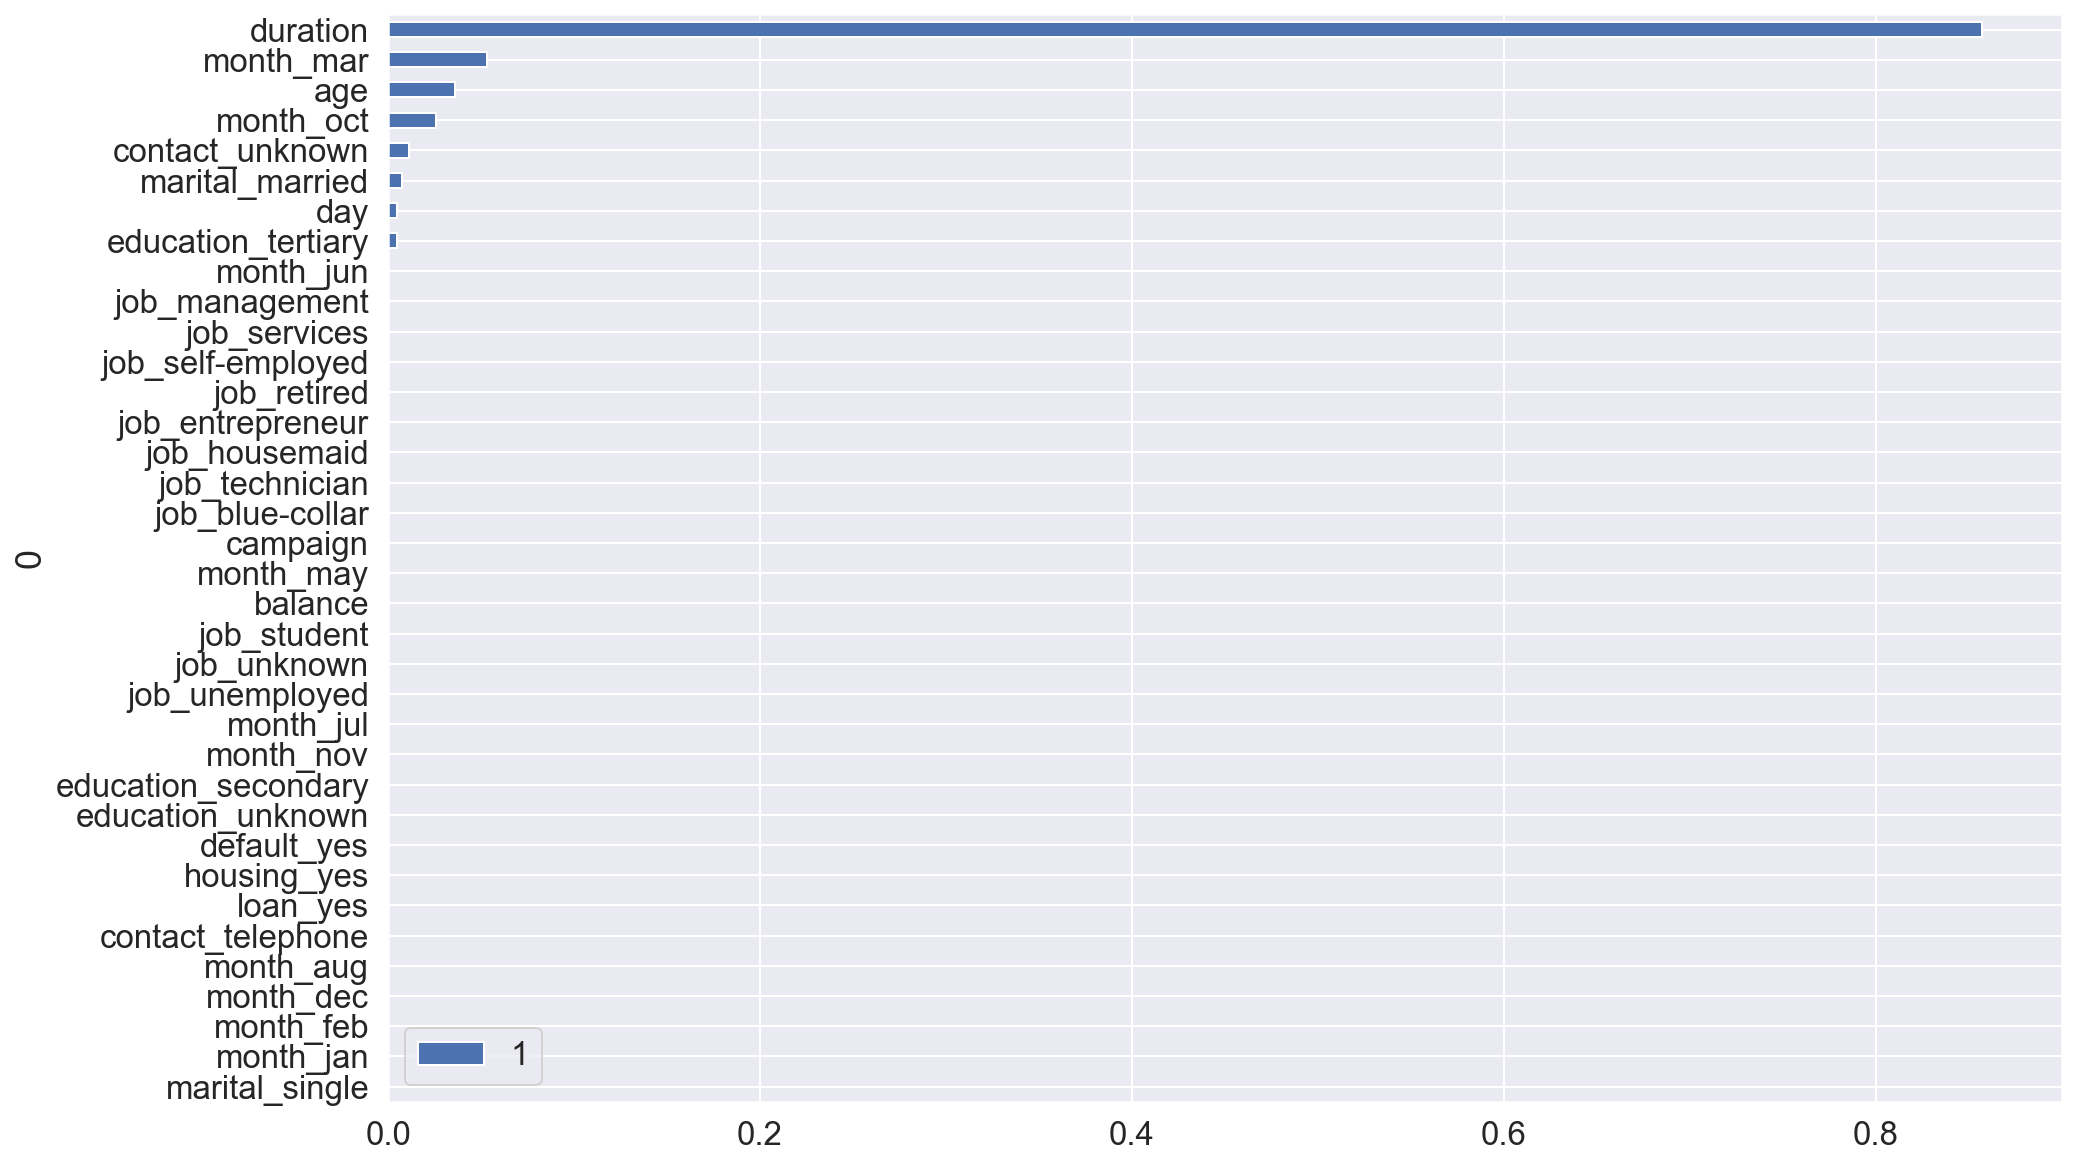

In [73]:
pd.DataFrame(list(zip(X_train.columns, dtc_best.feature_importances_))
            ).sort_values(by=1, ascending=True
                         ).plot(kind='barh', x=0, y=1, figsize=(15, 10))
plt.show()

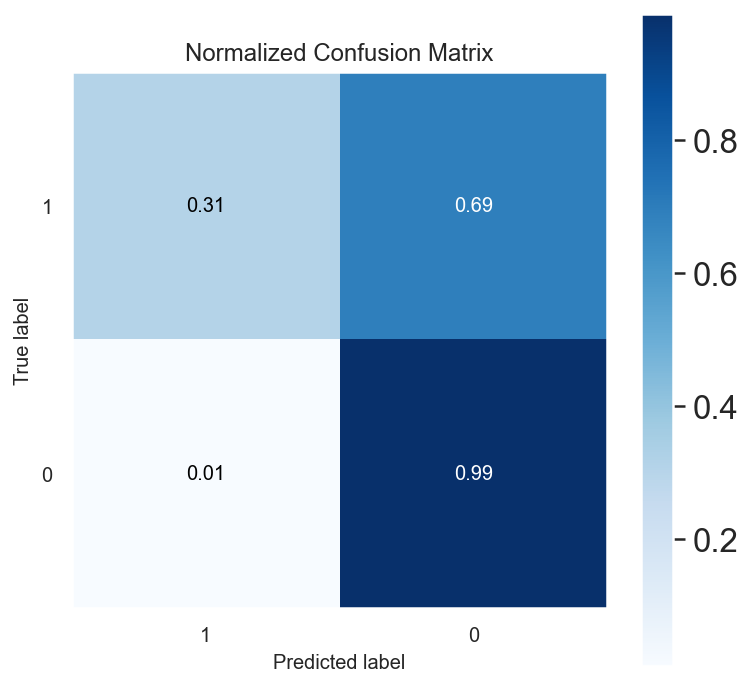

In [74]:
# Compute predictions and plot confusion matrix for training set
predictions_dtc_train = dtc_gs.predict(X_train)

skplt.metrics.plot_confusion_matrix(y_train, predictions_dtc_train, labels=[1, 0], figsize=(6,6), normalize='all')
plt.show()

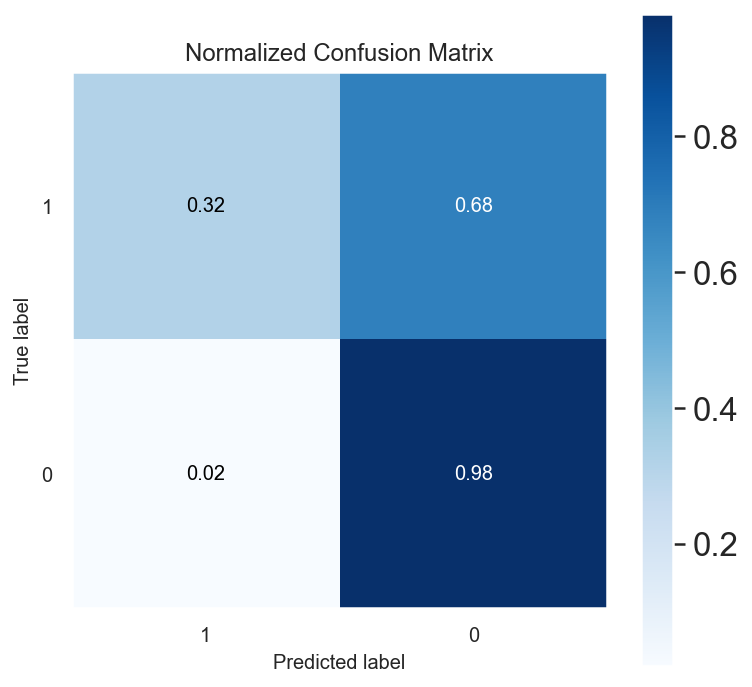

In [75]:
# Compute predictions and plot confusion matrix for test set
predictions_dtc_test = dtc_gs.predict(X_test)

skplt.metrics.plot_confusion_matrix(y_test, predictions_dtc_test, labels=[1, 0], figsize=(6,6), normalize='all')
plt.show()

In [76]:
print(classification_report(y_train, predictions_dtc_train))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     23499
           1       0.63      0.31      0.41      1889

    accuracy                           0.93     25388
   macro avg       0.79      0.65      0.69     25388
weighted avg       0.92      0.93      0.92     25388



In [77]:
print(classification_report(y_test, predictions_dtc_test))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96     10071
           1       0.59      0.32      0.42       810

    accuracy                           0.93     10881
   macro avg       0.77      0.65      0.69     10881
weighted avg       0.92      0.93      0.92     10881



# Decision Tree With AdaBoost

In [78]:
base_estimator = DecisionTreeClassifier(max_depth=5)

Adaboost = AdaBoostClassifier(base_estimator=base_estimator,
                           n_estimators=12,
                           random_state=1, algorithm='SAMME')
Adaboost.fit(X_train, y_train)

print(Adaboost.score(X_train, y_train))
print(cross_val_score(Adaboost, X_train, y_train, cv=5).mean())
print(Adaboost.score(X_test, y_test))

0.9363872695761777
0.9326056477392697
0.931072511717673


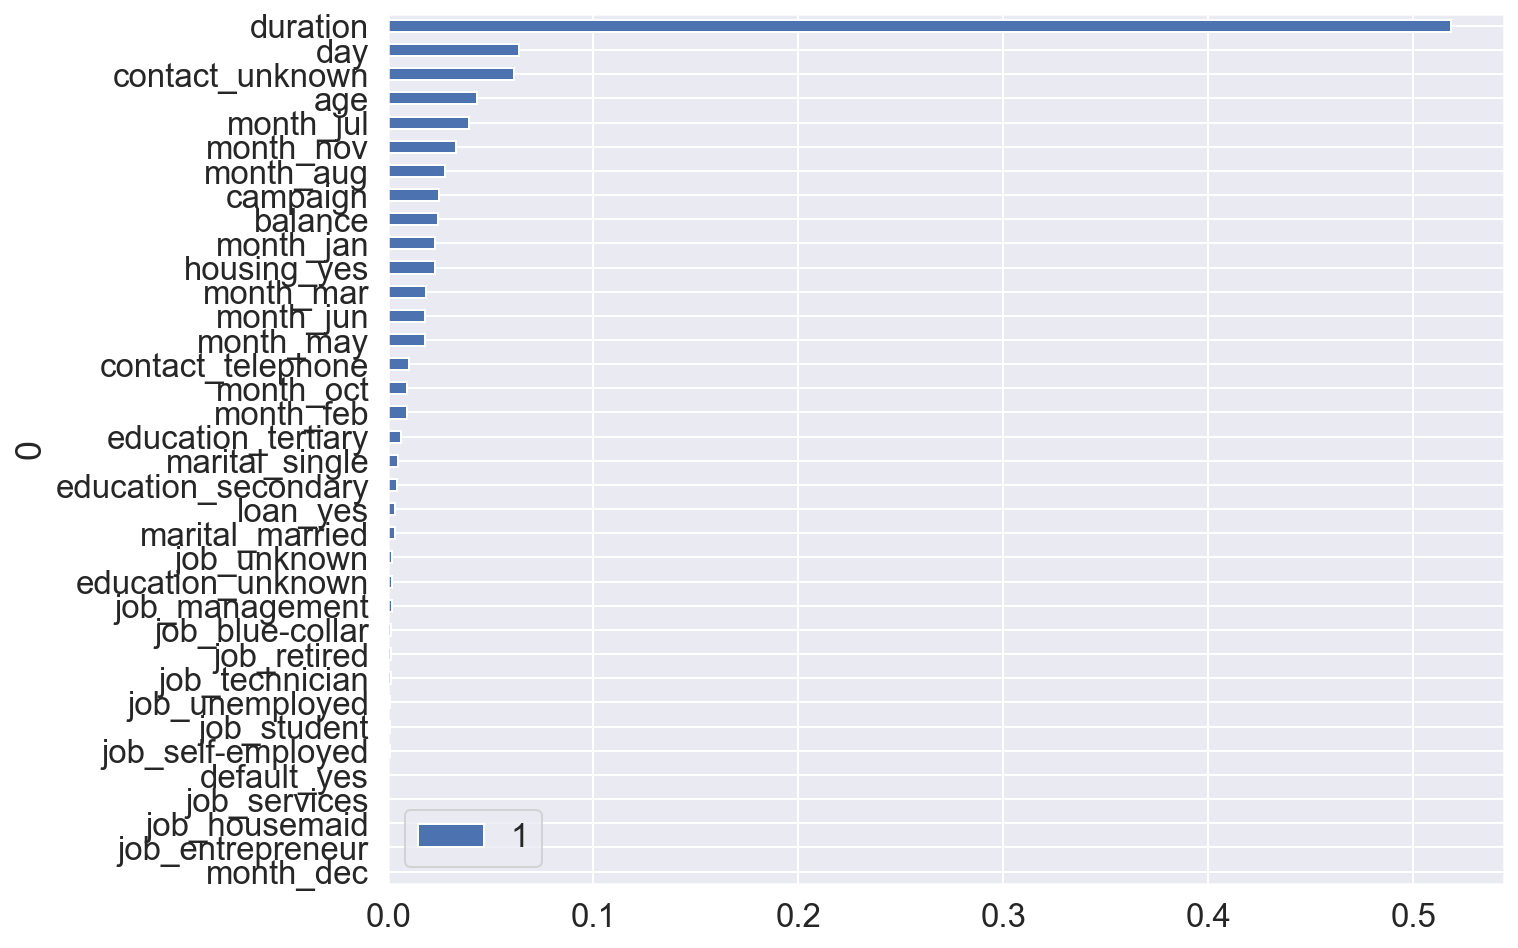

In [79]:
pd.DataFrame(list(zip(X_train.columns, Adaboost.feature_importances_))
            ).sort_values(by=1, ascending=True
                         ).plot(kind='barh', x=0, y=1, figsize=(10,8))
plt.show()

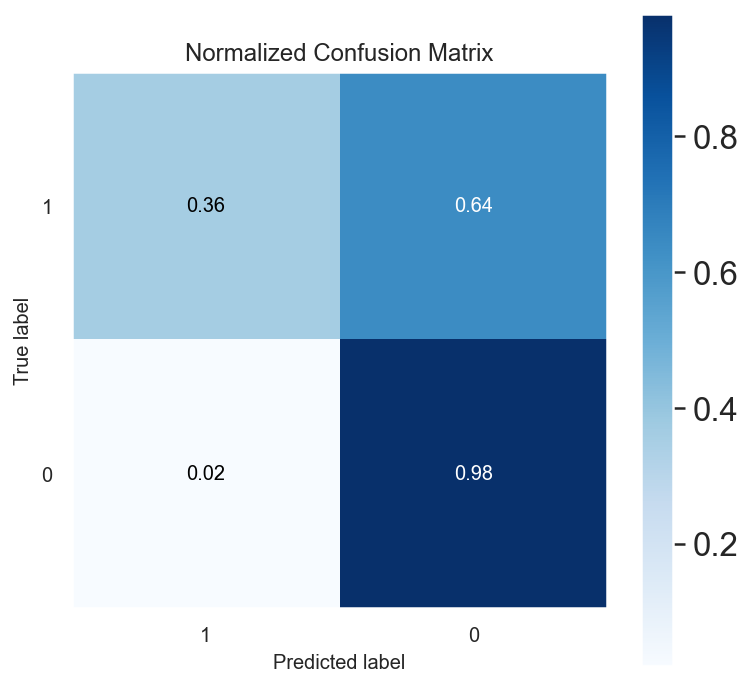

In [80]:
# Compute predictions and plot confusion matrix for training set
predictions_ab_train = Adaboost.predict(X_train)

skplt.metrics.plot_confusion_matrix(y_train, predictions_ab_train, labels=[1, 0], figsize=(6,6), normalize='all')
plt.show()

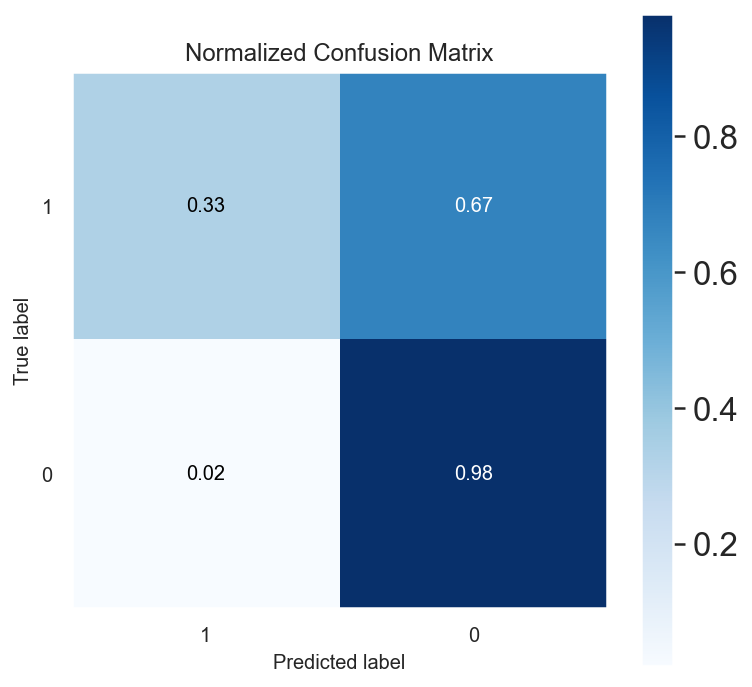

In [81]:
# Compute predictions and plot confusion matrix for test set
predictions_ab_test = Adaboost.predict(X_test)

skplt.metrics.plot_confusion_matrix(y_test, predictions_ab_test, labels=[1, 0], figsize=(6,6), normalize='all')
plt.show()

In [82]:
print(classification_report(y_train, predictions_ab_train))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     23499
           1       0.63      0.36      0.46      1889

    accuracy                           0.94     25388
   macro avg       0.79      0.67      0.71     25388
weighted avg       0.93      0.94      0.93     25388



In [83]:
print(classification_report(y_test, predictions_ab_test))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96     10071
           1       0.56      0.33      0.42       810

    accuracy                           0.93     10881
   macro avg       0.76      0.66      0.69     10881
weighted avg       0.92      0.93      0.92     10881



# Decision Tree With Gradient Boosting

In [84]:
base_estimator = DecisionTreeClassifier(max_depth=5)

Gboost = GradientBoostingClassifier(n_estimators=10,
                           random_state=1, init=base_estimator)
Gboost.fit(X_train, y_train)

print(Gboost.score(X_train, y_train))
print(cross_val_score(Gboost, X_train, y_train, cv=5).mean())
print(Gboost.score(X_test, y_test))

0.9378052623286592
0.9331571855652181
0.9336458046135465


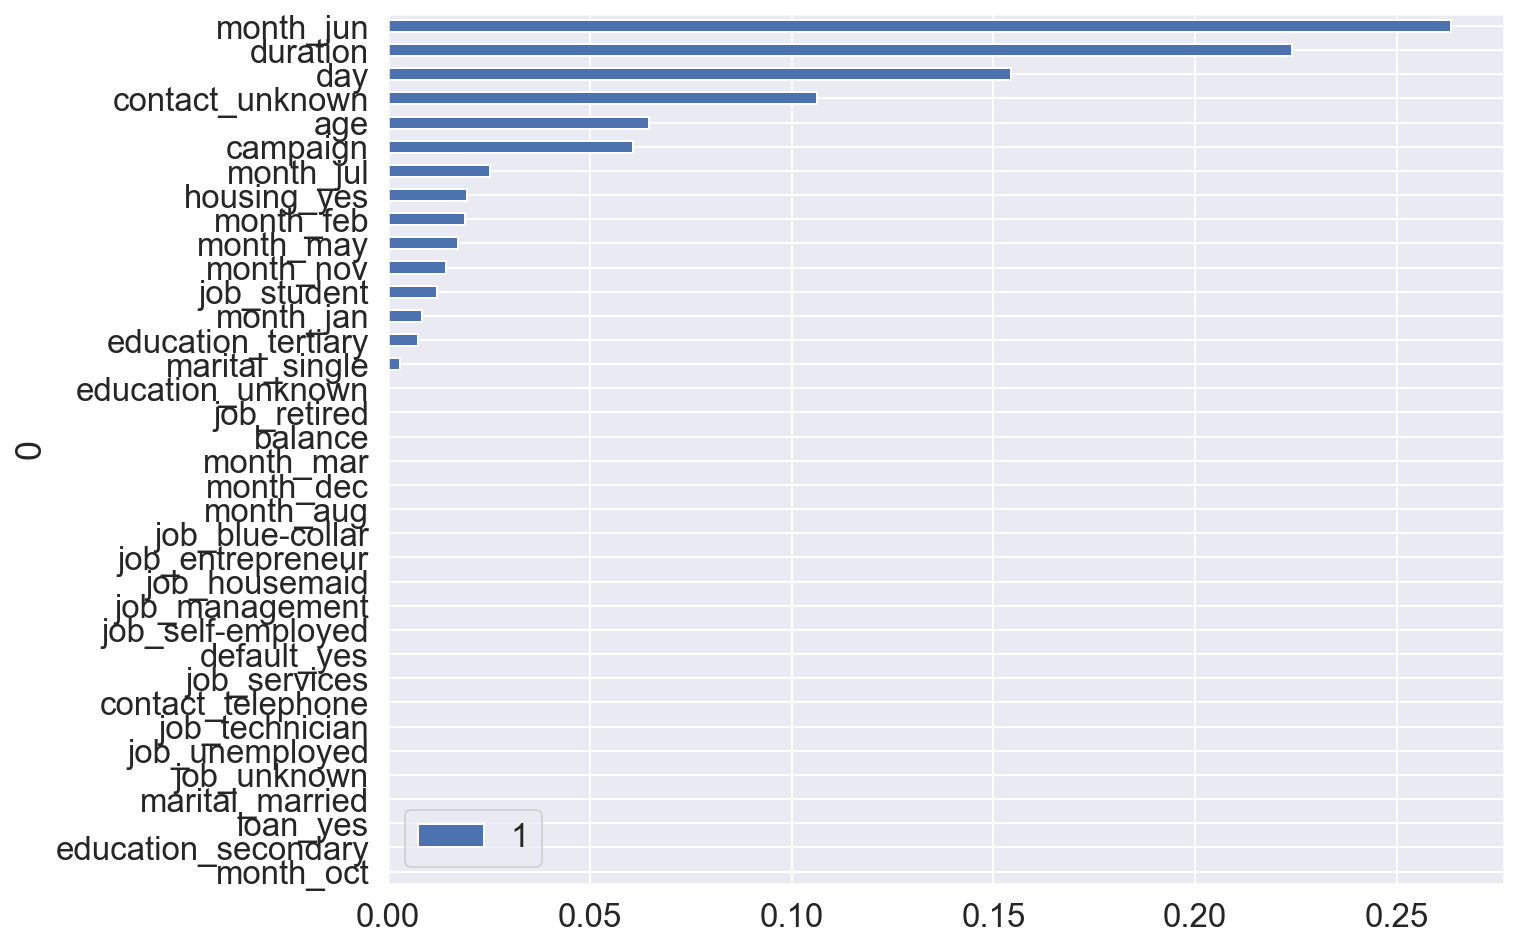

In [85]:
pd.DataFrame(list(zip(X_train.columns, Gboost.feature_importances_))
            ).sort_values(by=1, ascending=True
                         ).plot(kind='barh', x=0, y=1, figsize=(10,8))
plt.show()

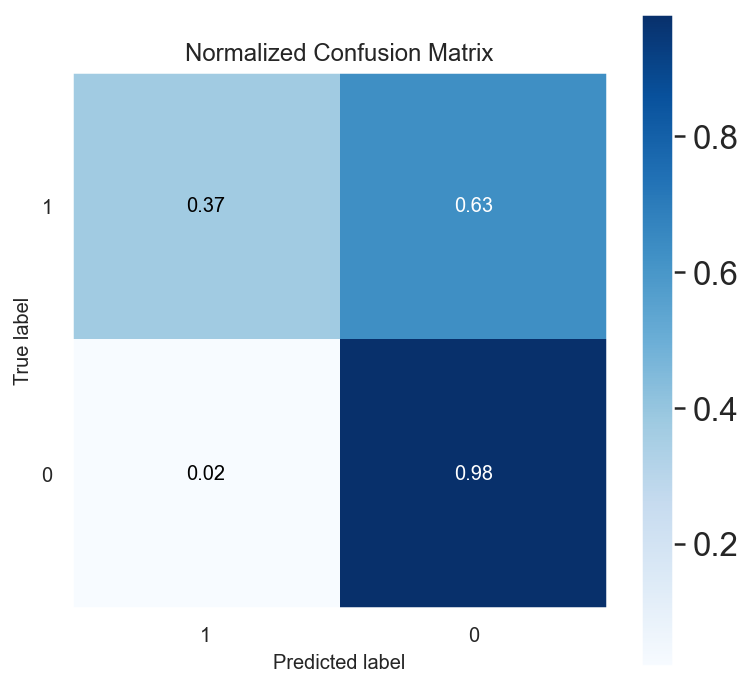

In [86]:
# Compute predictions and plot confusion matrix for training set
predictions_gb_train = Gboost.predict(X_train)

skplt.metrics.plot_confusion_matrix(y_train, predictions_gb_train, labels=[1, 0], figsize=(6,6), normalize='all')
plt.show()

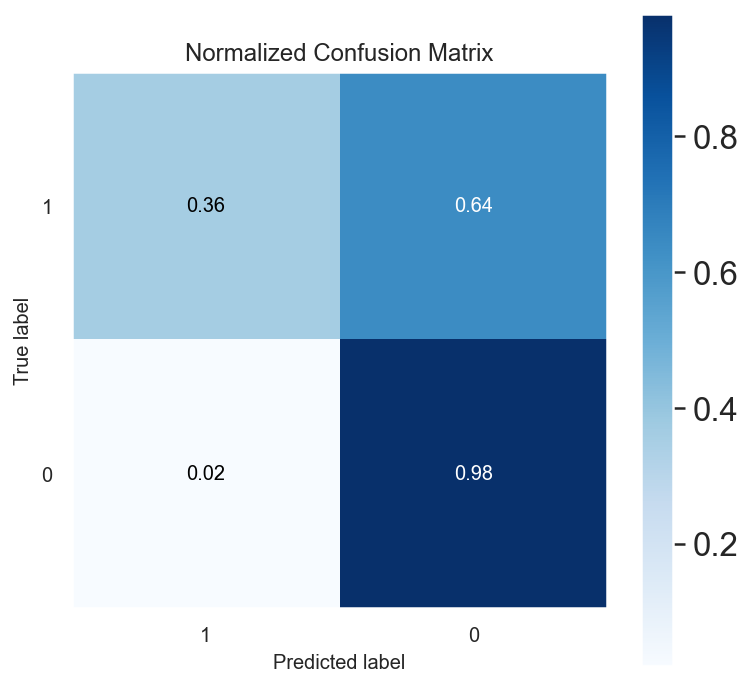

In [87]:
# Compute predictions and plot confusion matrix for test set
predictions_gb_test = Gboost.predict(X_test)

skplt.metrics.plot_confusion_matrix(y_test, predictions_gb_test, labels=[1, 0], figsize=(6,6), normalize='all')
plt.show()

In [88]:
print(classification_report(y_train, predictions_gb_train))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     23499
           1       0.64      0.37      0.47      1889

    accuracy                           0.94     25388
   macro avg       0.80      0.68      0.72     25388
weighted avg       0.93      0.94      0.93     25388



In [89]:
print(classification_report(y_test, predictions_gb_test))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96     10071
           1       0.59      0.36      0.45       810

    accuracy                           0.93     10881
   macro avg       0.77      0.67      0.71     10881
weighted avg       0.92      0.93      0.93     10881



# Random Forest Model

In [90]:
RF = RandomForestClassifier()

In [91]:
def do_cross_val(RF, X_train, y_train, cv=5):
    scores = cross_val_score(RF, X_train, y_train, cv=cv, n_jobs=1,
                             scoring='neg_mean_squared_error')
    # , scores.std()#, cross_val_score(model, X, y, cv=cv, n_jobs=1).mean()
    return -scores.mean()

values = sorted(
    list(set(np.logspace(0, 3, num=20, endpoint=True, base=10.0).astype(int))))

In [92]:
# Grid Search
params = {'max_depth': [1, 2, 3, 4, 5, 6, 10, 20],
          # , 'max_features':[1,2,3,4],
          'max_leaf_nodes': [5, 6, 7, 8, 9, 10, 20],
          'min_samples_leaf': [1, 2, 3, 4,10]
          # 'min_samples_split':[1,2,3,4]
          }

rf = GridSearchCV(RF, param_grid=params, cv=5)
rf.fit(X_train, y_train)

RF_best = rf.best_estimator_
print(rf.best_estimator_)
print('Training: ', rf.score(X_train, y_train))
print('CV training: ', rf.best_score_)
print('Test: ', rf.score(X_test, y_test))

RandomForestClassifier(max_depth=20, max_leaf_nodes=20)
Training:  0.9257129352449976
CV training:  0.9257129298988567
Test:  0.9255583126550868


In [93]:
fi = pd.DataFrame({
    'feature': X.columns,
    'importance': RF_best.feature_importances_
})

fi.sort_values('importance', ascending=False, inplace=True)
fi

feature  importance
3              duration    0.691772
32            month_mar    0.064093
0                   age    0.047896
2                   day    0.036184
25      contact_unknown    0.028468
35            month_oct    0.025910
1               balance    0.017302
31            month_jun    0.015350
22          housing_yes    0.009931
4              campaign    0.008560
30            month_jul    0.006762
16      marital_married    0.006248
19   education_tertiary    0.006053
12          job_student    0.005096
17       marital_single    0.004744
28            month_feb    0.004522
26            month_aug    0.004144
33            month_may    0.003158
34            month_nov    0.002087
29            month_jan    0.001893
9           job_retired    0.001611
24    contact_telephone    0.001199
20    education_unknown    0.001179
5       job_blue-collar    0.001097
23             loan_yes    0.000910
18  education_secondary    0.000817
8        job_management    0.000740
11         job_services    0.000629
7         job_housemaid    0.000500
14       job_unemployed    0.000329
21          default_yes    0.000309
27            month_dec    0.000239
10    job_self-employed    0.000142
13       job_technician    0.000127
15          job_unknown    0.000000
6      job_entrepreneur    0.000000

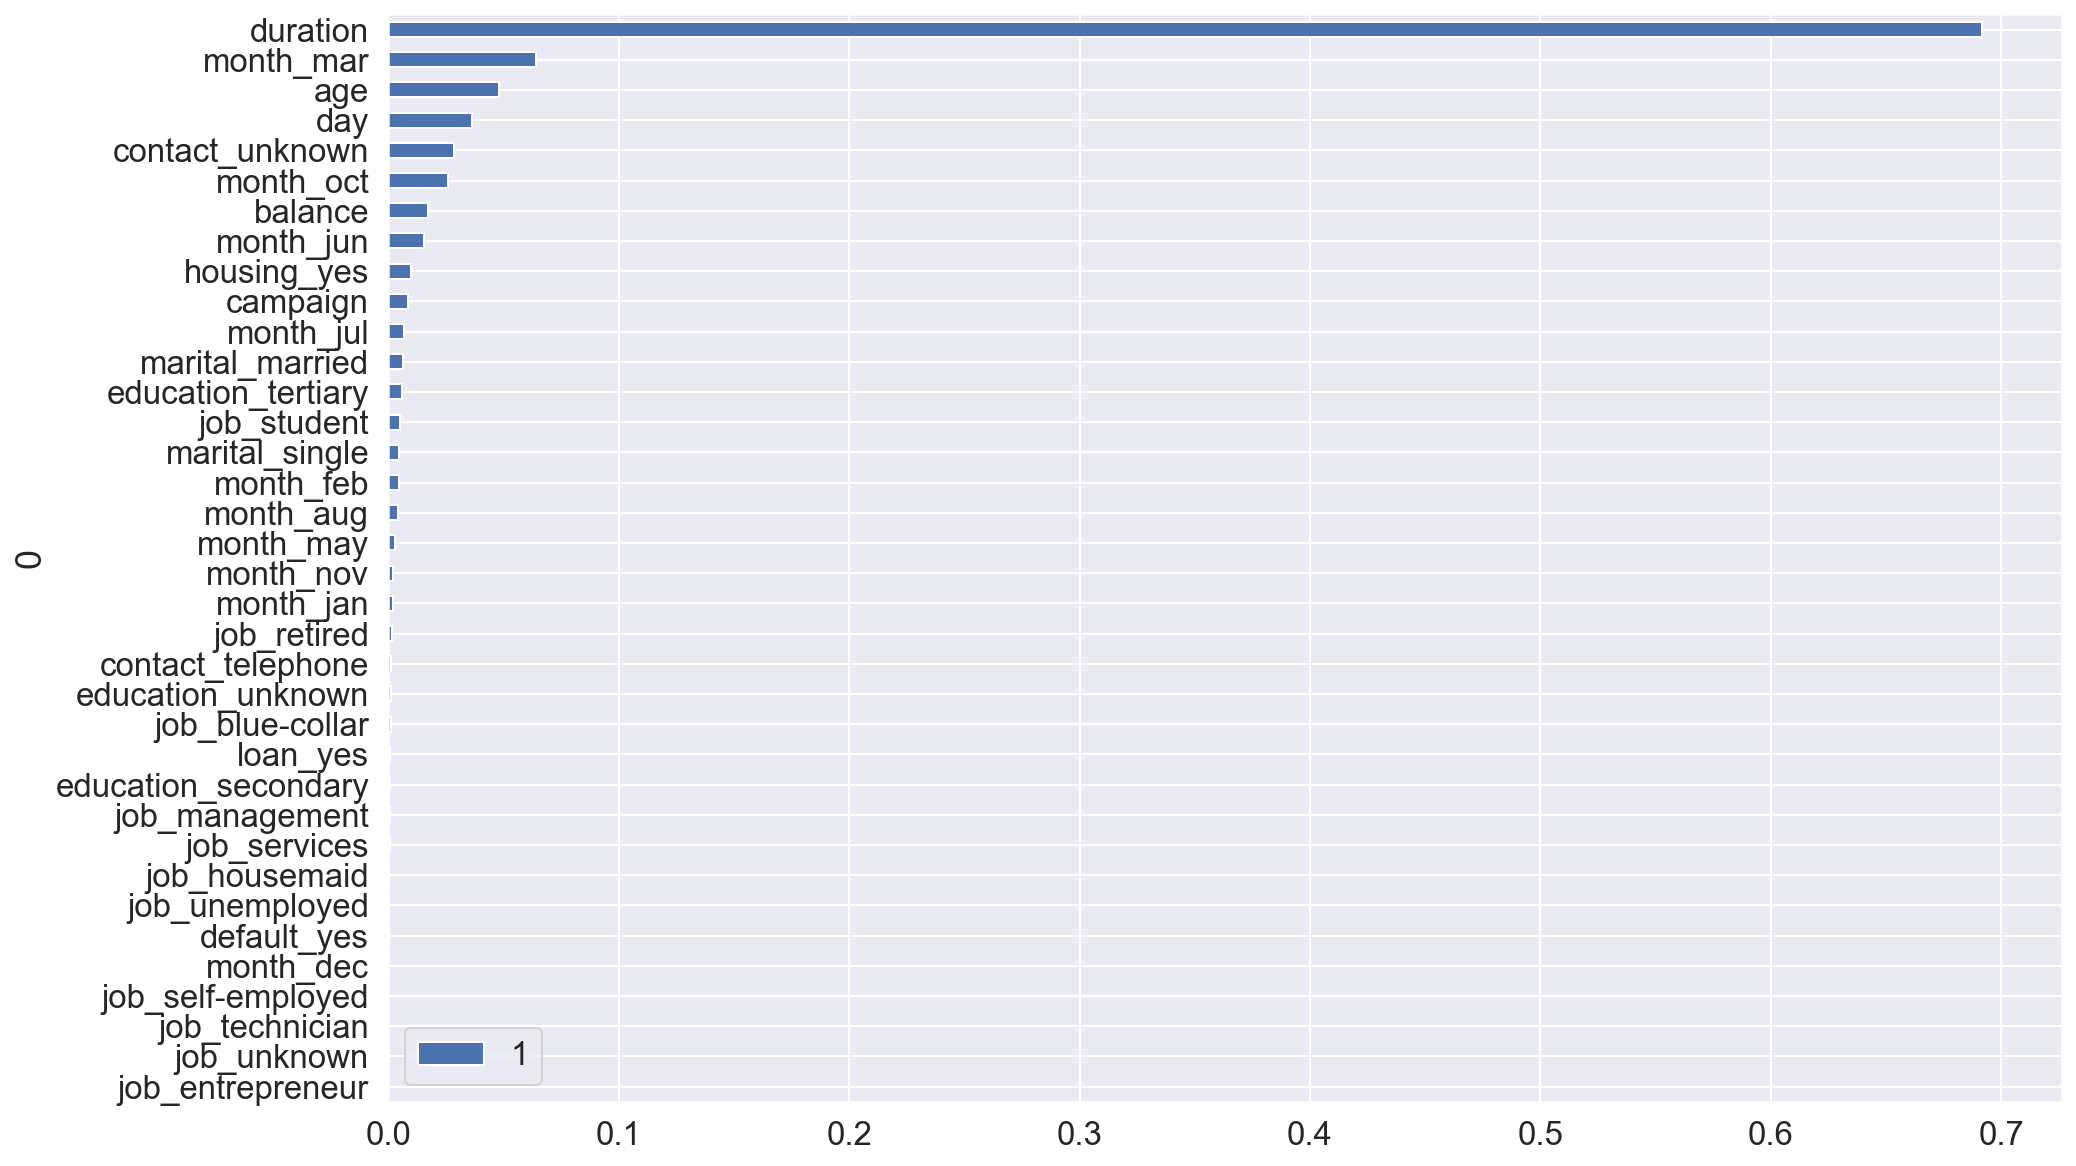

In [94]:
pd.DataFrame(list(zip(X_train.columns, RF_best.feature_importances_))
            ).sort_values(by=1, ascending=True
                         ).plot(kind='barh', x=0, y=1, figsize=(15, 10))
plt.show()

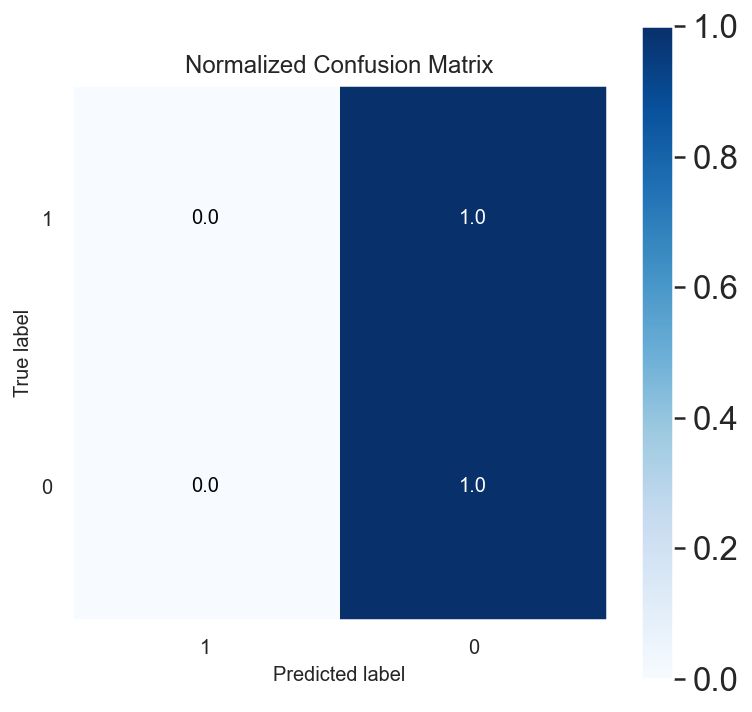

In [95]:
# Compute predictions and plot confusion matrix for training set
predictions_rf_train = rf.predict(X_train)

skplt.metrics.plot_confusion_matrix(y_train, predictions_rf_train, labels=[1, 0], figsize=(6,6), normalize='all')
plt.show()

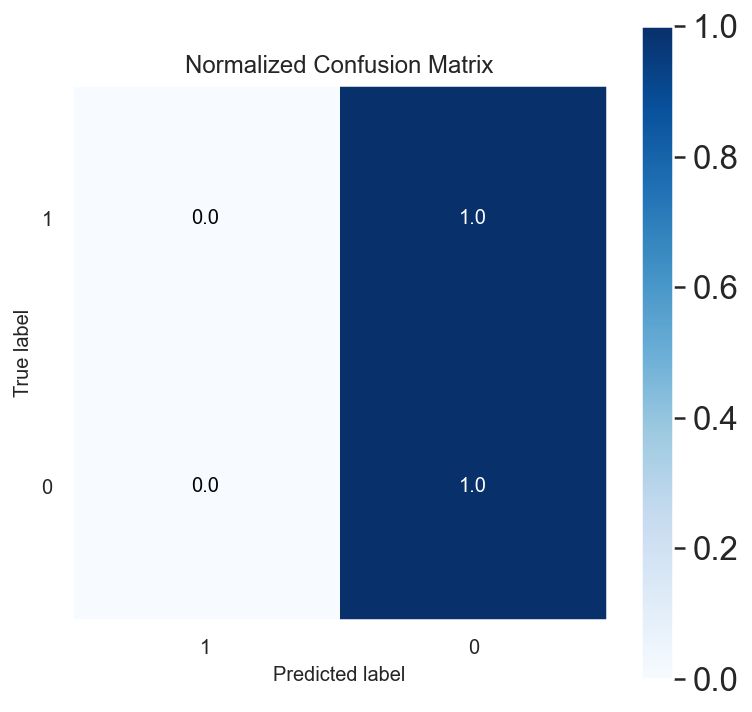

In [96]:
# Compute predictions and plot confusion matrix for test set
predictions_rf_test = rf.predict(X_test)

skplt.metrics.plot_confusion_matrix(y_test, predictions_rf_test, labels=[1, 0], figsize=(6,6), normalize='all')
plt.show()

In [97]:
print(classification_report(y_train, predictions_rf_train))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     23499
           1       1.00      0.00      0.00      1889

    accuracy                           0.93     25388
   macro avg       0.96      0.50      0.48     25388
weighted avg       0.93      0.93      0.89     25388



In [98]:
print(classification_report(y_test, predictions_rf_test))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     10071
           1       0.00      0.00      0.00       810

    accuracy                           0.93     10881
   macro avg       0.46      0.50      0.48     10881
weighted avg       0.86      0.93      0.89     10881



C:\Users\verph\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\verph\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\verph\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Summary of Results

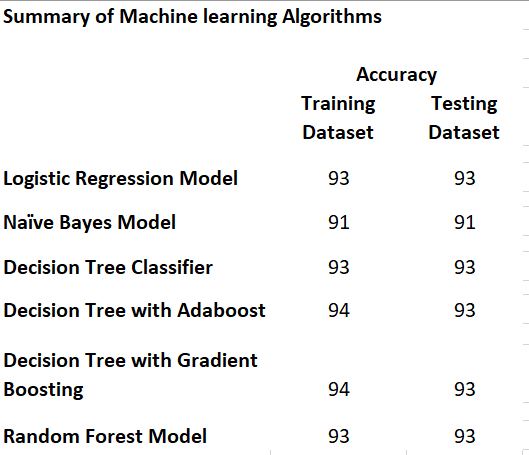

From the table above, we can see that the models all perform well, giving accuracy scores above 90% in all cases. Good performance is achieved both on the training and the test sets.

However, as the dataset is imbalanced with 93% in the majority class and 7% in the minority class, this performance is misleading as accuracy is simply predicting the negative class all the time, achieving a score that naively looks good, but in practice is meaningless in predicting the minority class.

To overcome this, I have explored other popular methods used to deal with imbalanced datasets. These are outlined below.


# Implications of Imbalanced dataset

Prediction accuracy is the most common metric for classification tasks, although it is inappropriate and potentially dangerously misleading when used on imbalanced classification tasks.

The reason for this is because if 98 percent of the data belongs to the negative class, you can achieve 98 percent accuracy on average by simply predicting the negative class all the time, achieving a score that naively looks good, but in practice is meaningless in predicting the minority class.

To overcome this, alternate techniques must be adopted.

Three popular methods used to deal with imbalanced datasets areas follows:
* 1.Undersampling of the majority class
* 2.Oversampling of the minority class
* 3.SMOTE
* 4.XGBoost


These four methods will be looked at in this project.



# 1. Undersampling of the Majority Class

One way of dealing with imblanced data set is to undersample the majority class in the training dataset.
 
A simple approach to using standard machine learning algorithms on an imbalanced dataset is to change the training dataset to have a more balanced class distribution.

This can be achieved by deleting examples from the majority class, referred to as “undersampling.” A possible downside is that examples from the majority class that are helpful during modeling may be deleted.




In [99]:
## Get the Deposit and the No deposit dataset 

deposit = term_deposit[term_deposit['y']==1]

no_deposit = term_deposit[term_deposit['y']==0]

In [100]:
print(deposit.shape, no_deposit.shape)

(2699, 14) (33570, 14)


In [101]:
## Get the Deposit and the No deposit dataset for training data
deposit = y_train[y_train==1]
no_deposit = y_train[y_train==0]
print(deposit.shape, no_deposit.shape)


(1889,) (23499,)


The data above shows that the training data set has 2027 - deposit (minority class) and 25973 - no deposit (majority class).
When undersampling of the majority class is implemented, the majority class will be reduced 2027, a total of 4054 rows with a 50:50 ratio between the minority and the majority class.


In [102]:
# Implementing Undersampling for Handling Imbalanced on the traing data

nm = NearMiss(version=1)
X_trainres, y_trainres = nm.fit_resample(X_train, y_train)

In [103]:
#Shape of re-sampled dataset.
X_trainres.shape, y_trainres.shape

((3778, 36), (3778,))

In [104]:
#Show shape of original and resampled dataset

print('Original dataset shape {}'.format(Counter(y_train)))
print('Resampled dataset shape {}'.format(Counter(y_trainres)))

Original dataset shape Counter({0: 23499, 1: 1889})
Resampled dataset shape Counter({0: 1889, 1: 1889})


We now have a balanced data set which we will use in the modelling process. The test data will remain unchanged.


# Logistic Regression Model

In [105]:
model = LogisticRegression(max_iter=100000)

# setup the grid search
params = {'C': np.logspace(-4, 2, 10),
          'solver': ['liblinear'],
          'penalty': ['l2'],
          'fit_intercept': [True, False]}

lr_gs = GridSearchCV(estimator=model,
                  param_grid=params,
                  cv=5,
                  scoring='accuracy',
                  return_train_score=True,
                  n_jobs=-2)

lr_gs.fit(X_trainres, y_trainres)

# extract the grid search results
print('Best Parameters:')
print(lr_gs.best_params_)
print('Best estimator C:')
print(lr_gs.best_estimator_.C)
print('Best estimator mean cross validated training score:')
print(lr_gs.best_score_)
print('Best estimator score on the full training set:')
print(lr_gs.score(X_trainres, y_trainres))
print('Best estimator score on the test set:')
print(lr_gs.score(X_test, y_test))


Best Parameters:
{'C': 21.54434690031882, 'fit_intercept': True, 'penalty': 'l2', 'solver': 'liblinear'}
Best estimator C:
21.54434690031882
Best estimator mean cross validated training score:
0.8282150741091139
Best estimator score on the full training set:
0.8324510322922181
Best estimator score on the test set:
0.5831265508684863


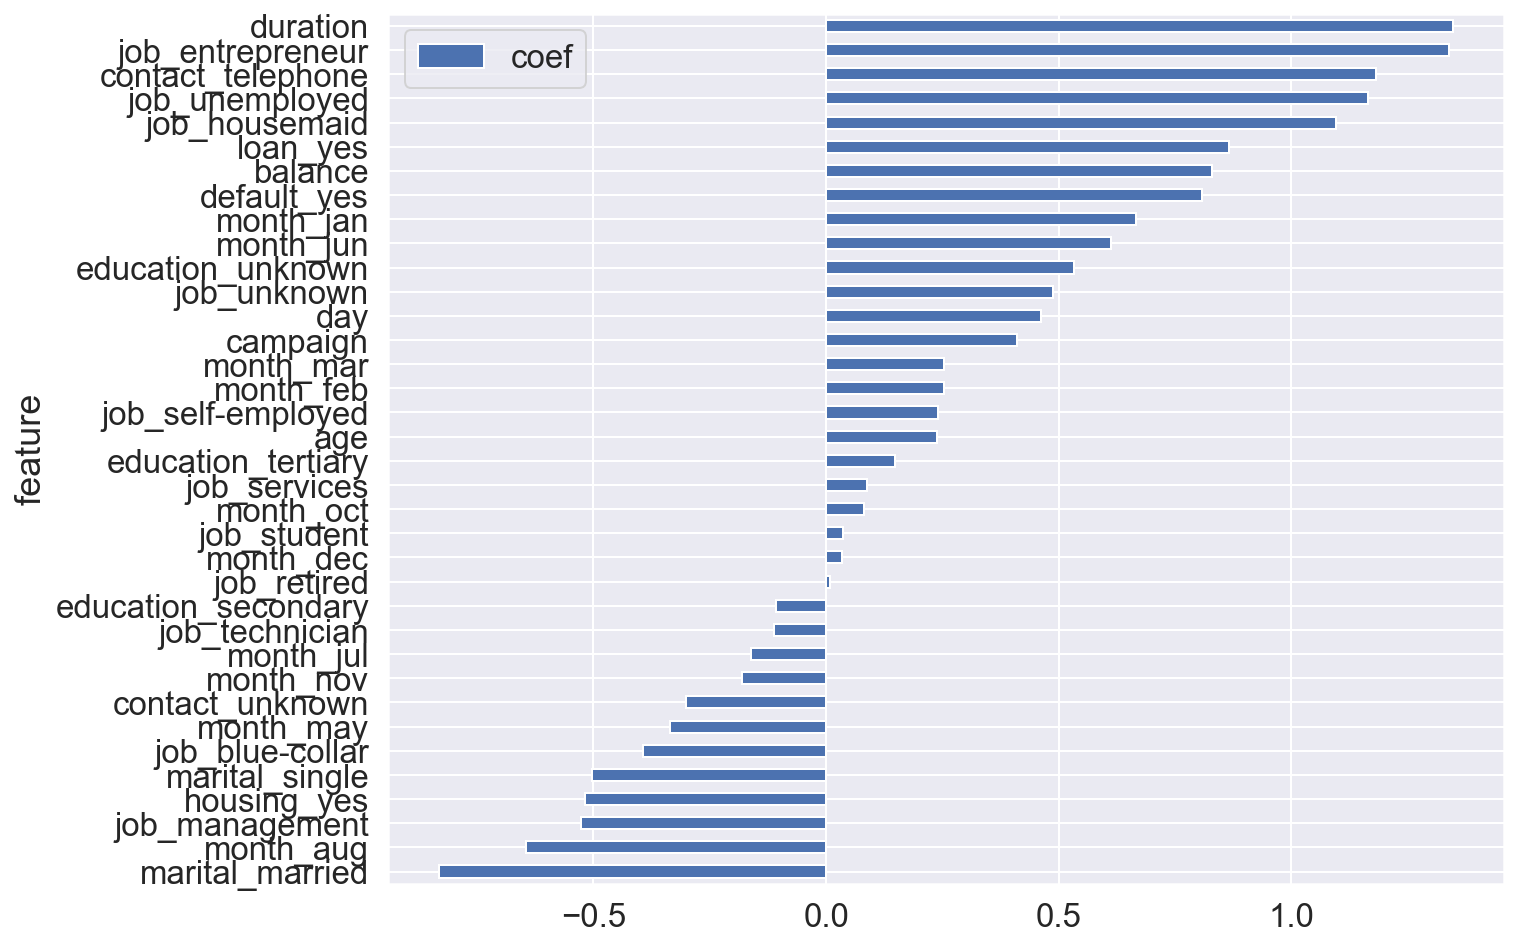

In [106]:
pd.DataFrame(list(zip(X_train.columns, lr_gs.best_estimator_.coef_[0])), columns=['feature', 'coef']
            ).sort_values(by='coef'
                         ).plot(kind='barh', x='feature', y='coef', figsize=(10, 8))
plt.show()

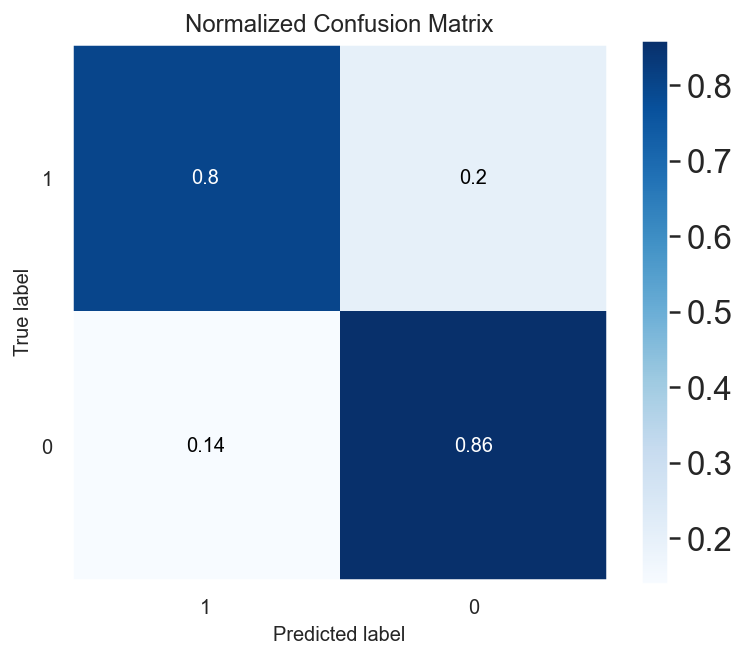

In [107]:
# Compute predictions and plot confusion matrix
predictions_train = lr_gs.predict(X_trainres)

skplt.metrics.plot_confusion_matrix(y_trainres, predictions_train, labels=[1, 0], figsize=(6,5), normalize='all')
plt.show()

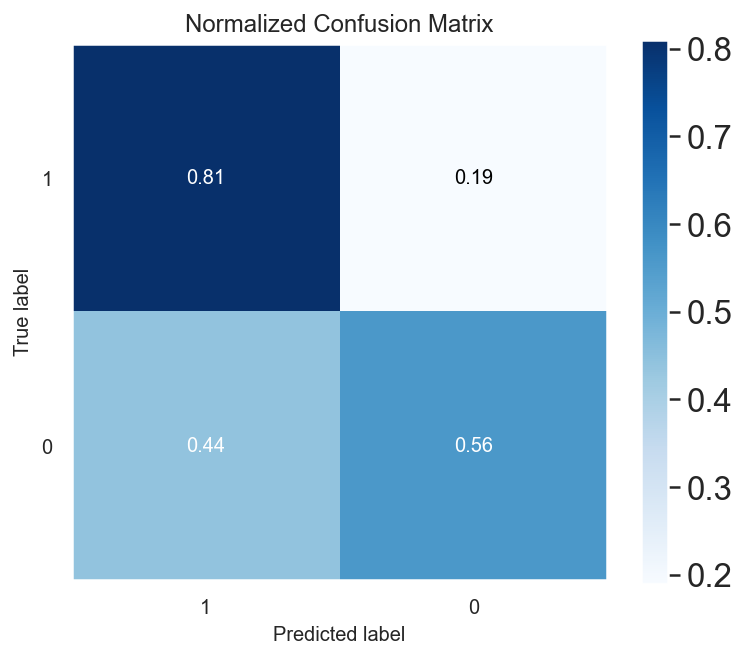

In [108]:
# Compute predictions and plot confusion matrix
predictions_test = lr_gs.predict(X_test)

skplt.metrics.plot_confusion_matrix(y_test, predictions_test, labels=[1, 0], figsize=(6,5), normalize='all')
plt.show()

In [109]:
print(classification_report(y_trainres, predictions_train))

              precision    recall  f1-score   support

           0       0.81      0.86      0.84      1889
           1       0.86      0.80      0.83      1889

    accuracy                           0.83      3778
   macro avg       0.83      0.83      0.83      3778
weighted avg       0.83      0.83      0.83      3778



In [110]:
print(classification_report(y_test, predictions_test))

              precision    recall  f1-score   support

           0       0.97      0.56      0.71     10071
           1       0.13      0.81      0.23       810

    accuracy                           0.58     10881
   macro avg       0.55      0.69      0.47     10881
weighted avg       0.91      0.58      0.68     10881



# Naive Bayes Model

In [111]:
naiveB1 = GaussianNB() 

In [112]:
# fit model

naiveB1.fit(X_trainres, y_trainres)

print(naiveB1.score(X_trainres, y_trainres))
print(cross_val_score(naiveB1, X_trainres, y_trainres, cv=5).mean())
print(naiveB1.score(X_test, y_test))

0.6257278983589201
0.6236104979151337
0.7023251539380572


# Decision Tree Model

In [113]:
DTree = DecisionTreeClassifier()

# gridsearch params
dtc1_params = {
              'max_depth': list(range(1, 13))+[None],
              'max_features': [None, 1, 2, 3],
              'min_samples_split': [2, 3, 4, 5, 10, 15, 20, 25, 30, 40, 50],
              'ccp_alpha': [0, 0.001, 0.005, 0.01]
             }

# set the gridsearch
dtc_gs1 = GridSearchCV(DTree, dtc1_params, cv=5, verbose=1, n_jobs=-2)

# use the gridearch model to fit the data
dtc_gs1.fit(X_trainres, y_trainres)
dtc_best1 = dtc_gs1.best_estimator_
print("Best Params:", dtc_gs1.best_params_)
print("Best Score:", dtc_gs1.best_score_)
print("Training Score:",dtc_gs1.score(X_trainres, y_trainres))
print("Test Score:", dtc_gs1.score(X_test, y_test))

Fitting 5 folds for each of 2288 candidates, totalling 11440 fits
Best Params: {'ccp_alpha': 0.001, 'max_depth': None, 'max_features': 3, 'min_samples_split': 15}
Best Score: 0.7776600441501105
Training Score: 0.7953943885653785
Test Score: 0.5917654627332046


# Decision Tree with Adaboost

In [114]:
base_estimator = DecisionTreeClassifier(max_depth=9)
Adaboost = AdaBoostClassifier(base_estimator=base_estimator,
                           n_estimators=10,
                           random_state=1, algorithm='SAMME')
Adaboost.fit(X_trainres, y_trainres)

print(Adaboost.score(X_trainres, y_trainres))
print(cross_val_score(Adaboost, X_trainres, y_trainres, cv=5).mean())
print(Adaboost.score(X_test, y_test))

0.9917946003176283
0.7723686884614036
0.635051925374506


# Decision Tree with Gradient Boosting

In [115]:
base_estimator = DecisionTreeClassifier(max_depth=9)
Gboost1 = GradientBoostingClassifier(n_estimators=10,
                           random_state=1, init=base_estimator)
Gboost1.fit(X_trainres, y_trainres)

print(Gboost1.score(X_trainres, y_trainres))
print(cross_val_score(Gboost1, X_trainres, y_trainres, cv=5).mean())
print(Gboost1.score(X_test, y_test))

0.880359978824775
0.7662829811836434
0.6129032258064516


# Random Forest Model

In [116]:
RF1 = RandomForestClassifier()

def do_cross_val(RF1, X_trainres, y_trainres, cv=5):
    scores = cross_val_score(RF1, X_trainres, y_trainres, cv=cv, n_jobs=1,
                             scoring='neg_mean_squared_error')
    # , scores.std()#, cross_val_score(model, X, y, cv=cv, n_jobs=1).mean()
    return -scores.mean()

values = sorted(
    list(set(np.logspace(0, 3, num=20, endpoint=True, base=10.0).astype(int))))

In [117]:
# Grid Search
params = {'max_depth': [1, 2, 3, 4, 5, 6, 10, 20],
          # , 'max_features':[1,2,3,4],
          'max_leaf_nodes': [5, 6, 7, 8, 9, 10, 20],
          'min_samples_leaf': [1, 2, 3, 4,10]
          # 'min_samples_split':[1,2,3,4]
          }

rf = GridSearchCV(RF1, param_grid=params, cv=5)
rf.fit(X_trainres, y_trainres)

RF1_best = rf.best_estimator_
print(rf.best_estimator_)
print('Training: ', rf.score(X_trainres, y_trainres))
print('CV training: ', rf.best_score_)
print('Test: ', rf.score(X_test, y_test))

RandomForestClassifier(max_depth=10, max_leaf_nodes=20, min_samples_leaf=10)
Training:  0.8279512969825304
CV training:  0.8102211009495777
Test:  0.5575774285451705


# Summary of results - Undersampling the Majority Class

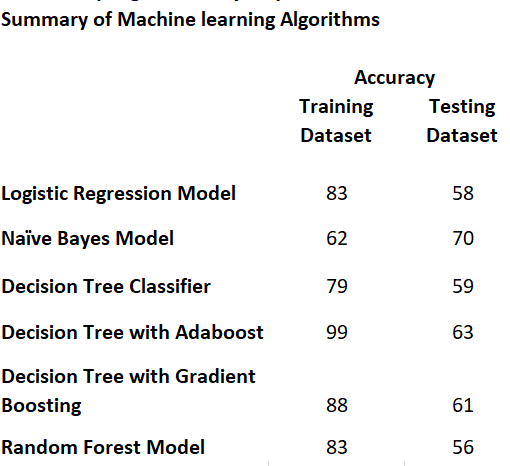


From the table above, we can see that all models achieved less than 81% on the testing data set with the Naive Bayes classifier achieving the best performance of 70%. This is lower than the target of 81% and so the other methods for dealing with imbalanced datasets will be looked at to obtain better performance measures based on the chosen metrics.



# 2.Oversampling of the minority class

One way of dealing with imblanced data set is to undersample the majority class in the training dataset.
 
A simple approach to using standard machine learning algorithms on an imbalanced dataset is to change the training dataset to have a more balanced class distribution.

This can be achieved by deleting examples from the majority class, referred to as “undersampling.” A possible downside is that examples from the majority class that are helpful during modeling may be deleted.



In [118]:
## Get the Deposit and the No deposit dataset 

deposit = term_deposit[term_deposit['y']==1]
no_deposit = term_deposit[term_deposit['y']==0]

print(deposit.shape, no_deposit.shape)

(2699, 14) (33570, 14)


In [119]:
## Get the Deposit and the No deposit dataset for training data
deposit = y_train[y_train==1]
no_deposit = y_train[y_train==0]
print(deposit.shape, no_deposit.shape)


(1889,) (23499,)


The data above shows that the training data set has 2027 - deposit (minority class) and 25973 - no deposit (majority class).
When oversampling of the minority class is implemented, the minority class will be increased from 2027, a total of 25973 rows with a 1:1 ratio between the minority and the majority class.

In [120]:
## RandomOverSampler to handle imbalanced data
os =  RandomOverSampler(sampling_strategy='minority')
X_train_os, y_train_os = os.fit_resample(X_train, y_train)


In [121]:
#Shape of re-sampled dataset.
X_train_os.shape, y_train_os.shape

((46998, 36), (46998,))

In [122]:
#Show shape of original and resampled dataset

print('Original dataset shape {}'.format(Counter(y_train)))
print('Resampled dataset shape {}'.format(Counter(y_train_os)))

Original dataset shape Counter({0: 23499, 1: 1889})
Resampled dataset shape Counter({0: 23499, 1: 23499})


# Logistic Regression Model

In [123]:
model = LogisticRegression(max_iter=100000)

# setup the grid search
params = {'C': np.logspace(-4, 2, 10),
          'solver': ['liblinear'],
          'penalty': ['l2'],
          'fit_intercept': [True, False]}

lr1_gs = GridSearchCV(estimator=model,
                  param_grid=params,
                  cv=5,
                  scoring='accuracy',
                  return_train_score=True,
                  n_jobs=-2)

lr1_gs.fit(X_train_os, y_train_os)

# extract the grid search results
print('Best Parameters:')
print(lr1_gs.best_params_)
print('Best estimator C:')
print(lr1_gs.best_estimator_.C)
print('Best estimator mean cross validated training score:')
print(lr1_gs.best_score_)
print('Best estimator score on the full training set:')
print(lr1_gs.score(X_train_os, y_train_os))
print('Best estimator score on the test set:')
print(lr1_gs.score(X_test, y_test))

Best Parameters:
{'C': 0.01, 'fit_intercept': True, 'penalty': 'l2', 'solver': 'liblinear'}
Best estimator C:
0.01
Best estimator mean cross validated training score:
0.8634833968303555
Best estimator score on the full training set:
0.8638665475126601
Best estimator score on the test set:
0.8603069570811507


# Naive Bayes Model

In [124]:
naiveB2 = GaussianNB() 

In [125]:
# fit model

naiveB2.fit(X_train_os, y_train_os)

print(naiveB2.score(X_train_os, y_train_os))
print(cross_val_score(naiveB2, X_train_os, y_train_os, cv=5).mean())
print(naiveB2.score(X_test, y_test))

0.7027107536490914
0.7017108452008249
0.8727139049719694


# Decision Tree Model Model

In [126]:
DTree = DecisionTreeClassifier()

# gridsearch params
dtc_params = {
              'max_depth': list(range(1, 13))+[None],
              'max_features': [None, 1, 2, 3],
              'min_samples_split': [2, 3, 4, 5, 10, 15, 20, 25, 30, 40, 50],
              'ccp_alpha': [0, 0.001, 0.005, 0.01]
             }

# set the gridsearch
dtc_gs2 = GridSearchCV(DTree, dtc_params, cv=5, verbose=1, n_jobs=-2)

# use the gridearch model to fit the data
dtc_gs2.fit(X_train_os, y_train_os)
dtc_best2 = dtc_gs2.best_estimator_
print("Best Params:", dtc_gs2.best_params_)
print("Best Score:", dtc_gs2.best_score_)
print("Training Score:",dtc_gs2.score(X_train_os, y_train_os))
print("Test Score:", dtc_gs2.score(X_test, y_test))

Fitting 5 folds for each of 2288 candidates, totalling 11440 fits
Best Params: {'ccp_alpha': 0, 'max_depth': None, 'max_features': None, 'min_samples_split': 3}
Best Score: 0.9748924874307588
Training Score: 1.0
Test Score: 0.9121404282694605


# Decison Tree with Adaboost Model

In [127]:
base_estimator = DecisionTreeClassifier(max_depth=9)
Adaboost1 = AdaBoostClassifier(base_estimator=base_estimator,
                           n_estimators=4,
                           random_state=1, algorithm='SAMME')
Adaboost1.fit(X_train_os, y_train_os)

print(Adaboost1.score(X_train_os, y_train_os))
print(cross_val_score(Adaboost1, X_train_os, y_train_os, cv=5).mean())
print(Adaboost1.score(X_test, y_test))

0.9282948210562152
0.9152731300070401
0.8806175902950096


# Decision Tree with Gradient Boosting Model

In [128]:
base_estimator = DecisionTreeClassifier(max_depth=9)
Gboost2 = GradientBoostingClassifier(n_estimators=10,
                           random_state=1, init=base_estimator)
Gboost2.fit(X_train_os, y_train_os)

print(Gboost2.score(X_train_os, y_train_os))
print(cross_val_score(Gboost2, X_train_os, y_train_os, cv=5).mean())
print(Gboost2.score(X_test, y_test))

0.907293927401166
0.9016978334046402
0.8666482860031247


# Random Forest Model

In [129]:
RF = RandomForestClassifier()

def do_cross_val(RF, X_train_os, y_train_os, cv=5):
    scores = cross_val_score(RF, X_train_os, y_train_os, cv=cv, n_jobs=1,
                             scoring='neg_mean_squared_error')
    # , scores.std()#, cross_val_score(model, X, y, cv=cv, n_jobs=1).mean()
    return -scores.mean()

values = sorted(
    list(set(np.logspace(0, 3, num=20, endpoint=True, base=10.0).astype(int))))

In [130]:
# Grid Search
params = {'max_depth': [1, 2, 3, 4, 5, 6, 10, 20],
          # , 'max_features':[1,2,3,4],
          'max_leaf_nodes': [5, 6, 7, 8, 9, 10, 20],
          'min_samples_leaf': [1, 2, 3, 4,10]
          # 'min_samples_split':[1,2,3,4]
          }

rf2 = GridSearchCV(RF, param_grid=params, cv=5)
rf2.fit(X_train_os, y_train_os)

RF_best = rf2.best_estimator_
print(rf2.best_estimator_)
print('Training: ', rf2.score(X_train_os, y_train_os))
print('CV training: ', rf2.best_score_)
print('Test: ', rf2.score(X_test, y_test))

RandomForestClassifier(max_depth=20, max_leaf_nodes=20, min_samples_leaf=10)
Training:  0.8702923528660794
CV training:  0.8699728966186987
Test:  0.8487271390497197


# Summary of results - Oversampling the Minority Class

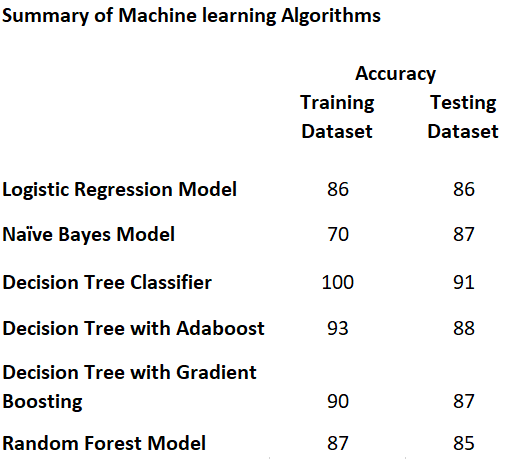

From the table above, we can see that all models achieved more than 81% on the testing data set with the decision tree classifier achievingthe best performance of 91%. The decision tree model achieved 100% accuracy on the training dataset, indicating that overfitting of the dataset is occurring.



# 3.SMOTE

A problem with imbalanced classification is that there are too few examples of the minority class for a model to effectively learn the decision boundary.

One way to solve this problem is to oversample the examples in the minority class. This can be achieved by simply duplicating examples from the minority class in the training dataset prior to fitting a model. This can balance the class distribution but does not provide any additional information to the model.

An improvement on duplicating examples from the minority class is to synthesize new examples from the minority class. This is a type of data augmentation for tabular data and can be very effective.

The most widely used approach to synthesizing new examples is called the **Synthetic Minority Oversampling TEchnique, (SMOTE)**.

**SMOTE** first selects a minority class instance a at random and finds its k nearest minority class neighbors. The synthetic instance is then created by choosing one of the k nearest neighbors b at random and connecting a and b to form a line segment in the feature space. The synthetic instances are generated as a convex combination of the two chosen instances a and b.

In [131]:
## Get the Deposit and the No deposit dataset 

deposit = term_deposit[term_deposit['y']==1]
no_deposit = term_deposit[term_deposit['y']==0]

print(deposit.shape, no_deposit.shape)

(2699, 14) (33570, 14)


In [132]:
## Get the Deposit and the No deposit dataset for training data
deposit = y_train[y_train==1]
no_deposit = y_train[y_train==0]
print(deposit.shape, no_deposit.shape)

(1889,) (23499,)


The data above shows that the training data set has 2027 - deposit (minority class) and 25973 - no deposit (majority class). When oversampling of the minority class is implemented, the minority class will be increased from 2027, a total of 25973 rows with a 1:1 ratio between the minority and the majority class.

In [133]:
## RandomOverSampler to handle imbalanced data
sm =  SMOTE()
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [134]:
#Shape of re-sampled dataset.
X_train_sm.shape, y_train_sm.shape

((46998, 36), (46998,))

In [135]:
#Show shape of original and resampled dataset

print('Original dataset shape {}'.format(Counter(y_train)))
print('Resampled dataset shape {}'.format(Counter(y_train_sm)))

Original dataset shape Counter({0: 23499, 1: 1889})
Resampled dataset shape Counter({0: 23499, 1: 23499})


# Logistic Regression Model

In [136]:
model = LogisticRegression(max_iter=100000)

# setup the grid search
params = {'C': np.logspace(-4, 2, 10),
          'solver': ['liblinear'],
          'penalty': ['l2'],
          'fit_intercept': [True, False]}

lr3_gs = GridSearchCV(estimator=model,
                  param_grid=params,
                  cv=5,
                  scoring='accuracy',
                  return_train_score=True,
                  n_jobs=-2)

lr3_gs.fit(X_train_sm, y_train_sm)

# extract the grid search results
print('Best Parameters:')
print(lr3_gs.best_params_)
print('Best estimator C:')
print(lr3_gs.best_estimator_.C)
print('Best estimator mean cross validated training score:')
print(lr3_gs.best_score_)
print('Best estimator score on the full training set:')
print(lr3_gs.score(X_train_sm, y_train_sm))
print('Best estimator score on the test set:')
print(lr3_gs.score(X_test, y_test))

Best Parameters:
{'C': 0.01, 'fit_intercept': True, 'penalty': 'l2', 'solver': 'liblinear'}
Best estimator C:
0.01
Best estimator mean cross validated training score:
0.883569528673263
Best estimator score on the full training set:
0.8838035661091961
Best estimator score on the test set:
0.8655454461906075


# Naive Bayes Model

In [137]:
naiveB3 = GaussianNB() 

In [138]:
# fit model

naiveB3.fit(X_train_sm, y_train_sm)

print(naiveB3.score(X_train_sm, y_train_sm))
print(cross_val_score(naiveB3, X_train_sm, y_train_sm, cv=5).mean())
print(naiveB3.score(X_test, y_test))

0.7564151666028341
0.7550533239163062
0.8514842385810127


# Decision Tree Model

In [139]:
DTree = DecisionTreeClassifier()

# gridsearch params
dtc_params = {
              'max_depth': list(range(1, 13))+[None],
              'max_features': [None, 1, 2, 3],
              'min_samples_split': [2, 3, 4, 5, 10, 15, 20, 25, 30, 40, 50],
              'ccp_alpha': [0, 0.001, 0.005, 0.01]
             }

# set the gridsearch
dtc_gs3 = GridSearchCV(DTree, dtc_params, cv=5, verbose=1, n_jobs=-2)

# use the gridearch model to fit the data
dtc_gs3.fit(X_train_sm, y_train_sm)
dtc_best3 = dtc_gs3.best_estimator_
print("Best Params:", dtc_gs3.best_params_)
print("Best Score:", dtc_gs3.best_score_)
print("Training Score:",dtc_gs3.score(X_train_sm, y_train_sm))
print("Test Score:", dtc_gs3.score(X_test, y_test))

Fitting 5 folds for each of 2288 candidates, totalling 11440 fits
Best Params: {'ccp_alpha': 0, 'max_depth': None, 'max_features': None, 'min_samples_split': 2}
Best Score: 0.9305507534753584
Training Score: 1.0
Test Score: 0.8954140244462825


# Decision Tree with Adaboost Model

In [140]:
base_estimator = DecisionTreeClassifier(max_depth=9)
Adaboost3 = AdaBoostClassifier(base_estimator=base_estimator,
                           n_estimators=4,
                           random_state=1, algorithm='SAMME')
Adaboost3.fit(X_train_sm, y_train_sm)

print(Adaboost3.score(X_train_sm, y_train_sm))
print(cross_val_score(Adaboost3, X_train_sm, y_train_sm, cv=5).mean())
print(Adaboost3.score(X_test, y_test))

0.9383590791097494
0.9264441463894982
0.8970682841650583


# Decision Tree with Gradient Boosting Model

In [141]:
base_estimator = DecisionTreeClassifier(max_depth=9)
Gboost3 = GradientBoostingClassifier(n_estimators=10,
                           random_state=1, init=base_estimator)
Gboost3.fit(X_train_sm, y_train_sm)

print(Gboost3.score(X_train_sm, y_train_sm))
print(cross_val_score(Gboost3, X_train_sm, y_train_sm, cv=5).mean())
print(Gboost3.score(X_test, y_test))

0.923252053278863
0.9130605383551442
0.8827313666023343


# Random Forest Model

In [142]:
RF = RandomForestClassifier()

def do_cross_val(RF, X_train_sm, y_train_sm, cv=5):
    scores = cross_val_score(RF, X_train_sm, y_train_sm, cv=cv, n_jobs=1,
                             scoring='neg_mean_squared_error')
    # , scores.std()#, cross_val_score(model, X, y, cv=cv, n_jobs=1).mean()
    return -scores.mean()

values = sorted(
    list(set(np.logspace(0, 3, num=20, endpoint=True, base=10.0).astype(int))))

In [143]:
# Grid Search
params = {'max_depth': [1, 2, 3, 4, 5, 6, 10, 20],
          # , 'max_features':[1,2,3,4],
          'max_leaf_nodes': [5, 6, 7, 8, 9, 10, 20],
          'min_samples_leaf': [1, 2, 3, 4,10]
          # 'min_samples_split':[1,2,3,4]
          }

rf3 = GridSearchCV(RF, param_grid=params, cv=5)
rf3.fit(X_train_sm, y_train_sm)

RF3_best = rf3.best_estimator_
print(rf3.best_estimator_)
print('Training: ', rf3.score(X_train_sm, y_train_sm))
print('CV training: ', rf3.best_score_)
print('Test: ', rf3.score(X_test, y_test))

RandomForestClassifier(max_depth=10, max_leaf_nodes=20)
Training:  0.8928890591088983
CV training:  0.8964212806704198
Test:  0.8604907637165702


# Summary of Results - Smote

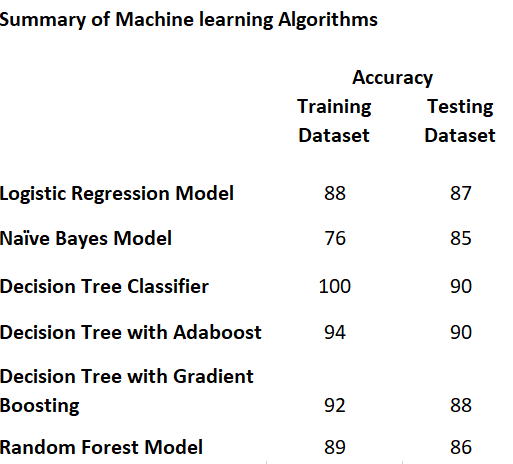

From the table above, we can see that all models achieved more than 81% on the testing data set with the decision tree classifier and Decision Tree with Adaboost both achieving the best performance of 90%. The decision tree model achieved 100% accuracy on the training dataset, indicating that overfitting of the dataset occurred in this model. The Decision Tree with Adaboost model achieved 94% accuracy on the training dataset.

# 4. XGBoost
The XGBoost or Extreme Gradient Boosting algorithm is a decision tree based machine learning algorithm which uses a process called boosting to help improve performance. Since it’s introduction, it’s become of one of the most effective machine learning algorithms and regularly produces results that outperform most other algorithms, such as logistic regression, the random forest model and regular decision trees.

The XGBoost algorithm is effective for a wide range of regression and classification predictive modeling problems.
It is a powerful machine learning technique that performs well or even best on a wide range of challenging machine learning problems.

It is an efficient implementation of the stochastic gradient boosting algorithm and offers a range of hyperparameters designed to provide control over the model training process. Although the algorithm performs well in general, even on imbalanced classification datasets, it offers a way to tune the training algorithm to pay more attention to misclassification of the minority class for datasets with a skewed class distribution.


Before any modification or tuning is made to the XGBoost algorithm for imbalanced classification, it is important to test the default XGBoost model and establish a baseline in performance.


In [147]:
# define model
clf_xgb =XGBClassifier(objective='binary:logistic', missing=1, seed=42, use_label_encoder=False)

# use the model to fit the data
clf_xgb.fit(X_train,
            y_train,
            verbose=False,
            early_stopping_rounds=10,
            eval_metric='aucpr', 
            eval_set=[(X_test, y_test)])



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=1, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              subsample=1, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

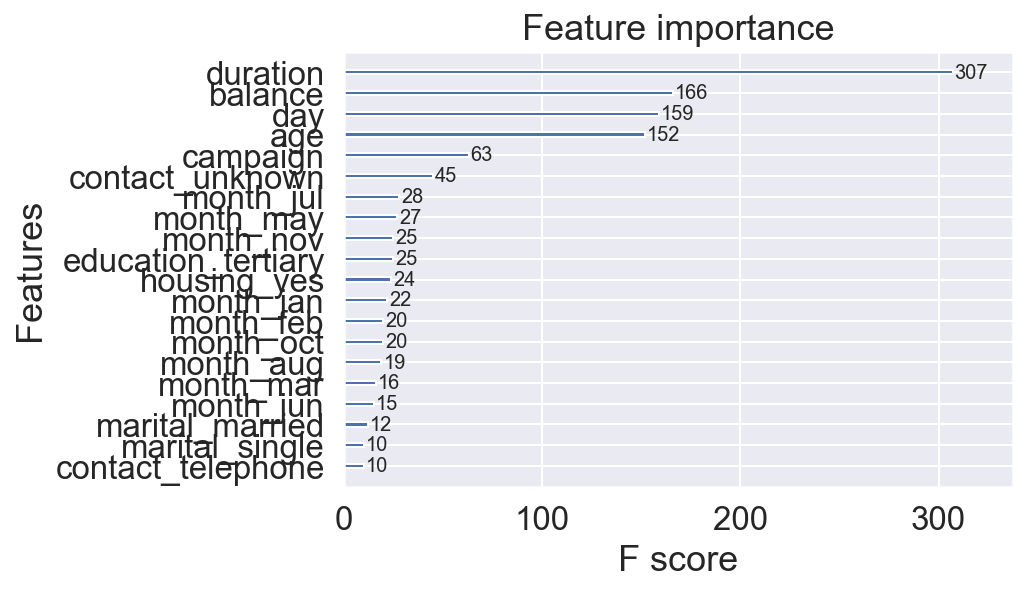

In [148]:
# top 10 most important features
plot_importance(clf_xgb, max_num_features=20) 
plt.show()

In [149]:
predictions6_train = clf_xgb.predict_proba(X_train)
y_true = np.array(predictions6_train)
y_scores = predictions6_train[:, 1]

In [150]:
predictions6_train = clf_xgb.predict(X_train)
predictions6_test = clf_xgb.predict(X_test)

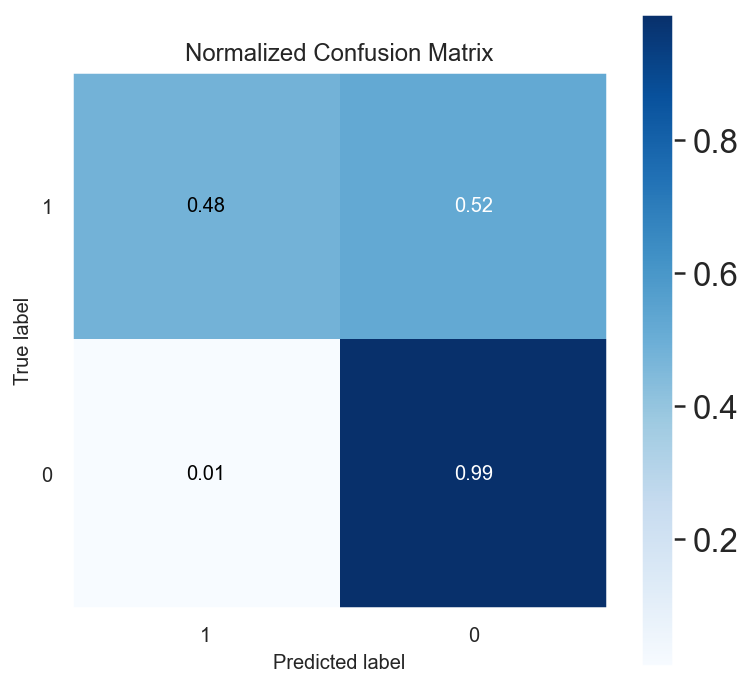

In [151]:
skplt.metrics.plot_confusion_matrix(y_train, predictions6_train, labels=[1, 0], figsize=(6,6), normalize='all')
plt.show()

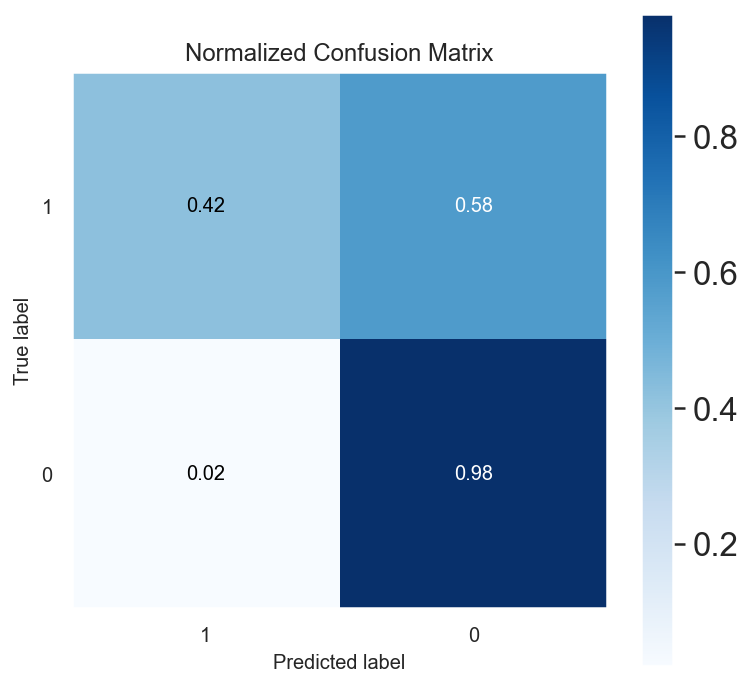

In [152]:
skplt.metrics.plot_confusion_matrix(y_test, predictions6_test, labels=[1, 0], figsize=(6,6), normalize='all')
plt.show()

In [153]:
print(classification_report(y_train, predictions6_train))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     23499
           1       0.78      0.48      0.60      1889

    accuracy                           0.95     25388
   macro avg       0.87      0.74      0.79     25388
weighted avg       0.95      0.95      0.95     25388



In [155]:
print(classification_report(y_test, predictions6_test))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     10071
           1       0.60      0.42      0.50       810

    accuracy                           0.94     10881
   macro avg       0.78      0.70      0.73     10881
weighted avg       0.93      0.94      0.93     10881



# Summary of Results - XGBoost

The baseline XGBoost model was ran first to determine the performance at this level and to determine which parameters need to be tuned and to what extent. This provides a baseline for comparison for any hyperparameter tuning performed for the default XGBoost algorithm.

The model achieved performance of 95% on the training dataset and 94% on the testing dataset.



# Overall Summary

We have used the accuracy as the metric to evaluate the performance of the models, as the client requests the use of this metrics, however as a general rule, accuracy is not the best metrics for use in assessing model performance where you have imbalanced datasets and I would not recommend the use of this metrics in this instance.

Accuracy is not an effective measure since, among other things, it does not take into account the distribution of the misclassification among classes nor the marginal distributions. Other more subtle measures have been introduced in the multi-class setting to address this issue, improving efficiency and class discrimination power.

In this case I believe precision, recall or F1-Score would be a better metric to use as this would provide us with a better evaluation of the model.

# Determining the segment(s) of customers most likely to take up the investment product.

From the EDA we can see that the customers most likely to take up the investment product are:

* Aged 20 t0 49
* has no credit in default
* Married
* Achieved secondary or teritary education
* Has no personal loans
* Has a job in management position
* Has a cell number for contact



# Using insights from models to determine what features the company should focus on to determine what makes the customers buy term deposits

The machine learning algorithms have all provided features that the company should focus on to determine what makes a customer buy term deposits. 

However as the XGBoost model achieved the best performance, we will use the features from this model. These are summarised below.

* Duration - The duration of the last contact in seconds is the most important feature across all the models. The duration of the last contact in seconds for the majority of term deposit holders fall between 1 and 999. Duration above 1000 seconds are less likely to result in a customer buying a term deposit

* Balance - This is the average yearly balance of term deposit in euros. This points to the amount of money the customer is able to place on term deposit.

* Day - The last contact day of the month. The results shows that there are certain contact days that are most likely to result in the customer buying a term deposit.

* Age - The age of the customer based on their date of birth. The EDA showed that persons between ages 20 and 50 were more likely to invest in term deposits with the 30-39 age group being the most likely of th group.

* Campaign - This is the number of contacts performed during this campaign and for this client.The EDA shows that customers most likely to invest in term deposits had 5 or less conatcts during the campaign. 

* Month - The last contact month of the year. This is also very important and models shows that June, March, October, July, November, February and May are the months that customers are most likely to buy term deposits.


# Conclusion:

The XGBoost model was the best performing model, using accuracy as the metric. This model achieved 94% accuracy on the test set. Accuracy was used as this was requested by the client. However, as the dataset is an imbalanced one, Acccuracy is not the best evaluation metric to use and in this case precision, recall or F1-score would be better metrics to use.
